In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
data1 = loadmat('data1.mat')

In [2]:
F = data1['F_data']
X = data1['X_data']

In [3]:
F1 = F[:,:,1]
X1 = X[:,:,1]

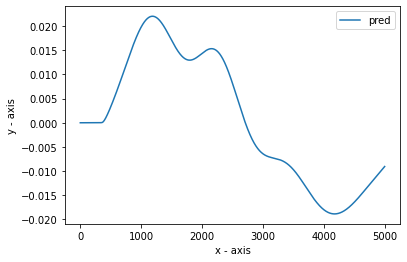

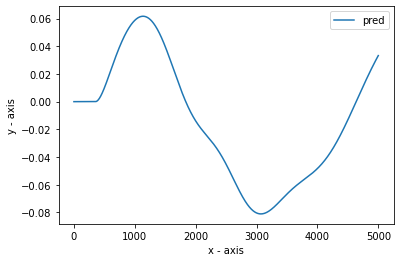

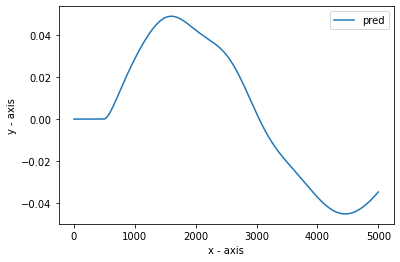

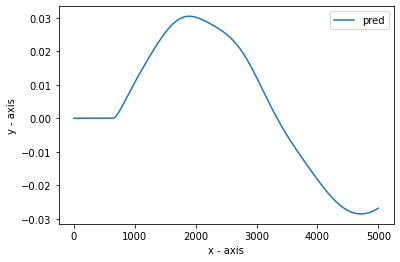

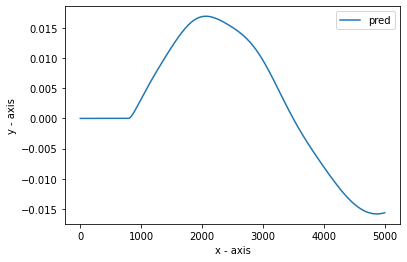

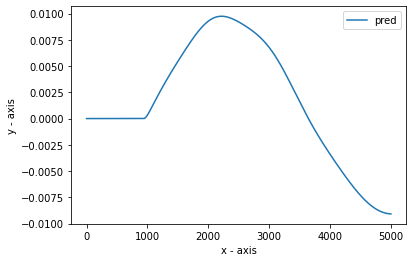

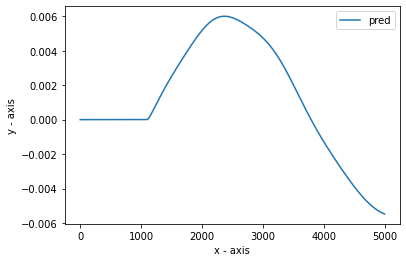

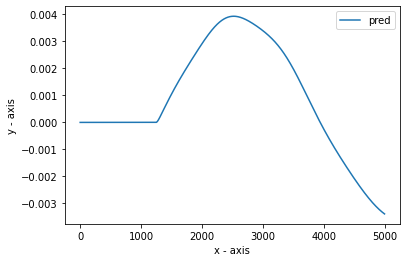

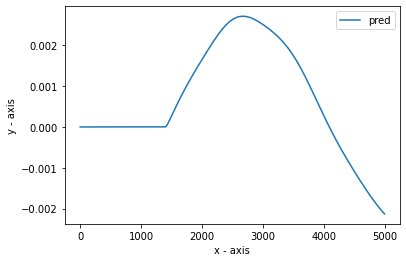

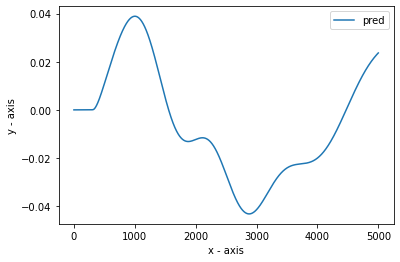

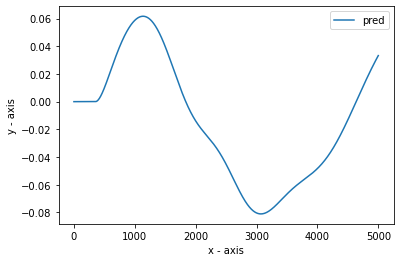

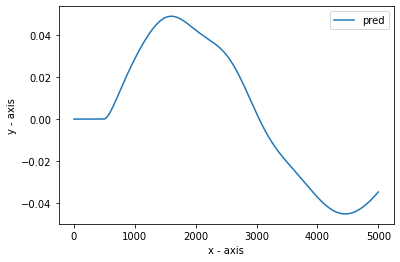

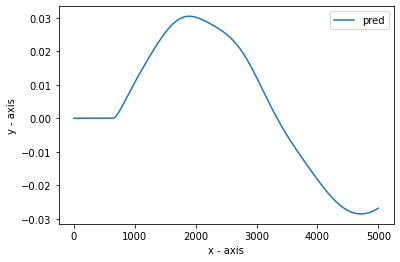

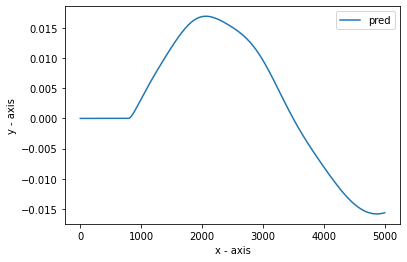

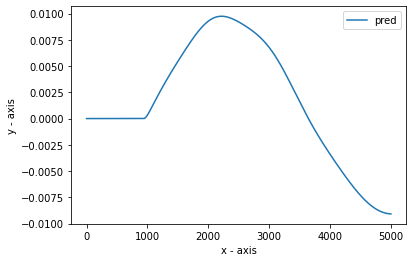

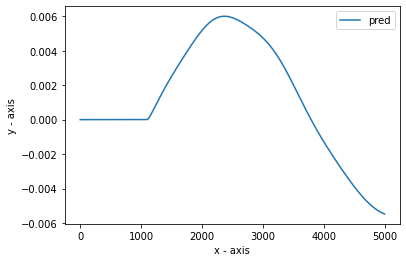

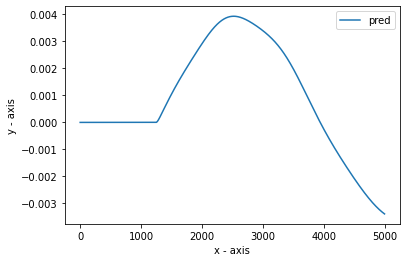

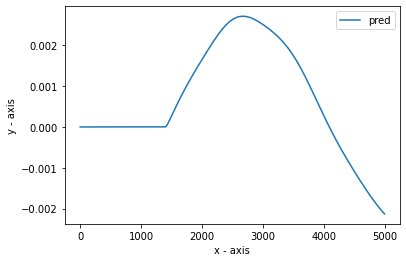

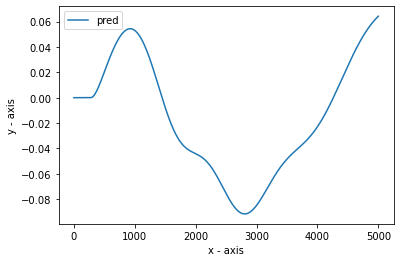

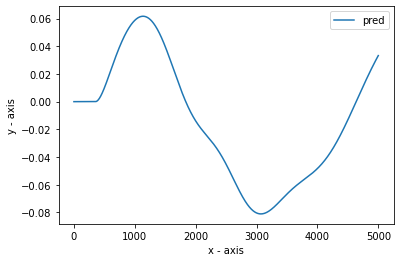

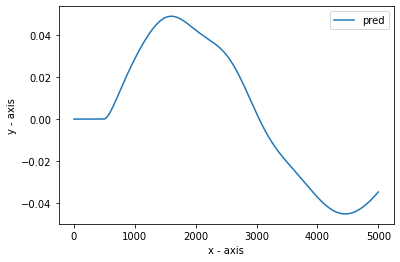

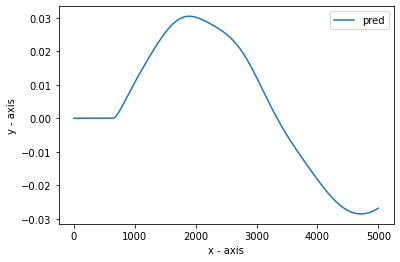

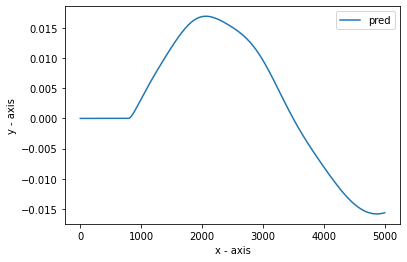

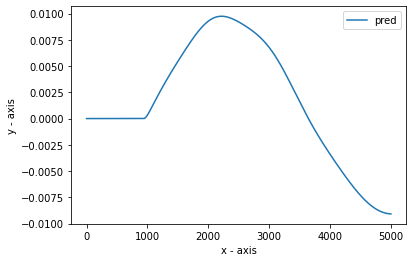

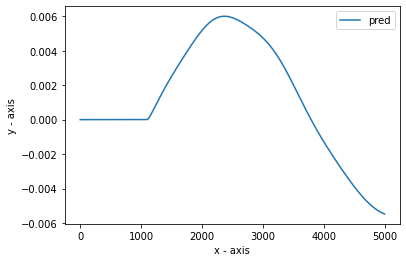

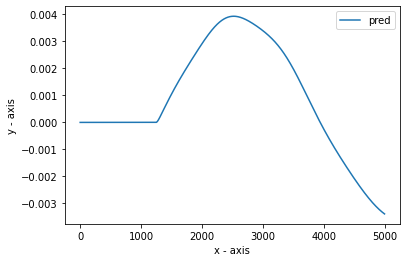

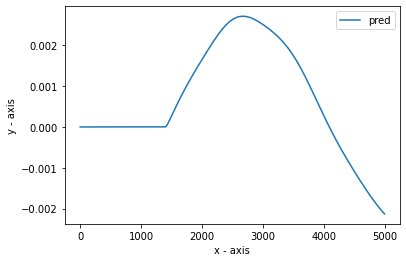

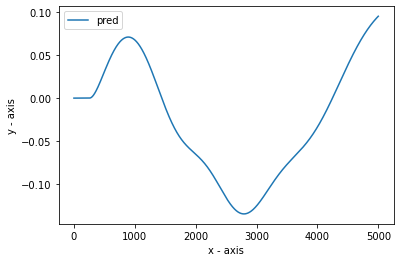

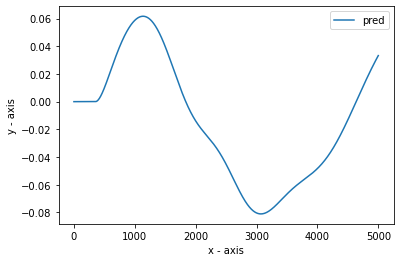

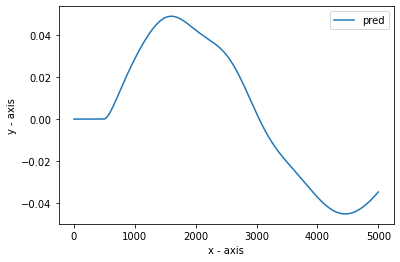

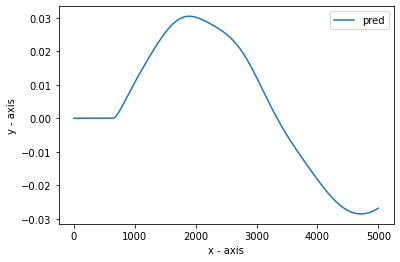

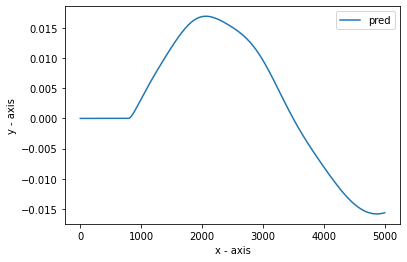

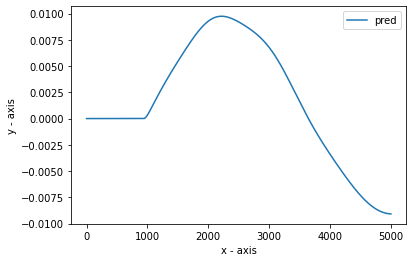

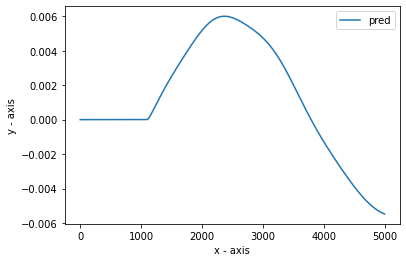

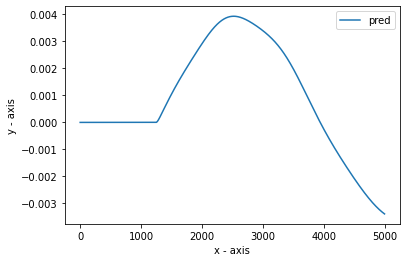

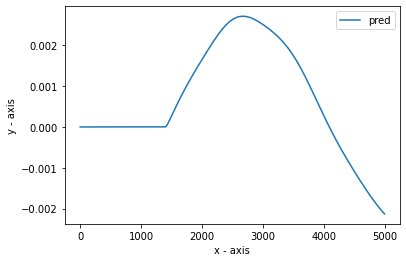

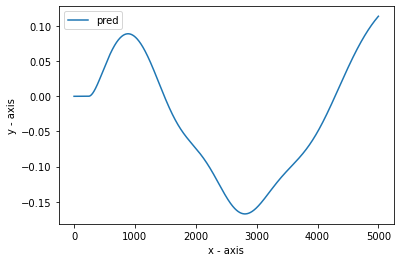

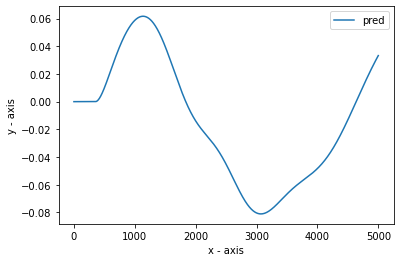

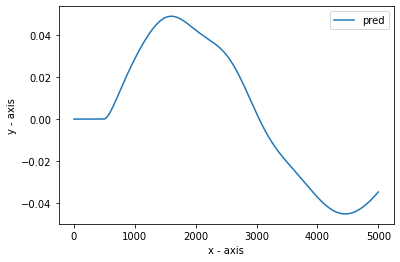

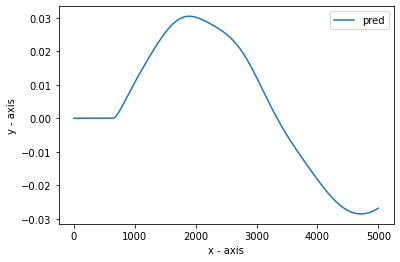

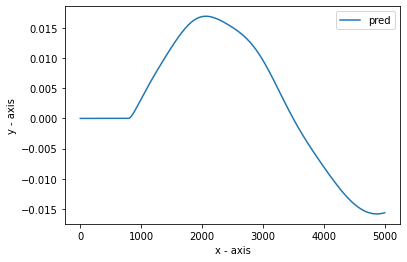

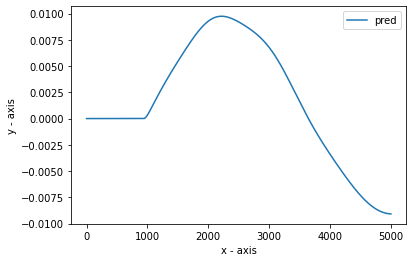

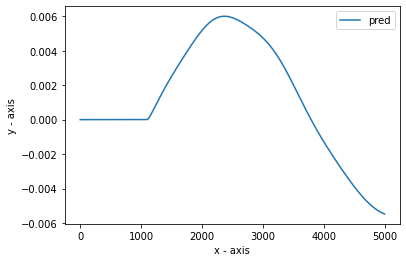

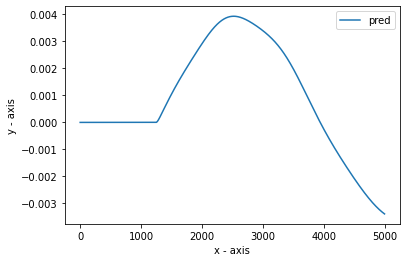

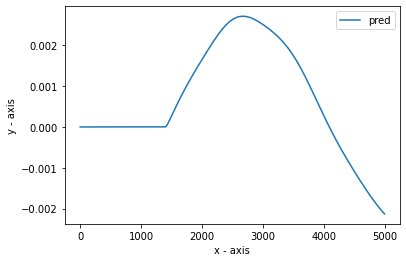

In [4]:
for i in range(len(X1)):
    plt.plot(X1[i], label = "pred")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

In [5]:
X = X.reshape(-1,1)
F = F.reshape(-1,1)
from sklearn.preprocessing import  MinMaxScaler
scaler_F = MinMaxScaler(feature_range=(-1, 1))
scaler_X = MinMaxScaler(feature_range=(-1, 1))
X = scaler_X.fit_transform(X)
F = scaler_F.fit_transform(F)

In [6]:
X = X.reshape(-1,5001,5)
F = F.reshape(-1,5001,5)

In [7]:
#创建数据集 
def Generate_data(X_data0, y_data0, window_size=50):
    X_new_temp = []
    y_new_temp = []
    for i in range(len(X_data0)):
        X_temp = X_data0[i]
        y_temp = y_data0[i]
        X_new = []
        y_new = []
        for j in range(int(np.floor(len(X_temp) / window_size))):
            X_new.append(X_temp[j * window_size:(j + 1) * window_size])
            y_new.append(y_temp[(j + 1) * window_size - 1, :])
            
        X_new_temp.append(np.array(X_new))
        y_new_temp.append(np.array(y_new))

    X_data_new0 = np.array(X_new_temp)
    y_data_new0 = np.array(y_new_temp)
    X_data_new0 = X_data_new0.reshape(len(X_data0),int(np.floor(len(X_temp) / window_size)),window_size*X_data0.shape[2])

    return X_data_new0, y_data_new0

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(F,X , test_size=0.3, random_state=42)

In [9]:
windowsize = 20
X_data_new, y_data_new = Generate_data(X_train, y_train, windowsize)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,Activation,GRU,Flatten,Dropout
from tensorflow.keras.optimizers import  Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from tensorflow.keras.optimizers import SGD
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=4000, verbose=2, mode='auto', restore_best_weights=True)


adam = Adam(learning_rate=0.001, decay=0.0001)
# 创建RNN模型
model = Sequential()
model.add(LSTM(units=64,return_sequences=True,stateful=False,input_shape=(X_data_new.shape[1], X_data_new.shape[2])))  # 第一层LSTM
model.add(LSTM(units=64,return_sequences=True,stateful=False))  # 第二层LSTM
model.add(LSTM(units=64,return_sequences=True,stateful=False))  # 第二层LSTM
model.add(Dense(units=512))
model.add(Dense(units=256))
model.add(Dense(units=5))

# 编译模型
model.compile(loss='mse', optimizer='adam', metrics = ['mae'])

# 进行预测
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 250, 64)           42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 250, 64)           33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 250, 64)           33024     
_________________________________________________________________
dense (Dense)                (None, 250, 512)          33280     
_________________________________________________________________
dense_1 (Dense)              (None, 250, 256)          131328    
_________________________________________________________________
dense_2 (Dense)              (None, 250, 5)            1285      
Total params: 274,181
Trainable params: 274,181
Non-trainable params: 0
__________________________________________________

In [11]:

history = model.fit(X_data_new, y_data_new,epochs=20000, validation_split=0.3,verbose=1,callbacks = earlyStop)

Epoch 1/20000
1/1 [==============================] - 5s 5s/step - loss: 0.0535 - mae: 0.1918 - val_loss: 0.0912 - val_mae: 0.2334
Epoch 2/20000
1/1 [==============================] - 0s 149ms/step - loss: 0.0620 - mae: 0.1992 - val_loss: 0.0428 - val_mae: 0.1348
Epoch 3/20000
1/1 [==============================] - 0s 158ms/step - loss: 0.0185 - mae: 0.0864 - val_loss: 0.0610 - val_mae: 0.1946
Epoch 4/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0410 - mae: 0.1654 - val_loss: 0.0494 - val_mae: 0.1638
Epoch 5/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0266 - mae: 0.1266 - val_loss: 0.0451 - val_mae: 0.1368
Epoch 6/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0194 - mae: 0.0877 - val_loss: 0.0486 - val_mae: 0.1496
Epoch 7/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0221 - mae: 0.1022 - val_loss: 0.0483 - val_mae: 0.1525
Epoch 8/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.

1/1 [==============================] - 0s 94ms/step - loss: 0.0166 - mae: 0.0750 - val_loss: 0.0405 - val_mae: 0.1235
Epoch 63/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0166 - mae: 0.0748 - val_loss: 0.0405 - val_mae: 0.1234
Epoch 64/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0166 - mae: 0.0746 - val_loss: 0.0405 - val_mae: 0.1234
Epoch 65/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0166 - mae: 0.0747 - val_loss: 0.0404 - val_mae: 0.1234
Epoch 66/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0166 - mae: 0.0748 - val_loss: 0.0404 - val_mae: 0.1234
Epoch 67/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0166 - mae: 0.0749 - val_loss: 0.0404 - val_mae: 0.1233
Epoch 68/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0166 - mae: 0.0748 - val_loss: 0.0404 - val_mae: 0.1232
Epoch 69/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0166 - 

1/1 [==============================] - 0s 105ms/step - loss: 0.0157 - mae: 0.0733 - val_loss: 0.0375 - val_mae: 0.1223
Epoch 124/20000
1/1 [==============================] - 0s 121ms/step - loss: 0.0159 - mae: 0.0782 - val_loss: 0.0384 - val_mae: 0.1189
Epoch 125/20000
1/1 [==============================] - 0s 131ms/step - loss: 0.0156 - mae: 0.0725 - val_loss: 0.0385 - val_mae: 0.1189
Epoch 126/20000
1/1 [==============================] - 0s 121ms/step - loss: 0.0156 - mae: 0.0726 - val_loss: 0.0370 - val_mae: 0.1216
Epoch 127/20000
1/1 [==============================] - 0s 118ms/step - loss: 0.0157 - mae: 0.0782 - val_loss: 0.0378 - val_mae: 0.1178
Epoch 128/20000
1/1 [==============================] - 0s 101ms/step - loss: 0.0154 - mae: 0.0720 - val_loss: 0.0375 - val_mae: 0.1175
Epoch 129/20000
1/1 [==============================] - 0s 102ms/step - loss: 0.0152 - mae: 0.0721 - val_loss: 0.0362 - val_mae: 0.1208
Epoch 130/20000
1/1 [==============================] - 0s 98ms/step - l

Epoch 184/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0146 - mae: 0.0719 - val_loss: 0.0333 - val_mae: 0.1161
Epoch 185/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0147 - mae: 0.0783 - val_loss: 0.0365 - val_mae: 0.1172
Epoch 186/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0152 - mae: 0.0765 - val_loss: 0.0352 - val_mae: 0.1232
Epoch 187/20000
1/1 [==============================] - 0s 108ms/step - loss: 0.0165 - mae: 0.0872 - val_loss: 0.0399 - val_mae: 0.1350
Epoch 188/20000
1/1 [==============================] - 0s 108ms/step - loss: 0.0192 - mae: 0.1005 - val_loss: 0.0364 - val_mae: 0.1134
Epoch 189/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0144 - mae: 0.0698 - val_loss: 0.0356 - val_mae: 0.1279
Epoch 190/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0182 - mae: 0.0943 - val_loss: 0.0474 - val_mae: 0.1396
Epoch 191/20000
1/1 [==============================] - 0s 11

1/1 [==============================] - 0s 89ms/step - loss: 0.0139 - mae: 0.0705 - val_loss: 0.0347 - val_mae: 0.1156
Epoch 246/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0139 - mae: 0.0732 - val_loss: 0.0365 - val_mae: 0.1144
Epoch 247/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0140 - mae: 0.0690 - val_loss: 0.0340 - val_mae: 0.1168
Epoch 248/20000
1/1 [==============================] - 0s 125ms/step - loss: 0.0143 - mae: 0.0764 - val_loss: 0.0390 - val_mae: 0.1165
Epoch 249/20000
1/1 [==============================] - 0s 111ms/step - loss: 0.0151 - mae: 0.0700 - val_loss: 0.0347 - val_mae: 0.1252
Epoch 250/20000
1/1 [==============================] - 0s 118ms/step - loss: 0.0175 - mae: 0.0916 - val_loss: 0.0411 - val_mae: 0.1218
Epoch 251/20000
1/1 [==============================] - 0s 116ms/step - loss: 0.0165 - mae: 0.0760 - val_loss: 0.0346 - val_mae: 0.1145
Epoch 252/20000
1/1 [==============================] - 0s 98ms/step - loss

1/1 [==============================] - 0s 95ms/step - loss: 0.0138 - mae: 0.0694 - val_loss: 0.0354 - val_mae: 0.1129
Epoch 307/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0140 - mae: 0.0695 - val_loss: 0.0341 - val_mae: 0.1247
Epoch 308/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0173 - mae: 0.0912 - val_loss: 0.0569 - val_mae: 0.1610
Epoch 309/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0300 - mae: 0.1226 - val_loss: 0.0436 - val_mae: 0.1494
Epoch 310/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0280 - mae: 0.1218 - val_loss: 0.0401 - val_mae: 0.1376
Epoch 311/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0211 - mae: 0.1010 - val_loss: 0.0400 - val_mae: 0.1205
Epoch 312/20000
1/1 [==============================] - 0s 111ms/step - loss: 0.0161 - mae: 0.0716 - val_loss: 0.0485 - val_mae: 0.1403
Epoch 313/20000
1/1 [==============================] - 0s 113ms/step - loss: 

1/1 [==============================] - 0s 91ms/step - loss: 0.0231 - mae: 0.1034 - val_loss: 0.0511 - val_mae: 0.1762
Epoch 368/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0378 - mae: 0.1612 - val_loss: 0.0374 - val_mae: 0.1325
Epoch 369/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0187 - mae: 0.0969 - val_loss: 0.0407 - val_mae: 0.1244
Epoch 370/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0165 - mae: 0.0762 - val_loss: 0.0470 - val_mae: 0.1412
Epoch 371/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0205 - mae: 0.0940 - val_loss: 0.0448 - val_mae: 0.1342
Epoch 372/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0188 - mae: 0.0854 - val_loss: 0.0411 - val_mae: 0.1241
Epoch 373/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0166 - mae: 0.0752 - val_loss: 0.0398 - val_mae: 0.1279
Epoch 374/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.

1/1 [==============================] - 0s 90ms/step - loss: 0.0153 - mae: 0.0752 - val_loss: 0.0378 - val_mae: 0.1216
Epoch 429/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0153 - mae: 0.0754 - val_loss: 0.0378 - val_mae: 0.1216
Epoch 430/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0153 - mae: 0.0755 - val_loss: 0.0377 - val_mae: 0.1216
Epoch 431/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0152 - mae: 0.0755 - val_loss: 0.0377 - val_mae: 0.1215
Epoch 432/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0152 - mae: 0.0755 - val_loss: 0.0377 - val_mae: 0.1214
Epoch 433/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0152 - mae: 0.0754 - val_loss: 0.0377 - val_mae: 0.1214
Epoch 434/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0152 - mae: 0.0753 - val_loss: 0.0376 - val_mae: 0.1213
Epoch 435/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.

1/1 [==============================] - 0s 86ms/step - loss: 0.0170 - mae: 0.0821 - val_loss: 0.0395 - val_mae: 0.1245
Epoch 490/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0166 - mae: 0.0776 - val_loss: 0.0396 - val_mae: 0.1220
Epoch 491/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0162 - mae: 0.0741 - val_loss: 0.0399 - val_mae: 0.1218
Epoch 492/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0162 - mae: 0.0737 - val_loss: 0.0404 - val_mae: 0.1232
Epoch 493/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0164 - mae: 0.0754 - val_loss: 0.0408 - val_mae: 0.1243
Epoch 494/20000
1/1 [==============================] - 0s 104ms/step - loss: 0.0166 - mae: 0.0764 - val_loss: 0.0410 - val_mae: 0.1243
Epoch 495/20000
1/1 [==============================] - 0s 87ms/step - loss: 0.0166 - mae: 0.0760 - val_loss: 0.0411 - val_mae: 0.1237
Epoch 496/20000
1/1 [==============================] - 0s 91ms/step - loss: 0

1/1 [==============================] - 0s 95ms/step - loss: 0.0146 - mae: 0.0728 - val_loss: 0.0369 - val_mae: 0.1185
Epoch 551/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0145 - mae: 0.0725 - val_loss: 0.0368 - val_mae: 0.1183
Epoch 552/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0145 - mae: 0.0724 - val_loss: 0.0367 - val_mae: 0.1183
Epoch 553/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0145 - mae: 0.0724 - val_loss: 0.0367 - val_mae: 0.1181
Epoch 554/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0144 - mae: 0.0722 - val_loss: 0.0367 - val_mae: 0.1179
Epoch 555/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0144 - mae: 0.0719 - val_loss: 0.0367 - val_mae: 0.1177
Epoch 556/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0143 - mae: 0.0717 - val_loss: 0.0366 - val_mae: 0.1175
Epoch 557/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.

1/1 [==============================] - 0s 96ms/step - loss: 0.0149 - mae: 0.0742 - val_loss: 0.0369 - val_mae: 0.1195
Epoch 612/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0148 - mae: 0.0740 - val_loss: 0.0369 - val_mae: 0.1194
Epoch 613/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0148 - mae: 0.0739 - val_loss: 0.0369 - val_mae: 0.1194
Epoch 614/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0147 - mae: 0.0739 - val_loss: 0.0369 - val_mae: 0.1195
Epoch 615/20000
1/1 [==============================] - 0s 103ms/step - loss: 0.0147 - mae: 0.0741 - val_loss: 0.0368 - val_mae: 0.1195
Epoch 616/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0147 - mae: 0.0743 - val_loss: 0.0366 - val_mae: 0.1196
Epoch 617/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0146 - mae: 0.0747 - val_loss: 0.0365 - val_mae: 0.1195
Epoch 618/20000
1/1 [==============================] - 0s 90ms/step - loss: 0

1/1 [==============================] - 0s 88ms/step - loss: 0.0208 - mae: 0.1105 - val_loss: 0.0397 - val_mae: 0.1371
Epoch 673/20000
1/1 [==============================] - 0s 86ms/step - loss: 0.0195 - mae: 0.0980 - val_loss: 0.0408 - val_mae: 0.1356
Epoch 674/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0195 - mae: 0.0938 - val_loss: 0.0420 - val_mae: 0.1384
Epoch 675/20000
1/1 [==============================] - 0s 104ms/step - loss: 0.0197 - mae: 0.0958 - val_loss: 0.0410 - val_mae: 0.1335
Epoch 676/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0182 - mae: 0.0889 - val_loss: 0.0396 - val_mae: 0.1256
Epoch 677/20000
1/1 [==============================] - 0s 101ms/step - loss: 0.0166 - mae: 0.0787 - val_loss: 0.0394 - val_mae: 0.1244
Epoch 678/20000
1/1 [==============================] - 0s 124ms/step - loss: 0.0164 - mae: 0.0775 - val_loss: 0.0400 - val_mae: 0.1283
Epoch 679/20000
1/1 [==============================] - 0s 95ms/step - loss:

1/1 [==============================] - 0s 88ms/step - loss: 0.0145 - mae: 0.0724 - val_loss: 0.0369 - val_mae: 0.1186
Epoch 734/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0145 - mae: 0.0723 - val_loss: 0.0370 - val_mae: 0.1184
Epoch 735/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0144 - mae: 0.0719 - val_loss: 0.0370 - val_mae: 0.1182
Epoch 736/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0144 - mae: 0.0716 - val_loss: 0.0369 - val_mae: 0.1182
Epoch 737/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0144 - mae: 0.0718 - val_loss: 0.0368 - val_mae: 0.1182
Epoch 738/20000
1/1 [==============================] - 0s 87ms/step - loss: 0.0144 - mae: 0.0720 - val_loss: 0.0367 - val_mae: 0.1180
Epoch 739/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0143 - mae: 0.0718 - val_loss: 0.0368 - val_mae: 0.1178
Epoch 740/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.

1/1 [==============================] - 0s 99ms/step - loss: 0.0165 - mae: 0.0726 - val_loss: 0.0408 - val_mae: 0.1218
Epoch 795/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0165 - mae: 0.0724 - val_loss: 0.0407 - val_mae: 0.1217
Epoch 796/20000
1/1 [==============================] - 0s 87ms/step - loss: 0.0164 - mae: 0.0723 - val_loss: 0.0406 - val_mae: 0.1215
Epoch 797/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0164 - mae: 0.0722 - val_loss: 0.0404 - val_mae: 0.1214
Epoch 798/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0163 - mae: 0.0722 - val_loss: 0.0403 - val_mae: 0.1214
Epoch 799/20000
1/1 [==============================] - 0s 105ms/step - loss: 0.0163 - mae: 0.0723 - val_loss: 0.0402 - val_mae: 0.1215
Epoch 800/20000
1/1 [==============================] - 0s 102ms/step - loss: 0.0163 - mae: 0.0725 - val_loss: 0.0400 - val_mae: 0.1216
Epoch 801/20000
1/1 [==============================] - 0s 94ms/step - loss: 

1/1 [==============================] - 0s 95ms/step - loss: 0.0149 - mae: 0.0746 - val_loss: 0.0373 - val_mae: 0.1207
Epoch 856/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0149 - mae: 0.0746 - val_loss: 0.0372 - val_mae: 0.1206
Epoch 857/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0148 - mae: 0.0745 - val_loss: 0.0372 - val_mae: 0.1205
Epoch 858/20000
1/1 [==============================] - 0s 102ms/step - loss: 0.0148 - mae: 0.0744 - val_loss: 0.0372 - val_mae: 0.1204
Epoch 859/20000
1/1 [==============================] - 0s 101ms/step - loss: 0.0148 - mae: 0.0743 - val_loss: 0.0371 - val_mae: 0.1203
Epoch 860/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0148 - mae: 0.0742 - val_loss: 0.0371 - val_mae: 0.1202
Epoch 861/20000
1/1 [==============================] - 0s 120ms/step - loss: 0.0147 - mae: 0.0741 - val_loss: 0.0371 - val_mae: 0.1201
Epoch 862/20000
1/1 [==============================] - 0s 98ms/step - loss:

1/1 [==============================] - 0s 95ms/step - loss: 0.0506 - mae: 0.1651 - val_loss: 0.0680 - val_mae: 0.1987
Epoch 917/20000
1/1 [==============================] - 0s 101ms/step - loss: 0.0572 - mae: 0.1857 - val_loss: 0.0473 - val_mae: 0.1592
Epoch 918/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0321 - mae: 0.1356 - val_loss: 0.0368 - val_mae: 0.1242
Epoch 919/20000
1/1 [==============================] - 0s 101ms/step - loss: 0.0163 - mae: 0.0824 - val_loss: 0.0385 - val_mae: 0.1186
Epoch 920/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0152 - mae: 0.0705 - val_loss: 0.0408 - val_mae: 0.1239
Epoch 921/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0164 - mae: 0.0756 - val_loss: 0.0416 - val_mae: 0.1261
Epoch 922/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0169 - mae: 0.0778 - val_loss: 0.0413 - val_mae: 0.1240
Epoch 923/20000
1/1 [==============================] - 0s 94ms/step - loss: 

1/1 [==============================] - 0s 91ms/step - loss: 0.0156 - mae: 0.0714 - val_loss: 0.0388 - val_mae: 0.1186
Epoch 978/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0156 - mae: 0.0714 - val_loss: 0.0388 - val_mae: 0.1186
Epoch 979/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0156 - mae: 0.0714 - val_loss: 0.0387 - val_mae: 0.1185
Epoch 980/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0156 - mae: 0.0714 - val_loss: 0.0387 - val_mae: 0.1184
Epoch 981/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0156 - mae: 0.0713 - val_loss: 0.0386 - val_mae: 0.1184
Epoch 982/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0155 - mae: 0.0714 - val_loss: 0.0385 - val_mae: 0.1183
Epoch 983/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0155 - mae: 0.0714 - val_loss: 0.0385 - val_mae: 0.1183
Epoch 984/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.

Epoch 1038/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0154 - mae: 0.0724 - val_loss: 0.0384 - val_mae: 0.1206
Epoch 1039/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0153 - mae: 0.0731 - val_loss: 0.0380 - val_mae: 0.1211
Epoch 1040/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0153 - mae: 0.0743 - val_loss: 0.0377 - val_mae: 0.1213
Epoch 1041/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0153 - mae: 0.0752 - val_loss: 0.0375 - val_mae: 0.1212
Epoch 1042/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0153 - mae: 0.0753 - val_loss: 0.0374 - val_mae: 0.1206
Epoch 1043/20000
1/1 [==============================] - 0s 113ms/step - loss: 0.0152 - mae: 0.0746 - val_loss: 0.0374 - val_mae: 0.1201
Epoch 1044/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0151 - mae: 0.0737 - val_loss: 0.0375 - val_mae: 0.1198
Epoch 1045/20000
1/1 [==============================] 

1/1 [==============================] - 0s 104ms/step - loss: 0.0135 - mae: 0.0682 - val_loss: 0.0352 - val_mae: 0.1143
Epoch 1099/20000
1/1 [==============================] - 0s 102ms/step - loss: 0.0135 - mae: 0.0681 - val_loss: 0.0351 - val_mae: 0.1143
Epoch 1100/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0135 - mae: 0.0682 - val_loss: 0.0351 - val_mae: 0.1140
Epoch 1101/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0134 - mae: 0.0679 - val_loss: 0.0350 - val_mae: 0.1139
Epoch 1102/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0134 - mae: 0.0678 - val_loss: 0.0349 - val_mae: 0.1138
Epoch 1103/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0134 - mae: 0.0678 - val_loss: 0.0349 - val_mae: 0.1136
Epoch 1104/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0134 - mae: 0.0675 - val_loss: 0.0348 - val_mae: 0.1134
Epoch 1105/20000
1/1 [==============================] - 0s 96ms/step -

Epoch 1159/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0155 - mae: 0.0722 - val_loss: 0.0380 - val_mae: 0.1190
Epoch 1160/20000
1/1 [==============================] - 0s 101ms/step - loss: 0.0155 - mae: 0.0726 - val_loss: 0.0380 - val_mae: 0.1190
Epoch 1161/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0155 - mae: 0.0728 - val_loss: 0.0379 - val_mae: 0.1189
Epoch 1162/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0155 - mae: 0.0727 - val_loss: 0.0379 - val_mae: 0.1188
Epoch 1163/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0154 - mae: 0.0725 - val_loss: 0.0379 - val_mae: 0.1186
Epoch 1164/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0154 - mae: 0.0723 - val_loss: 0.0378 - val_mae: 0.1183
Epoch 1165/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0153 - mae: 0.0720 - val_loss: 0.0378 - val_mae: 0.1181
Epoch 1166/20000
1/1 [==============================] 

1/1 [==============================] - 0s 90ms/step - loss: 0.0134 - mae: 0.0677 - val_loss: 0.0341 - val_mae: 0.1117
Epoch 1220/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0133 - mae: 0.0675 - val_loss: 0.0340 - val_mae: 0.1114
Epoch 1221/20000
1/1 [==============================] - 0s 86ms/step - loss: 0.0133 - mae: 0.0674 - val_loss: 0.0338 - val_mae: 0.1112
Epoch 1222/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0132 - mae: 0.0671 - val_loss: 0.0337 - val_mae: 0.1109
Epoch 1223/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0131 - mae: 0.0669 - val_loss: 0.0335 - val_mae: 0.1105
Epoch 1224/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0130 - mae: 0.0666 - val_loss: 0.0334 - val_mae: 0.1102
Epoch 1225/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0130 - mae: 0.0663 - val_loss: 0.0332 - val_mae: 0.1098
Epoch 1226/20000
1/1 [==============================] - 0s 89ms/step - l

Epoch 1280/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0165 - mae: 0.0726 - val_loss: 0.0408 - val_mae: 0.1223
Epoch 1281/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0165 - mae: 0.0728 - val_loss: 0.0408 - val_mae: 0.1220
Epoch 1282/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0165 - mae: 0.0724 - val_loss: 0.0406 - val_mae: 0.1212
Epoch 1283/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0164 - mae: 0.0717 - val_loss: 0.0405 - val_mae: 0.1216
Epoch 1284/20000
1/1 [==============================] - 0s 104ms/step - loss: 0.0164 - mae: 0.0724 - val_loss: 0.0404 - val_mae: 0.1224
Epoch 1285/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0165 - mae: 0.0735 - val_loss: 0.0404 - val_mae: 0.1223
Epoch 1286/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0164 - mae: 0.0735 - val_loss: 0.0404 - val_mae: 0.1217
Epoch 1287/20000
1/1 [==============================] 

1/1 [==============================] - 0s 98ms/step - loss: 0.0156 - mae: 0.0708 - val_loss: 0.0388 - val_mae: 0.1191
Epoch 1341/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0156 - mae: 0.0709 - val_loss: 0.0388 - val_mae: 0.1191
Epoch 1342/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0156 - mae: 0.0709 - val_loss: 0.0387 - val_mae: 0.1190
Epoch 1343/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0156 - mae: 0.0709 - val_loss: 0.0387 - val_mae: 0.1190
Epoch 1344/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0155 - mae: 0.0709 - val_loss: 0.0386 - val_mae: 0.1190
Epoch 1345/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0155 - mae: 0.0709 - val_loss: 0.0385 - val_mae: 0.1190
Epoch 1346/20000
1/1 [==============================] - 0s 103ms/step - loss: 0.0155 - mae: 0.0710 - val_loss: 0.0385 - val_mae: 0.1189
Epoch 1347/20000
1/1 [==============================] - 0s 91ms/step - 

Epoch 1401/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0140 - mae: 0.0703 - val_loss: 0.0350 - val_mae: 0.1144
Epoch 1402/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0139 - mae: 0.0702 - val_loss: 0.0349 - val_mae: 0.1143
Epoch 1403/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0139 - mae: 0.0701 - val_loss: 0.0348 - val_mae: 0.1141
Epoch 1404/20000
1/1 [==============================] - 0s 98ms/step - loss: 0.0139 - mae: 0.0701 - val_loss: 0.0347 - val_mae: 0.1139
Epoch 1405/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0138 - mae: 0.0701 - val_loss: 0.0346 - val_mae: 0.1138
Epoch 1406/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0138 - mae: 0.0700 - val_loss: 0.0345 - val_mae: 0.1135
Epoch 1407/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0138 - mae: 0.0700 - val_loss: 0.0344 - val_mae: 0.1132
Epoch 1408/20000
1/1 [==============================] -

1/1 [==============================] - 0s 88ms/step - loss: 0.0116 - mae: 0.0625 - val_loss: 0.0408 - val_mae: 0.1146
Epoch 1462/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0122 - mae: 0.0648 - val_loss: 0.0324 - val_mae: 0.1095
Epoch 1463/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0130 - mae: 0.0661 - val_loss: 0.0337 - val_mae: 0.1132
Epoch 1464/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0135 - mae: 0.0686 - val_loss: 0.0339 - val_mae: 0.1153
Epoch 1465/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0138 - mae: 0.0714 - val_loss: 0.0341 - val_mae: 0.1161
Epoch 1466/20000
1/1 [==============================] - 0s 98ms/step - loss: 0.0140 - mae: 0.0725 - val_loss: 0.0341 - val_mae: 0.1142
Epoch 1467/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0138 - mae: 0.0696 - val_loss: 0.0341 - val_mae: 0.1126
Epoch 1468/20000
1/1 [==============================] - 0s 91ms/step - l

Epoch 1522/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0112 - mae: 0.0623 - val_loss: 0.0268 - val_mae: 0.0992
Epoch 1523/20000
1/1 [==============================] - 0s 98ms/step - loss: 0.0109 - mae: 0.0586 - val_loss: 0.0270 - val_mae: 0.0997
Epoch 1524/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0110 - mae: 0.0592 - val_loss: 0.0266 - val_mae: 0.0993
Epoch 1525/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0108 - mae: 0.0596 - val_loss: 0.0265 - val_mae: 0.0996
Epoch 1526/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0109 - mae: 0.0604 - val_loss: 0.0265 - val_mae: 0.0987
Epoch 1527/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0107 - mae: 0.0587 - val_loss: 0.0264 - val_mae: 0.0985
Epoch 1528/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0107 - mae: 0.0585 - val_loss: 0.0264 - val_mae: 0.0988
Epoch 1529/20000
1/1 [==============================] -

1/1 [==============================] - 0s 98ms/step - loss: 0.0089 - mae: 0.0532 - val_loss: 0.0216 - val_mae: 0.0849
Epoch 1583/20000
1/1 [==============================] - 0s 102ms/step - loss: 0.0088 - mae: 0.0524 - val_loss: 0.0218 - val_mae: 0.0863
Epoch 1584/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0089 - mae: 0.0539 - val_loss: 0.0217 - val_mae: 0.0858
Epoch 1585/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0088 - mae: 0.0530 - val_loss: 0.0216 - val_mae: 0.0856
Epoch 1586/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0087 - mae: 0.0530 - val_loss: 0.0214 - val_mae: 0.0852
Epoch 1587/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0087 - mae: 0.0528 - val_loss: 0.0212 - val_mae: 0.0851
Epoch 1588/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0086 - mae: 0.0528 - val_loss: 0.0212 - val_mae: 0.0851
Epoch 1589/20000
1/1 [==============================] - 0s 89ms/step - 

Epoch 1643/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0073 - mae: 0.0488 - val_loss: 0.0172 - val_mae: 0.0769
Epoch 1644/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0072 - mae: 0.0487 - val_loss: 0.0171 - val_mae: 0.0767
Epoch 1645/20000
1/1 [==============================] - 0s 87ms/step - loss: 0.0072 - mae: 0.0487 - val_loss: 0.0170 - val_mae: 0.0766
Epoch 1646/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0072 - mae: 0.0486 - val_loss: 0.0169 - val_mae: 0.0764
Epoch 1647/20000
1/1 [==============================] - 0s 98ms/step - loss: 0.0072 - mae: 0.0485 - val_loss: 0.0168 - val_mae: 0.0763
Epoch 1648/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0071 - mae: 0.0485 - val_loss: 0.0167 - val_mae: 0.0761
Epoch 1649/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0071 - mae: 0.0484 - val_loss: 0.0167 - val_mae: 0.0762
Epoch 1650/20000
1/1 [==============================] -

1/1 [==============================] - 0s 94ms/step - loss: 0.0159 - mae: 0.0716 - val_loss: 0.0393 - val_mae: 0.1200
Epoch 1704/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0159 - mae: 0.0713 - val_loss: 0.0393 - val_mae: 0.1199
Epoch 1705/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0158 - mae: 0.0710 - val_loss: 0.0392 - val_mae: 0.1197
Epoch 1706/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0158 - mae: 0.0709 - val_loss: 0.0392 - val_mae: 0.1197
Epoch 1707/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0158 - mae: 0.0708 - val_loss: 0.0391 - val_mae: 0.1196
Epoch 1708/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0157 - mae: 0.0708 - val_loss: 0.0390 - val_mae: 0.1197
Epoch 1709/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0157 - mae: 0.0709 - val_loss: 0.0389 - val_mae: 0.1196
Epoch 1710/20000
1/1 [==============================] - 0s 99ms/step - l

Epoch 1764/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0134 - mae: 0.0684 - val_loss: 0.0338 - val_mae: 0.1129
Epoch 1765/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0134 - mae: 0.0681 - val_loss: 0.0336 - val_mae: 0.1127
Epoch 1766/20000
1/1 [==============================] - 0s 109ms/step - loss: 0.0133 - mae: 0.0680 - val_loss: 0.0335 - val_mae: 0.1125
Epoch 1767/20000
1/1 [==============================] - 0s 105ms/step - loss: 0.0133 - mae: 0.0678 - val_loss: 0.0333 - val_mae: 0.1122
Epoch 1768/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0132 - mae: 0.0677 - val_loss: 0.0332 - val_mae: 0.1120
Epoch 1769/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0131 - mae: 0.0675 - val_loss: 0.0330 - val_mae: 0.1117
Epoch 1770/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0131 - mae: 0.0673 - val_loss: 0.0329 - val_mae: 0.1115
Epoch 1771/20000
1/1 [==============================]

1/1 [==============================] - 0s 92ms/step - loss: 0.0097 - mae: 0.0569 - val_loss: 0.0245 - val_mae: 0.0936
Epoch 1825/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0097 - mae: 0.0566 - val_loss: 0.0243 - val_mae: 0.0933
Epoch 1826/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0096 - mae: 0.0565 - val_loss: 0.0242 - val_mae: 0.0932
Epoch 1827/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0096 - mae: 0.0566 - val_loss: 0.0241 - val_mae: 0.0928
Epoch 1828/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0096 - mae: 0.0564 - val_loss: 0.0241 - val_mae: 0.0934
Epoch 1829/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0096 - mae: 0.0573 - val_loss: 0.0241 - val_mae: 0.0939
Epoch 1830/20000
1/1 [==============================] - 0s 98ms/step - loss: 0.0098 - mae: 0.0580 - val_loss: 0.0249 - val_mae: 0.0971
Epoch 1831/20000
1/1 [==============================] - 0s 90ms/step - l

Epoch 1885/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0076 - mae: 0.0513 - val_loss: 0.0177 - val_mae: 0.0801
Epoch 1886/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0075 - mae: 0.0511 - val_loss: 0.0175 - val_mae: 0.0798
Epoch 1887/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0075 - mae: 0.0509 - val_loss: 0.0174 - val_mae: 0.0797
Epoch 1888/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0074 - mae: 0.0509 - val_loss: 0.0172 - val_mae: 0.0792
Epoch 1889/20000
1/1 [==============================] - 0s 86ms/step - loss: 0.0074 - mae: 0.0507 - val_loss: 0.0171 - val_mae: 0.0790
Epoch 1890/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0073 - mae: 0.0506 - val_loss: 0.0170 - val_mae: 0.0787
Epoch 1891/20000
1/1 [==============================] - 0s 100ms/step - loss: 0.0073 - mae: 0.0505 - val_loss: 0.0168 - val_mae: 0.0784
Epoch 1892/20000
1/1 [==============================] 

1/1 [==============================] - 0s 92ms/step - loss: 0.0068 - mae: 0.0493 - val_loss: 0.0146 - val_mae: 0.0735
Epoch 1946/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0067 - mae: 0.0489 - val_loss: 0.0146 - val_mae: 0.0735
Epoch 1947/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0067 - mae: 0.0489 - val_loss: 0.0144 - val_mae: 0.0732
Epoch 1948/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0067 - mae: 0.0487 - val_loss: 0.0143 - val_mae: 0.0726
Epoch 1949/20000
1/1 [==============================] - 0s 100ms/step - loss: 0.0066 - mae: 0.0484 - val_loss: 0.0142 - val_mae: 0.0725
Epoch 1950/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0066 - mae: 0.0484 - val_loss: 0.0141 - val_mae: 0.0725
Epoch 1951/20000
1/1 [==============================] - 0s 101ms/step - loss: 0.0065 - mae: 0.0482 - val_loss: 0.0142 - val_mae: 0.0725
Epoch 1952/20000
1/1 [==============================] - 0s 93ms/step -

Epoch 2006/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0071 - mae: 0.0516 - val_loss: 0.0148 - val_mae: 0.0756
Epoch 2007/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0070 - mae: 0.0510 - val_loss: 0.0145 - val_mae: 0.0745
Epoch 2008/20000
1/1 [==============================] - 0s 87ms/step - loss: 0.0070 - mae: 0.0505 - val_loss: 0.0143 - val_mae: 0.0740
Epoch 2009/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0069 - mae: 0.0503 - val_loss: 0.0144 - val_mae: 0.0739
Epoch 2010/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0069 - mae: 0.0500 - val_loss: 0.0143 - val_mae: 0.0740
Epoch 2011/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0069 - mae: 0.0500 - val_loss: 0.0142 - val_mae: 0.0736
Epoch 2012/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0069 - mae: 0.0499 - val_loss: 0.0142 - val_mae: 0.0732
Epoch 2013/20000
1/1 [==============================] -

1/1 [==============================] - 0s 90ms/step - loss: 0.0076 - mae: 0.0512 - val_loss: 0.0165 - val_mae: 0.0768
Epoch 2067/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0075 - mae: 0.0507 - val_loss: 0.0161 - val_mae: 0.0764
Epoch 2068/20000
1/1 [==============================] - 0s 103ms/step - loss: 0.0074 - mae: 0.0506 - val_loss: 0.0158 - val_mae: 0.0761
Epoch 2069/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0073 - mae: 0.0505 - val_loss: 0.0155 - val_mae: 0.0754
Epoch 2070/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0072 - mae: 0.0501 - val_loss: 0.0152 - val_mae: 0.0747
Epoch 2071/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0071 - mae: 0.0498 - val_loss: 0.0149 - val_mae: 0.0745
Epoch 2072/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0071 - mae: 0.0503 - val_loss: 0.0147 - val_mae: 0.0742
Epoch 2073/20000
1/1 [==============================] - 0s 93ms/step - 

Epoch 2127/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0105 - mae: 0.0710 - val_loss: 0.0154 - val_mae: 0.0782
Epoch 2128/20000
1/1 [==============================] - 0s 100ms/step - loss: 0.0076 - mae: 0.0528 - val_loss: 0.0195 - val_mae: 0.0858
Epoch 2129/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0090 - mae: 0.0564 - val_loss: 0.0194 - val_mae: 0.0853
Epoch 2130/20000
1/1 [==============================] - 0s 87ms/step - loss: 0.0088 - mae: 0.0558 - val_loss: 0.0160 - val_mae: 0.0789
Epoch 2131/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0075 - mae: 0.0526 - val_loss: 0.0155 - val_mae: 0.0819
Epoch 2132/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0086 - mae: 0.0612 - val_loss: 0.0144 - val_mae: 0.0764
Epoch 2133/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0073 - mae: 0.0539 - val_loss: 0.0148 - val_mae: 0.0755
Epoch 2134/20000
1/1 [==============================] 

1/1 [==============================] - 0s 104ms/step - loss: 0.0062 - mae: 0.0482 - val_loss: 0.0132 - val_mae: 0.0691
Epoch 2188/20000
1/1 [==============================] - 0s 99ms/step - loss: 0.0064 - mae: 0.0483 - val_loss: 0.0126 - val_mae: 0.0675
Epoch 2189/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0062 - mae: 0.0477 - val_loss: 0.0116 - val_mae: 0.0664
Epoch 2190/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0060 - mae: 0.0475 - val_loss: 0.0122 - val_mae: 0.0694
Epoch 2191/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0064 - mae: 0.0501 - val_loss: 0.0112 - val_mae: 0.0641
Epoch 2192/20000
1/1 [==============================] - 0s 100ms/step - loss: 0.0058 - mae: 0.0460 - val_loss: 0.0128 - val_mae: 0.0673
Epoch 2193/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0062 - mae: 0.0471 - val_loss: 0.0117 - val_mae: 0.0638
Epoch 2194/20000
1/1 [==============================] - 0s 90ms/step -

Epoch 2248/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0054 - mae: 0.0449 - val_loss: 0.0108 - val_mae: 0.0620
Epoch 2249/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0054 - mae: 0.0446 - val_loss: 0.0107 - val_mae: 0.0646
Epoch 2250/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0058 - mae: 0.0468 - val_loss: 0.0101 - val_mae: 0.0601
Epoch 2251/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0052 - mae: 0.0435 - val_loss: 0.0097 - val_mae: 0.0585
Epoch 2252/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0050 - mae: 0.0425 - val_loss: 0.0098 - val_mae: 0.0602
Epoch 2253/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0052 - mae: 0.0436 - val_loss: 0.0107 - val_mae: 0.0615
Epoch 2254/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0053 - mae: 0.0439 - val_loss: 0.0105 - val_mae: 0.0643
Epoch 2255/20000
1/1 [==============================] -

1/1 [==============================] - 0s 92ms/step - loss: 0.0049 - mae: 0.0423 - val_loss: 0.0104 - val_mae: 0.0604
Epoch 2309/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0050 - mae: 0.0425 - val_loss: 0.0094 - val_mae: 0.0583
Epoch 2310/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0049 - mae: 0.0425 - val_loss: 0.0094 - val_mae: 0.0566
Epoch 2311/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0047 - mae: 0.0406 - val_loss: 0.0100 - val_mae: 0.0585
Epoch 2312/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0048 - mae: 0.0413 - val_loss: 0.0096 - val_mae: 0.0594
Epoch 2313/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0050 - mae: 0.0429 - val_loss: 0.0103 - val_mae: 0.0593
Epoch 2314/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0048 - mae: 0.0416 - val_loss: 0.0091 - val_mae: 0.0564
Epoch 2315/20000
1/1 [==============================] - 0s 92ms/step - l

Epoch 2369/20000
1/1 [==============================] - 0s 87ms/step - loss: 0.0051 - mae: 0.0456 - val_loss: 0.0104 - val_mae: 0.0638
Epoch 2370/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0053 - mae: 0.0461 - val_loss: 0.0103 - val_mae: 0.0621
Epoch 2371/20000
1/1 [==============================] - 0s 87ms/step - loss: 0.0052 - mae: 0.0446 - val_loss: 0.0096 - val_mae: 0.0592
Epoch 2372/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0049 - mae: 0.0427 - val_loss: 0.0097 - val_mae: 0.0595
Epoch 2373/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0050 - mae: 0.0430 - val_loss: 0.0100 - val_mae: 0.0614
Epoch 2374/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0051 - mae: 0.0443 - val_loss: 0.0098 - val_mae: 0.0603
Epoch 2375/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0050 - mae: 0.0435 - val_loss: 0.0095 - val_mae: 0.0587
Epoch 2376/20000
1/1 [==============================] -

1/1 [==============================] - 0s 91ms/step - loss: 0.0103 - mae: 0.0611 - val_loss: 0.0223 - val_mae: 0.0944
Epoch 2430/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0097 - mae: 0.0621 - val_loss: 0.0202 - val_mae: 0.0928
Epoch 2431/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0091 - mae: 0.0642 - val_loss: 0.0185 - val_mae: 0.0906
Epoch 2432/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0088 - mae: 0.0652 - val_loss: 0.0173 - val_mae: 0.0880
Epoch 2433/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0083 - mae: 0.0639 - val_loss: 0.0165 - val_mae: 0.0853
Epoch 2434/20000
1/1 [==============================] - 0s 116ms/step - loss: 0.0080 - mae: 0.0614 - val_loss: 0.0162 - val_mae: 0.0845
Epoch 2435/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0081 - mae: 0.0616 - val_loss: 0.0158 - val_mae: 0.0826
Epoch 2436/20000
1/1 [==============================] - 0s 89ms/step - 

Epoch 2490/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0056 - mae: 0.0446 - val_loss: 0.0108 - val_mae: 0.0659
Epoch 2491/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0059 - mae: 0.0472 - val_loss: 0.0116 - val_mae: 0.0683
Epoch 2492/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0062 - mae: 0.0485 - val_loss: 0.0098 - val_mae: 0.0612
Epoch 2493/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0056 - mae: 0.0448 - val_loss: 0.0113 - val_mae: 0.0693
Epoch 2494/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0063 - mae: 0.0516 - val_loss: 0.0121 - val_mae: 0.0664
Epoch 2495/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0063 - mae: 0.0477 - val_loss: 0.0099 - val_mae: 0.0600
Epoch 2496/20000
1/1 [==============================] - 0s 102ms/step - loss: 0.0055 - mae: 0.0443 - val_loss: 0.0111 - val_mae: 0.0655
Epoch 2497/20000
1/1 [==============================] 

1/1 [==============================] - 0s 102ms/step - loss: 0.0074 - mae: 0.0543 - val_loss: 0.0159 - val_mae: 0.0818
Epoch 2551/20000
1/1 [==============================] - 0s 101ms/step - loss: 0.0074 - mae: 0.0557 - val_loss: 0.0157 - val_mae: 0.0806
Epoch 2552/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0072 - mae: 0.0543 - val_loss: 0.0154 - val_mae: 0.0799
Epoch 2553/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0072 - mae: 0.0540 - val_loss: 0.0151 - val_mae: 0.0800
Epoch 2554/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0071 - mae: 0.0550 - val_loss: 0.0150 - val_mae: 0.0785
Epoch 2555/20000
1/1 [==============================] - 0s 88ms/step - loss: 0.0070 - mae: 0.0531 - val_loss: 0.0147 - val_mae: 0.0781
Epoch 2556/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0068 - mae: 0.0531 - val_loss: 0.0146 - val_mae: 0.0777
Epoch 2557/20000
1/1 [==============================] - 0s 92ms/step -

Epoch 2611/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0036 - mae: 0.0360 - val_loss: 0.0078 - val_mae: 0.0503
Epoch 2612/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0036 - mae: 0.0358 - val_loss: 0.0081 - val_mae: 0.0525
Epoch 2613/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0037 - mae: 0.0376 - val_loss: 0.0078 - val_mae: 0.0517
Epoch 2614/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0039 - mae: 0.0374 - val_loss: 0.0099 - val_mae: 0.0631
Epoch 2615/20000
1/1 [==============================] - 0s 86ms/step - loss: 0.0052 - mae: 0.0487 - val_loss: 0.0082 - val_mae: 0.0531
Epoch 2616/20000
1/1 [==============================] - 0s 89ms/step - loss: 0.0039 - mae: 0.0369 - val_loss: 0.0078 - val_mae: 0.0508
Epoch 2617/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0037 - mae: 0.0359 - val_loss: 0.0083 - val_mae: 0.0537
Epoch 2618/20000
1/1 [==============================] -

1/1 [==============================] - 0s 97ms/step - loss: 0.0038 - mae: 0.0369 - val_loss: 0.0078 - val_mae: 0.0513
Epoch 2672/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0038 - mae: 0.0375 - val_loss: 0.0078 - val_mae: 0.0514
Epoch 2673/20000
1/1 [==============================] - 0s 102ms/step - loss: 0.0038 - mae: 0.0376 - val_loss: 0.0072 - val_mae: 0.0474
Epoch 2674/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0036 - mae: 0.0349 - val_loss: 0.0074 - val_mae: 0.0486
Epoch 2675/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0037 - mae: 0.0359 - val_loss: 0.0077 - val_mae: 0.0505
Epoch 2676/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0037 - mae: 0.0368 - val_loss: 0.0076 - val_mae: 0.0499
Epoch 2677/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0036 - mae: 0.0363 - val_loss: 0.0073 - val_mae: 0.0473
Epoch 2678/20000
1/1 [==============================] - 0s 89ms/step - 

Epoch 2732/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0047 - mae: 0.0417 - val_loss: 0.0094 - val_mae: 0.0564
Epoch 2733/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0046 - mae: 0.0409 - val_loss: 0.0095 - val_mae: 0.0572
Epoch 2734/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0047 - mae: 0.0415 - val_loss: 0.0094 - val_mae: 0.0571
Epoch 2735/20000
1/1 [==============================] - 0s 104ms/step - loss: 0.0046 - mae: 0.0415 - val_loss: 0.0091 - val_mae: 0.0560
Epoch 2736/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0045 - mae: 0.0408 - val_loss: 0.0089 - val_mae: 0.0554
Epoch 2737/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0044 - mae: 0.0404 - val_loss: 0.0089 - val_mae: 0.0557
Epoch 2738/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0044 - mae: 0.0406 - val_loss: 0.0089 - val_mae: 0.0562
Epoch 2739/20000
1/1 [==============================] 

1/1 [==============================] - 0s 89ms/step - loss: 0.0030 - mae: 0.0308 - val_loss: 0.0065 - val_mae: 0.0433
Epoch 2793/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0030 - mae: 0.0314 - val_loss: 0.0064 - val_mae: 0.0418
Epoch 2794/20000
1/1 [==============================] - 0s 100ms/step - loss: 0.0030 - mae: 0.0310 - val_loss: 0.0068 - val_mae: 0.0458
Epoch 2795/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0032 - mae: 0.0337 - val_loss: 0.0064 - val_mae: 0.0430
Epoch 2796/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0032 - mae: 0.0328 - val_loss: 0.0070 - val_mae: 0.0477
Epoch 2797/20000
1/1 [==============================] - 0s 100ms/step - loss: 0.0035 - mae: 0.0359 - val_loss: 0.0064 - val_mae: 0.0424
Epoch 2798/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0030 - mae: 0.0311 - val_loss: 0.0064 - val_mae: 0.0430
Epoch 2799/20000
1/1 [==============================] - 0s 90ms/step -

Epoch 2853/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0024 - mae: 0.0296 - val_loss: 0.0048 - val_mae: 0.0391
Epoch 2854/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0023 - mae: 0.0295 - val_loss: 0.0047 - val_mae: 0.0391
Epoch 2855/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0023 - mae: 0.0294 - val_loss: 0.0047 - val_mae: 0.0387
Epoch 2856/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0023 - mae: 0.0290 - val_loss: 0.0046 - val_mae: 0.0384
Epoch 2857/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0023 - mae: 0.0287 - val_loss: 0.0046 - val_mae: 0.0384
Epoch 2858/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0023 - mae: 0.0286 - val_loss: 0.0047 - val_mae: 0.0383
Epoch 2859/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0022 - mae: 0.0286 - val_loss: 0.0046 - val_mae: 0.0384
Epoch 2860/20000
1/1 [==============================] -

1/1 [==============================] - 0s 87ms/step - loss: 0.0023 - mae: 0.0301 - val_loss: 0.0055 - val_mae: 0.0433
Epoch 2914/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0022 - mae: 0.0298 - val_loss: 0.0052 - val_mae: 0.0434
Epoch 2915/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0022 - mae: 0.0308 - val_loss: 0.0048 - val_mae: 0.0417
Epoch 2916/20000
1/1 [==============================] - 0s 102ms/step - loss: 0.0020 - mae: 0.0288 - val_loss: 0.0045 - val_mae: 0.0419
Epoch 2917/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0020 - mae: 0.0299 - val_loss: 0.0041 - val_mae: 0.0407
Epoch 2918/20000
1/1 [==============================] - 0s 93ms/step - loss: 0.0020 - mae: 0.0299 - val_loss: 0.0036 - val_mae: 0.0377
Epoch 2919/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0018 - mae: 0.0279 - val_loss: 0.0035 - val_mae: 0.0368
Epoch 2920/20000
1/1 [==============================] - 0s 92ms/step - 

Epoch 2974/20000
1/1 [==============================] - 0s 90ms/step - loss: 0.0024 - mae: 0.0322 - val_loss: 0.0043 - val_mae: 0.0400
Epoch 2975/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0022 - mae: 0.0309 - val_loss: 0.0042 - val_mae: 0.0388
Epoch 2976/20000
1/1 [==============================] - 0s 100ms/step - loss: 0.0022 - mae: 0.0299 - val_loss: 0.0041 - val_mae: 0.0383
Epoch 2977/20000
1/1 [==============================] - 0s 98ms/step - loss: 0.0021 - mae: 0.0291 - val_loss: 0.0040 - val_mae: 0.0379
Epoch 2978/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0020 - mae: 0.0289 - val_loss: 0.0040 - val_mae: 0.0383
Epoch 2979/20000
1/1 [==============================] - 0s 94ms/step - loss: 0.0020 - mae: 0.0289 - val_loss: 0.0038 - val_mae: 0.0370
Epoch 2980/20000
1/1 [==============================] - 0s 91ms/step - loss: 0.0019 - mae: 0.0276 - val_loss: 0.0036 - val_mae: 0.0367
Epoch 2981/20000
1/1 [==============================] 

Epoch 3034/20000
1/1 [==============================] - 0s 91ms/step - loss: 6.6400e-04 - mae: 0.0173 - val_loss: 0.0015 - val_mae: 0.0260
Epoch 3035/20000
1/1 [==============================] - 0s 94ms/step - loss: 7.6600e-04 - mae: 0.0183 - val_loss: 0.0017 - val_mae: 0.0274
Epoch 3036/20000
1/1 [==============================] - 0s 94ms/step - loss: 8.4988e-04 - mae: 0.0196 - val_loss: 0.0018 - val_mae: 0.0291
Epoch 3037/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0010 - mae: 0.0216 - val_loss: 0.0016 - val_mae: 0.0264
Epoch 3038/20000
1/1 [==============================] - 0s 93ms/step - loss: 8.1393e-04 - mae: 0.0191 - val_loss: 0.0013 - val_mae: 0.0242
Epoch 3039/20000
1/1 [==============================] - 0s 89ms/step - loss: 6.5081e-04 - mae: 0.0169 - val_loss: 0.0012 - val_mae: 0.0226
Epoch 3040/20000
1/1 [==============================] - 0s 90ms/step - loss: 5.7624e-04 - mae: 0.0160 - val_loss: 0.0012 - val_mae: 0.0229
Epoch 3041/20000
1/1 [=========

1/1 [==============================] - 0s 91ms/step - loss: 4.6492e-04 - mae: 0.0142 - val_loss: 9.9222e-04 - val_mae: 0.0204
Epoch 3094/20000
1/1 [==============================] - 0s 93ms/step - loss: 4.2880e-04 - mae: 0.0138 - val_loss: 0.0011 - val_mae: 0.0227
Epoch 3095/20000
1/1 [==============================] - 0s 96ms/step - loss: 6.0636e-04 - mae: 0.0175 - val_loss: 0.0013 - val_mae: 0.0245
Epoch 3096/20000
1/1 [==============================] - 0s 92ms/step - loss: 7.2621e-04 - mae: 0.0183 - val_loss: 0.0011 - val_mae: 0.0221
Epoch 3097/20000
1/1 [==============================] - 0s 90ms/step - loss: 5.7418e-04 - mae: 0.0161 - val_loss: 0.0011 - val_mae: 0.0216
Epoch 3098/20000
1/1 [==============================] - 0s 90ms/step - loss: 5.1089e-04 - mae: 0.0151 - val_loss: 0.0016 - val_mae: 0.0269
Epoch 3099/20000
1/1 [==============================] - 0s 94ms/step - loss: 8.4232e-04 - mae: 0.0197 - val_loss: 0.0012 - val_mae: 0.0235
Epoch 3100/20000
1/1 [==================

1/1 [==============================] - 0s 89ms/step - loss: 3.3961e-04 - mae: 0.0121 - val_loss: 8.4547e-04 - val_mae: 0.0180
Epoch 3152/20000
1/1 [==============================] - 0s 92ms/step - loss: 3.3472e-04 - mae: 0.0120 - val_loss: 8.1458e-04 - val_mae: 0.0175
Epoch 3153/20000
1/1 [==============================] - 0s 91ms/step - loss: 3.0552e-04 - mae: 0.0113 - val_loss: 8.0954e-04 - val_mae: 0.0173
Epoch 3154/20000
1/1 [==============================] - 0s 95ms/step - loss: 3.0613e-04 - mae: 0.0114 - val_loss: 8.6226e-04 - val_mae: 0.0182
Epoch 3155/20000
1/1 [==============================] - 0s 95ms/step - loss: 3.2929e-04 - mae: 0.0118 - val_loss: 8.7232e-04 - val_mae: 0.0184
Epoch 3156/20000
1/1 [==============================] - 0s 101ms/step - loss: 3.4415e-04 - mae: 0.0123 - val_loss: 8.6124e-04 - val_mae: 0.0181
Epoch 3157/20000
1/1 [==============================] - 0s 89ms/step - loss: 3.3141e-04 - mae: 0.0118 - val_loss: 8.0406e-04 - val_mae: 0.0172
Epoch 3158/2000

1/1 [==============================] - 0s 95ms/step - loss: 2.5018e-04 - mae: 0.0099 - val_loss: 8.2282e-04 - val_mae: 0.0164
Epoch 3209/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.4850e-04 - mae: 0.0098 - val_loss: 8.3149e-04 - val_mae: 0.0165
Epoch 3210/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.5198e-04 - mae: 0.0099 - val_loss: 8.2688e-04 - val_mae: 0.0167
Epoch 3211/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.5796e-04 - mae: 0.0102 - val_loss: 8.4880e-04 - val_mae: 0.0169
Epoch 3212/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.6735e-04 - mae: 0.0103 - val_loss: 8.4304e-04 - val_mae: 0.0171
Epoch 3213/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.7319e-04 - mae: 0.0107 - val_loss: 8.6543e-04 - val_mae: 0.0172
Epoch 3214/20000
1/1 [==============================] - 0s 96ms/step - loss: 2.8215e-04 - mae: 0.0107 - val_loss: 8.4799e-04 - val_mae: 0.0173
Epoch 3215/20000

1/1 [==============================] - 0s 104ms/step - loss: 2.2500e-04 - mae: 0.0091 - val_loss: 7.9809e-04 - val_mae: 0.0158
Epoch 3266/20000
1/1 [==============================] - 0s 96ms/step - loss: 2.2671e-04 - mae: 0.0093 - val_loss: 8.0805e-04 - val_mae: 0.0159
Epoch 3267/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.2985e-04 - mae: 0.0093 - val_loss: 7.9959e-04 - val_mae: 0.0160
Epoch 3268/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.3317e-04 - mae: 0.0095 - val_loss: 8.2135e-04 - val_mae: 0.0161
Epoch 3269/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.4064e-04 - mae: 0.0096 - val_loss: 8.1355e-04 - val_mae: 0.0165
Epoch 3270/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.4727e-04 - mae: 0.0100 - val_loss: 8.5254e-04 - val_mae: 0.0167
Epoch 3271/20000
1/1 [==============================] - 0s 101ms/step - loss: 2.6412e-04 - mae: 0.0103 - val_loss: 8.4247e-04 - val_mae: 0.0172
Epoch 3272/200

1/1 [==============================] - 0s 93ms/step - loss: 4.0798e-04 - mae: 0.0142 - val_loss: 0.0011 - val_mae: 0.0204
Epoch 3323/20000
1/1 [==============================] - 0s 89ms/step - loss: 4.3484e-04 - mae: 0.0144 - val_loss: 9.1710e-04 - val_mae: 0.0186
Epoch 3324/20000
1/1 [==============================] - 0s 92ms/step - loss: 3.1643e-04 - mae: 0.0122 - val_loss: 8.5162e-04 - val_mae: 0.0166
Epoch 3325/20000
1/1 [==============================] - 0s 101ms/step - loss: 2.5268e-04 - mae: 0.0101 - val_loss: 7.9797e-04 - val_mae: 0.0155
Epoch 3326/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.1179e-04 - mae: 0.0088 - val_loss: 8.1058e-04 - val_mae: 0.0159
Epoch 3327/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.2022e-04 - mae: 0.0091 - val_loss: 8.7800e-04 - val_mae: 0.0169
Epoch 3328/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.6528e-04 - mae: 0.0105 - val_loss: 8.6630e-04 - val_mae: 0.0173
Epoch 3329/20000
1/

1/1 [==============================] - 0s 88ms/step - loss: 1.9381e-04 - mae: 0.0081 - val_loss: 7.7999e-04 - val_mae: 0.0151
Epoch 3380/20000
1/1 [==============================] - 0s 96ms/step - loss: 1.9542e-04 - mae: 0.0083 - val_loss: 7.9056e-04 - val_mae: 0.0150
Epoch 3381/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.9866e-04 - mae: 0.0083 - val_loss: 7.8388e-04 - val_mae: 0.0153
Epoch 3382/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.0187e-04 - mae: 0.0086 - val_loss: 8.0642e-04 - val_mae: 0.0154
Epoch 3383/20000
1/1 [==============================] - 0s 95ms/step - loss: 2.1060e-04 - mae: 0.0088 - val_loss: 7.9776e-04 - val_mae: 0.0159
Epoch 3384/20000
1/1 [==============================] - 0s 105ms/step - loss: 2.1763e-04 - mae: 0.0093 - val_loss: 8.4155e-04 - val_mae: 0.0162
Epoch 3385/20000
1/1 [==============================] - 0s 104ms/step - loss: 2.4172e-04 - mae: 0.0099 - val_loss: 8.2928e-04 - val_mae: 0.0169
Epoch 3386/200

1/1 [==============================] - 0s 94ms/step - loss: 2.3483e-04 - mae: 0.0097 - val_loss: 7.8645e-04 - val_mae: 0.0155
Epoch 3437/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.0351e-04 - mae: 0.0088 - val_loss: 7.8439e-04 - val_mae: 0.0149
Epoch 3438/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.8993e-04 - mae: 0.0081 - val_loss: 7.7153e-04 - val_mae: 0.0146
Epoch 3439/20000
1/1 [==============================] - 0s 97ms/step - loss: 1.8245e-04 - mae: 0.0078 - val_loss: 7.7162e-04 - val_mae: 0.0147
Epoch 3440/20000
1/1 [==============================] - 0s 108ms/step - loss: 1.8253e-04 - mae: 0.0078 - val_loss: 7.8201e-04 - val_mae: 0.0148
Epoch 3441/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.8815e-04 - mae: 0.0081 - val_loss: 7.7686e-04 - val_mae: 0.0151
Epoch 3442/20000
1/1 [==============================] - 0s 97ms/step - loss: 1.9494e-04 - mae: 0.0084 - val_loss: 8.0139e-04 - val_mae: 0.0153
Epoch 3443/2000

1/1 [==============================] - 0s 92ms/step - loss: 1.8842e-04 - mae: 0.0083 - val_loss: 7.8134e-04 - val_mae: 0.0149
Epoch 3494/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.9250e-04 - mae: 0.0083 - val_loss: 7.6481e-04 - val_mae: 0.0151
Epoch 3495/20000
1/1 [==============================] - 0s 88ms/step - loss: 1.9186e-04 - mae: 0.0085 - val_loss: 7.8622e-04 - val_mae: 0.0151
Epoch 3496/20000
1/1 [==============================] - 0s 96ms/step - loss: 2.0240e-04 - mae: 0.0088 - val_loss: 7.6742e-04 - val_mae: 0.0153
Epoch 3497/20000
1/1 [==============================] - 0s 98ms/step - loss: 1.9909e-04 - mae: 0.0088 - val_loss: 7.9782e-04 - val_mae: 0.0155
Epoch 3498/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.1538e-04 - mae: 0.0093 - val_loss: 7.7645e-04 - val_mae: 0.0156
Epoch 3499/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.0451e-04 - mae: 0.0090 - val_loss: 8.0770e-04 - val_mae: 0.0155
Epoch 3500/20000

1/1 [==============================] - 0s 91ms/step - loss: 1.7169e-04 - mae: 0.0075 - val_loss: 7.7852e-04 - val_mae: 0.0147
Epoch 3551/20000
1/1 [==============================] - 0s 96ms/step - loss: 1.7882e-04 - mae: 0.0079 - val_loss: 7.6106e-04 - val_mae: 0.0147
Epoch 3552/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.8132e-04 - mae: 0.0082 - val_loss: 7.8665e-04 - val_mae: 0.0153
Epoch 3553/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.0660e-04 - mae: 0.0091 - val_loss: 7.8213e-04 - val_mae: 0.0159
Epoch 3554/20000
1/1 [==============================] - 0s 95ms/step - loss: 2.1216e-04 - mae: 0.0093 - val_loss: 8.3752e-04 - val_mae: 0.0164
Epoch 3555/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.4171e-04 - mae: 0.0101 - val_loss: 8.0951e-04 - val_mae: 0.0164
Epoch 3556/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.2391e-04 - mae: 0.0097 - val_loss: 8.1470e-04 - val_mae: 0.0156
Epoch 3557/20000

1/1 [==============================] - 0s 89ms/step - loss: 1.6318e-04 - mae: 0.0074 - val_loss: 7.3619e-04 - val_mae: 0.0141
Epoch 3608/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.6217e-04 - mae: 0.0073 - val_loss: 7.4340e-04 - val_mae: 0.0142
Epoch 3609/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.6591e-04 - mae: 0.0076 - val_loss: 7.4195e-04 - val_mae: 0.0142
Epoch 3610/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.6423e-04 - mae: 0.0075 - val_loss: 7.4776e-04 - val_mae: 0.0142
Epoch 3611/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.6550e-04 - mae: 0.0075 - val_loss: 7.3952e-04 - val_mae: 0.0141
Epoch 3612/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.6293e-04 - mae: 0.0074 - val_loss: 7.4849e-04 - val_mae: 0.0142
Epoch 3613/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.6707e-04 - mae: 0.0076 - val_loss: 7.4085e-04 - val_mae: 0.0144
Epoch 3614/20000

1/1 [==============================] - 0s 92ms/step - loss: 1.7619e-04 - mae: 0.0082 - val_loss: 7.7593e-04 - val_mae: 0.0152
Epoch 3665/20000
1/1 [==============================] - 0s 95ms/step - loss: 2.0584e-04 - mae: 0.0093 - val_loss: 7.5204e-04 - val_mae: 0.0153
Epoch 3666/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.9065e-04 - mae: 0.0090 - val_loss: 7.8678e-04 - val_mae: 0.0155
Epoch 3667/20000
1/1 [==============================] - 0s 96ms/step - loss: 2.2651e-04 - mae: 0.0099 - val_loss: 7.4559e-04 - val_mae: 0.0149
Epoch 3668/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.7967e-04 - mae: 0.0085 - val_loss: 7.4997e-04 - val_mae: 0.0144
Epoch 3669/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.7405e-04 - mae: 0.0081 - val_loss: 7.3480e-04 - val_mae: 0.0140
Epoch 3670/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.5654e-04 - mae: 0.0073 - val_loss: 7.3727e-04 - val_mae: 0.0138
Epoch 3671/20000

1/1 [==============================] - 0s 95ms/step - loss: 1.4395e-04 - mae: 0.0067 - val_loss: 7.2608e-04 - val_mae: 0.0139
Epoch 3722/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.4671e-04 - mae: 0.0069 - val_loss: 7.3154e-04 - val_mae: 0.0138
Epoch 3723/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.4853e-04 - mae: 0.0069 - val_loss: 7.2850e-04 - val_mae: 0.0140
Epoch 3724/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.5029e-04 - mae: 0.0070 - val_loss: 7.3032e-04 - val_mae: 0.0138
Epoch 3725/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.4990e-04 - mae: 0.0070 - val_loss: 7.2478e-04 - val_mae: 0.0139
Epoch 3726/20000
1/1 [==============================] - 0s 98ms/step - loss: 1.5002e-04 - mae: 0.0070 - val_loss: 7.2341e-04 - val_mae: 0.0137
Epoch 3727/20000
1/1 [==============================] - 0s 104ms/step - loss: 1.4848e-04 - mae: 0.0070 - val_loss: 7.2115e-04 - val_mae: 0.0138
Epoch 3728/2000

1/1 [==============================] - 0s 93ms/step - loss: 0.0011 - mae: 0.0251 - val_loss: 0.0020 - val_mae: 0.0295
Epoch 3781/20000
1/1 [==============================] - 0s 97ms/step - loss: 0.0011 - mae: 0.0246 - val_loss: 0.0018 - val_mae: 0.0281
Epoch 3782/20000
1/1 [==============================] - 0s 91ms/step - loss: 9.7256e-04 - mae: 0.0234 - val_loss: 0.0017 - val_mae: 0.0268
Epoch 3783/20000
1/1 [==============================] - 0s 106ms/step - loss: 9.0134e-04 - mae: 0.0224 - val_loss: 0.0016 - val_mae: 0.0263
Epoch 3784/20000
1/1 [==============================] - 0s 99ms/step - loss: 8.2925e-04 - mae: 0.0215 - val_loss: 0.0015 - val_mae: 0.0253
Epoch 3785/20000
1/1 [==============================] - 0s 91ms/step - loss: 7.6423e-04 - mae: 0.0204 - val_loss: 0.0014 - val_mae: 0.0249
Epoch 3786/20000
1/1 [==============================] - 0s 96ms/step - loss: 6.9516e-04 - mae: 0.0197 - val_loss: 0.0013 - val_mae: 0.0237
Epoch 3787/20000
1/1 [=============================

1/1 [==============================] - 0s 89ms/step - loss: 6.2264e-04 - mae: 0.0171 - val_loss: 0.0013 - val_mae: 0.0222
Epoch 3839/20000
1/1 [==============================] - 0s 88ms/step - loss: 6.9092e-04 - mae: 0.0176 - val_loss: 0.0010 - val_mae: 0.0203
Epoch 3840/20000
1/1 [==============================] - 0s 93ms/step - loss: 4.2452e-04 - mae: 0.0145 - val_loss: 0.0014 - val_mae: 0.0256
Epoch 3841/20000
1/1 [==============================] - 0s 92ms/step - loss: 6.8111e-04 - mae: 0.0189 - val_loss: 0.0010 - val_mae: 0.0195
Epoch 3842/20000
1/1 [==============================] - 0s 98ms/step - loss: 3.0213e-04 - mae: 0.0119 - val_loss: 0.0014 - val_mae: 0.0224
Epoch 3843/20000
1/1 [==============================] - 0s 95ms/step - loss: 5.0475e-04 - mae: 0.0154 - val_loss: 0.0012 - val_mae: 0.0194
Epoch 3844/20000
1/1 [==============================] - 0s 89ms/step - loss: 3.1170e-04 - mae: 0.0114 - val_loss: 0.0012 - val_mae: 0.0221
Epoch 3845/20000
1/1 [======================

Epoch 3896/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.4617e-04 - mae: 0.0071 - val_loss: 7.5754e-04 - val_mae: 0.0143
Epoch 3897/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.4523e-04 - mae: 0.0071 - val_loss: 7.5389e-04 - val_mae: 0.0142
Epoch 3898/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.4459e-04 - mae: 0.0070 - val_loss: 7.5214e-04 - val_mae: 0.0142
Epoch 3899/20000
1/1 [==============================] - 0s 105ms/step - loss: 1.4455e-04 - mae: 0.0070 - val_loss: 7.4838e-04 - val_mae: 0.0141
Epoch 3900/20000
1/1 [==============================] - 0s 99ms/step - loss: 1.4385e-04 - mae: 0.0070 - val_loss: 7.4690e-04 - val_mae: 0.0141
Epoch 3901/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.4313e-04 - mae: 0.0070 - val_loss: 7.5003e-04 - val_mae: 0.0141
Epoch 3902/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.4259e-04 - mae: 0.0070 - val_loss: 7.5259e-04 - val_mae: 0.014

1/1 [==============================] - 0s 90ms/step - loss: 1.2850e-04 - mae: 0.0064 - val_loss: 7.3156e-04 - val_mae: 0.0136
Epoch 3954/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.2829e-04 - mae: 0.0064 - val_loss: 7.3085e-04 - val_mae: 0.0136
Epoch 3955/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.2808e-04 - mae: 0.0064 - val_loss: 7.3038e-04 - val_mae: 0.0135
Epoch 3956/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.2788e-04 - mae: 0.0064 - val_loss: 7.3007e-04 - val_mae: 0.0135
Epoch 3957/20000
1/1 [==============================] - 0s 99ms/step - loss: 1.2767e-04 - mae: 0.0064 - val_loss: 7.2989e-04 - val_mae: 0.0135
Epoch 3958/20000
1/1 [==============================] - 0s 98ms/step - loss: 1.2747e-04 - mae: 0.0064 - val_loss: 7.2963e-04 - val_mae: 0.0135
Epoch 3959/20000
1/1 [==============================] - 0s 100ms/step - loss: 1.2726e-04 - mae: 0.0064 - val_loss: 7.2911e-04 - val_mae: 0.0135
Epoch 3960/2000

1/1 [==============================] - 0s 92ms/step - loss: 1.1741e-04 - mae: 0.0061 - val_loss: 7.0352e-04 - val_mae: 0.0132
Epoch 4011/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.1722e-04 - mae: 0.0061 - val_loss: 7.0302e-04 - val_mae: 0.0132
Epoch 4012/20000
1/1 [==============================] - 0s 97ms/step - loss: 1.1703e-04 - mae: 0.0061 - val_loss: 7.0251e-04 - val_mae: 0.0132
Epoch 4013/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.1685e-04 - mae: 0.0061 - val_loss: 7.0200e-04 - val_mae: 0.0131
Epoch 4014/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.1666e-04 - mae: 0.0061 - val_loss: 7.0147e-04 - val_mae: 0.0131
Epoch 4015/20000
1/1 [==============================] - 0s 97ms/step - loss: 1.1647e-04 - mae: 0.0061 - val_loss: 7.0098e-04 - val_mae: 0.0131
Epoch 4016/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.1628e-04 - mae: 0.0061 - val_loss: 7.0045e-04 - val_mae: 0.0131
Epoch 4017/20000

1/1 [==============================] - 0s 91ms/step - loss: 1.1546e-04 - mae: 0.0064 - val_loss: 6.7576e-04 - val_mae: 0.0133
Epoch 4068/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.1599e-04 - mae: 0.0065 - val_loss: 6.8479e-04 - val_mae: 0.0133
Epoch 4069/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.2165e-04 - mae: 0.0068 - val_loss: 6.7606e-04 - val_mae: 0.0135
Epoch 4070/20000
1/1 [==============================] - 0s 100ms/step - loss: 1.2041e-04 - mae: 0.0068 - val_loss: 6.8861e-04 - val_mae: 0.0135
Epoch 4071/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.2838e-04 - mae: 0.0071 - val_loss: 6.7772e-04 - val_mae: 0.0136
Epoch 4072/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.2289e-04 - mae: 0.0069 - val_loss: 6.9013e-04 - val_mae: 0.0135
Epoch 4073/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.2851e-04 - mae: 0.0072 - val_loss: 6.7761e-04 - val_mae: 0.0135
Epoch 4074/2000

1/1 [==============================] - 0s 96ms/step - loss: 9.7431e-05 - mae: 0.0057 - val_loss: 6.4393e-04 - val_mae: 0.0125
Epoch 4125/20000
1/1 [==============================] - 0s 89ms/step - loss: 9.7278e-05 - mae: 0.0057 - val_loss: 6.4263e-04 - val_mae: 0.0125
Epoch 4126/20000
1/1 [==============================] - 0s 97ms/step - loss: 9.7101e-05 - mae: 0.0057 - val_loss: 6.4284e-04 - val_mae: 0.0125
Epoch 4127/20000
1/1 [==============================] - 0s 95ms/step - loss: 9.6996e-05 - mae: 0.0057 - val_loss: 6.4153e-04 - val_mae: 0.0125
Epoch 4128/20000
1/1 [==============================] - 0s 92ms/step - loss: 9.7065e-05 - mae: 0.0057 - val_loss: 6.4312e-04 - val_mae: 0.0125
Epoch 4129/20000
1/1 [==============================] - 0s 93ms/step - loss: 9.7582e-05 - mae: 0.0058 - val_loss: 6.4105e-04 - val_mae: 0.0126
Epoch 4130/20000
1/1 [==============================] - 0s 90ms/step - loss: 9.8760e-05 - mae: 0.0058 - val_loss: 6.4724e-04 - val_mae: 0.0127
Epoch 4131/20000

1/1 [==============================] - 0s 90ms/step - loss: 9.4771e-05 - mae: 0.0059 - val_loss: 6.3480e-04 - val_mae: 0.0128
Epoch 4182/20000
1/1 [==============================] - 0s 92ms/step - loss: 9.7258e-05 - mae: 0.0060 - val_loss: 6.3188e-04 - val_mae: 0.0127
Epoch 4183/20000
1/1 [==============================] - 0s 89ms/step - loss: 9.8664e-05 - mae: 0.0060 - val_loss: 6.3584e-04 - val_mae: 0.0128
Epoch 4184/20000
1/1 [==============================] - 0s 106ms/step - loss: 9.7957e-05 - mae: 0.0060 - val_loss: 6.2660e-04 - val_mae: 0.0125
Epoch 4185/20000
1/1 [==============================] - 0s 91ms/step - loss: 9.4516e-05 - mae: 0.0058 - val_loss: 6.2635e-04 - val_mae: 0.0125
Epoch 4186/20000
1/1 [==============================] - 0s 88ms/step - loss: 9.1294e-05 - mae: 0.0057 - val_loss: 6.2254e-04 - val_mae: 0.0124
Epoch 4187/20000
1/1 [==============================] - 0s 90ms/step - loss: 8.9826e-05 - mae: 0.0056 - val_loss: 6.2740e-04 - val_mae: 0.0125
Epoch 4188/2000

1/1 [==============================] - 0s 90ms/step - loss: 8.0798e-05 - mae: 0.0054 - val_loss: 6.0594e-04 - val_mae: 0.0121
Epoch 4239/20000
1/1 [==============================] - 0s 93ms/step - loss: 8.0171e-05 - mae: 0.0054 - val_loss: 6.0776e-04 - val_mae: 0.0121
Epoch 4240/20000
1/1 [==============================] - 0s 95ms/step - loss: 7.9868e-05 - mae: 0.0053 - val_loss: 6.0518e-04 - val_mae: 0.0121
Epoch 4241/20000
1/1 [==============================] - 0s 90ms/step - loss: 7.9886e-05 - mae: 0.0053 - val_loss: 6.0700e-04 - val_mae: 0.0121
Epoch 4242/20000
1/1 [==============================] - 0s 96ms/step - loss: 8.0684e-05 - mae: 0.0054 - val_loss: 6.0246e-04 - val_mae: 0.0121
Epoch 4243/20000
1/1 [==============================] - 0s 87ms/step - loss: 8.2297e-05 - mae: 0.0055 - val_loss: 6.1015e-04 - val_mae: 0.0124
Epoch 4244/20000
1/1 [==============================] - 0s 92ms/step - loss: 8.7529e-05 - mae: 0.0059 - val_loss: 6.0604e-04 - val_mae: 0.0126
Epoch 4245/20000

1/1 [==============================] - 0s 89ms/step - loss: 1.1349e-04 - mae: 0.0070 - val_loss: 7.0723e-04 - val_mae: 0.0149
Epoch 4296/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.7046e-04 - mae: 0.0090 - val_loss: 7.0066e-04 - val_mae: 0.0155
Epoch 4297/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.9012e-04 - mae: 0.0098 - val_loss: 8.8677e-04 - val_mae: 0.0185
Epoch 4298/20000
1/1 [==============================] - 0s 91ms/step - loss: 3.9163e-04 - mae: 0.0140 - val_loss: 6.9637e-04 - val_mae: 0.0141
Epoch 4299/20000
1/1 [==============================] - 0s 88ms/step - loss: 1.4034e-04 - mae: 0.0072 - val_loss: 7.7052e-04 - val_mae: 0.0176
Epoch 4300/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.7194e-04 - mae: 0.0123 - val_loss: 0.0015 - val_mae: 0.0264
Epoch 4301/20000
1/1 [==============================] - 0s 92ms/step - loss: 9.5524e-04 - mae: 0.0228 - val_loss: 8.8585e-04 - val_mae: 0.0182
Epoch 4302/20000
1/1

Epoch 4353/20000
1/1 [==============================] - 0s 97ms/step - loss: 8.9242e-05 - mae: 0.0061 - val_loss: 6.4020e-04 - val_mae: 0.0129
Epoch 4354/20000
1/1 [==============================] - 0s 89ms/step - loss: 9.2410e-05 - mae: 0.0063 - val_loss: 6.6106e-04 - val_mae: 0.0134
Epoch 4355/20000
1/1 [==============================] - 0s 93ms/step - loss: 9.5611e-05 - mae: 0.0066 - val_loss: 6.4308e-04 - val_mae: 0.0127
Epoch 4356/20000
1/1 [==============================] - 0s 92ms/step - loss: 8.3966e-05 - mae: 0.0058 - val_loss: 6.4108e-04 - val_mae: 0.0128
Epoch 4357/20000
1/1 [==============================] - 0s 87ms/step - loss: 8.6315e-05 - mae: 0.0060 - val_loss: 6.6186e-04 - val_mae: 0.0133
Epoch 4358/20000
1/1 [==============================] - 0s 93ms/step - loss: 9.3741e-05 - mae: 0.0064 - val_loss: 6.2892e-04 - val_mae: 0.0125
Epoch 4359/20000
1/1 [==============================] - 0s 90ms/step - loss: 8.3083e-05 - mae: 0.0059 - val_loss: 6.2251e-04 - val_mae: 0.0124

1/1 [==============================] - 0s 102ms/step - loss: 6.5176e-05 - mae: 0.0051 - val_loss: 5.9125e-04 - val_mae: 0.0117
Epoch 4411/20000
1/1 [==============================] - 0s 103ms/step - loss: 6.3666e-05 - mae: 0.0050 - val_loss: 5.9310e-04 - val_mae: 0.0117
Epoch 4412/20000
1/1 [==============================] - 0s 89ms/step - loss: 6.3326e-05 - mae: 0.0050 - val_loss: 5.9206e-04 - val_mae: 0.0118
Epoch 4413/20000
1/1 [==============================] - 0s 93ms/step - loss: 6.3641e-05 - mae: 0.0051 - val_loss: 5.8940e-04 - val_mae: 0.0117
Epoch 4414/20000
1/1 [==============================] - 0s 93ms/step - loss: 6.4353e-05 - mae: 0.0051 - val_loss: 5.9488e-04 - val_mae: 0.0119
Epoch 4415/20000
1/1 [==============================] - 0s 90ms/step - loss: 6.6895e-05 - mae: 0.0053 - val_loss: 5.9012e-04 - val_mae: 0.0119
Epoch 4416/20000
1/1 [==============================] - 0s 89ms/step - loss: 6.8942e-05 - mae: 0.0054 - val_loss: 6.0517e-04 - val_mae: 0.0123
Epoch 4417/200

1/1 [==============================] - 0s 98ms/step - loss: 7.8201e-05 - mae: 0.0058 - val_loss: 6.0190e-04 - val_mae: 0.0121
Epoch 4468/20000
1/1 [==============================] - 0s 97ms/step - loss: 6.7010e-05 - mae: 0.0054 - val_loss: 6.0546e-04 - val_mae: 0.0120
Epoch 4469/20000
1/1 [==============================] - 0s 98ms/step - loss: 6.4843e-05 - mae: 0.0054 - val_loss: 5.9479e-04 - val_mae: 0.0120
Epoch 4470/20000
1/1 [==============================] - 0s 97ms/step - loss: 6.6515e-05 - mae: 0.0054 - val_loss: 6.1625e-04 - val_mae: 0.0127
Epoch 4471/20000
1/1 [==============================] - 0s 94ms/step - loss: 8.2586e-05 - mae: 0.0063 - val_loss: 6.1732e-04 - val_mae: 0.0130
Epoch 4472/20000
1/1 [==============================] - 0s 91ms/step - loss: 9.1058e-05 - mae: 0.0066 - val_loss: 6.5582e-04 - val_mae: 0.0140
Epoch 4473/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.2446e-04 - mae: 0.0080 - val_loss: 6.3704e-04 - val_mae: 0.0138
Epoch 4474/20000

1/1 [==============================] - 0s 94ms/step - loss: 6.7368e-05 - mae: 0.0055 - val_loss: 6.6838e-04 - val_mae: 0.0140
Epoch 4525/20000
1/1 [==============================] - 0s 105ms/step - loss: 1.2449e-04 - mae: 0.0080 - val_loss: 6.3849e-04 - val_mae: 0.0136
Epoch 4526/20000
1/1 [==============================] - 0s 87ms/step - loss: 1.0596e-04 - mae: 0.0073 - val_loss: 6.4583e-04 - val_mae: 0.0132
Epoch 4527/20000
1/1 [==============================] - 0s 93ms/step - loss: 9.5102e-05 - mae: 0.0069 - val_loss: 6.1071e-04 - val_mae: 0.0118
Epoch 4528/20000
1/1 [==============================] - 0s 102ms/step - loss: 5.8221e-05 - mae: 0.0049 - val_loss: 6.0869e-04 - val_mae: 0.0119
Epoch 4529/20000
1/1 [==============================] - 0s 98ms/step - loss: 6.2900e-05 - mae: 0.0052 - val_loss: 6.5124e-04 - val_mae: 0.0133
Epoch 4530/20000
1/1 [==============================] - 0s 95ms/step - loss: 9.7634e-05 - mae: 0.0071 - val_loss: 6.1753e-04 - val_mae: 0.0129
Epoch 4531/200

1/1 [==============================] - 0s 97ms/step - loss: 5.2136e-05 - mae: 0.0047 - val_loss: 6.0281e-04 - val_mae: 0.0116
Epoch 4582/20000
1/1 [==============================] - 0s 91ms/step - loss: 5.1657e-05 - mae: 0.0046 - val_loss: 5.9867e-04 - val_mae: 0.0116
Epoch 4583/20000
1/1 [==============================] - 0s 97ms/step - loss: 5.1189e-05 - mae: 0.0047 - val_loss: 5.9611e-04 - val_mae: 0.0116
Epoch 4584/20000
1/1 [==============================] - 0s 90ms/step - loss: 5.1447e-05 - mae: 0.0046 - val_loss: 5.9800e-04 - val_mae: 0.0117
Epoch 4585/20000
1/1 [==============================] - 0s 93ms/step - loss: 5.2685e-05 - mae: 0.0049 - val_loss: 5.9487e-04 - val_mae: 0.0118
Epoch 4586/20000
1/1 [==============================] - 0s 114ms/step - loss: 5.5047e-05 - mae: 0.0049 - val_loss: 6.0970e-04 - val_mae: 0.0121
Epoch 4587/20000
1/1 [==============================] - 0s 94ms/step - loss: 6.2317e-05 - mae: 0.0055 - val_loss: 6.0403e-04 - val_mae: 0.0124
Epoch 4588/2000

Epoch 4639/20000
1/1 [==============================] - 0s 97ms/step - loss: 1.1191e-04 - mae: 0.0076 - val_loss: 6.7352e-04 - val_mae: 0.0143
Epoch 4640/20000
1/1 [==============================] - 0s 99ms/step - loss: 1.3973e-04 - mae: 0.0082 - val_loss: 7.0289e-04 - val_mae: 0.0156
Epoch 4641/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.4968e-04 - mae: 0.0088 - val_loss: 6.4255e-04 - val_mae: 0.0141
Epoch 4642/20000
1/1 [==============================] - 0s 98ms/step - loss: 1.0167e-04 - mae: 0.0071 - val_loss: 6.7081e-04 - val_mae: 0.0146
Epoch 4643/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.5285e-04 - mae: 0.0088 - val_loss: 7.1978e-04 - val_mae: 0.0154
Epoch 4644/20000
1/1 [==============================] - 0s 88ms/step - loss: 1.5455e-04 - mae: 0.0090 - val_loss: 6.9030e-04 - val_mae: 0.0144
Epoch 4645/20000
1/1 [==============================] - 0s 98ms/step - loss: 1.0674e-04 - mae: 0.0073 - val_loss: 7.0176e-04 - val_mae: 0.0159

Epoch 4697/20000
1/1 [==============================] - 0s 107ms/step - loss: 7.9668e-05 - mae: 0.0061 - val_loss: 6.3805e-04 - val_mae: 0.0135
Epoch 4698/20000
1/1 [==============================] - 0s 93ms/step - loss: 8.2231e-05 - mae: 0.0064 - val_loss: 6.2601e-04 - val_mae: 0.0131
Epoch 4699/20000
1/1 [==============================] - 0s 86ms/step - loss: 7.6325e-05 - mae: 0.0060 - val_loss: 6.2416e-04 - val_mae: 0.0130
Epoch 4700/20000
1/1 [==============================] - 0s 87ms/step - loss: 7.6360e-05 - mae: 0.0059 - val_loss: 6.3268e-04 - val_mae: 0.0131
Epoch 4701/20000
1/1 [==============================] - 0s 88ms/step - loss: 7.1755e-05 - mae: 0.0058 - val_loss: 6.4780e-04 - val_mae: 0.0131
Epoch 4702/20000
1/1 [==============================] - 0s 104ms/step - loss: 7.0273e-05 - mae: 0.0057 - val_loss: 6.5171e-04 - val_mae: 0.0130
Epoch 4703/20000
1/1 [==============================] - 0s 90ms/step - loss: 7.1227e-05 - mae: 0.0057 - val_loss: 6.5990e-04 - val_mae: 0.01

1/1 [==============================] - 0s 87ms/step - loss: 1.1976e-04 - mae: 0.0078 - val_loss: 7.0100e-04 - val_mae: 0.0149
Epoch 4755/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.3090e-04 - mae: 0.0082 - val_loss: 7.1276e-04 - val_mae: 0.0152
Epoch 4756/20000
1/1 [==============================] - 0s 98ms/step - loss: 1.4670e-04 - mae: 0.0086 - val_loss: 7.1667e-04 - val_mae: 0.0149
Epoch 4757/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.3304e-04 - mae: 0.0082 - val_loss: 6.7438e-04 - val_mae: 0.0140
Epoch 4758/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.0312e-04 - mae: 0.0070 - val_loss: 6.4527e-04 - val_mae: 0.0126
Epoch 4759/20000
1/1 [==============================] - 0s 92ms/step - loss: 7.0967e-05 - mae: 0.0056 - val_loss: 6.0995e-04 - val_mae: 0.0117
Epoch 4760/20000
1/1 [==============================] - 0s 87ms/step - loss: 4.8345e-05 - mae: 0.0046 - val_loss: 6.1221e-04 - val_mae: 0.0117
Epoch 4761/20000

1/1 [==============================] - 0s 97ms/step - loss: 8.9474e-05 - mae: 0.0068 - val_loss: 6.4049e-04 - val_mae: 0.0132
Epoch 4812/20000
1/1 [==============================] - 0s 92ms/step - loss: 8.3036e-05 - mae: 0.0065 - val_loss: 6.5542e-04 - val_mae: 0.0134
Epoch 4813/20000
1/1 [==============================] - 0s 88ms/step - loss: 8.9200e-05 - mae: 0.0067 - val_loss: 6.5030e-04 - val_mae: 0.0132
Epoch 4814/20000
1/1 [==============================] - 0s 86ms/step - loss: 8.0204e-05 - mae: 0.0062 - val_loss: 6.4385e-04 - val_mae: 0.0128
Epoch 4815/20000
1/1 [==============================] - 0s 88ms/step - loss: 7.0522e-05 - mae: 0.0057 - val_loss: 6.4031e-04 - val_mae: 0.0123
Epoch 4816/20000
1/1 [==============================] - 0s 96ms/step - loss: 6.1394e-05 - mae: 0.0052 - val_loss: 6.2092e-04 - val_mae: 0.0119
Epoch 4817/20000
1/1 [==============================] - 0s 89ms/step - loss: 5.1282e-05 - mae: 0.0047 - val_loss: 6.2020e-04 - val_mae: 0.0116
Epoch 4818/20000

1/1 [==============================] - 0s 88ms/step - loss: 5.6021e-05 - mae: 0.0052 - val_loss: 6.2531e-04 - val_mae: 0.0124
Epoch 4869/20000
1/1 [==============================] - 0s 85ms/step - loss: 7.0245e-05 - mae: 0.0060 - val_loss: 6.0614e-04 - val_mae: 0.0123
Epoch 4870/20000
1/1 [==============================] - 0s 89ms/step - loss: 5.9837e-05 - mae: 0.0054 - val_loss: 6.2245e-04 - val_mae: 0.0122
Epoch 4871/20000
1/1 [==============================] - 0s 89ms/step - loss: 6.5790e-05 - mae: 0.0057 - val_loss: 6.0339e-04 - val_mae: 0.0119
Epoch 4872/20000
1/1 [==============================] - 0s 89ms/step - loss: 5.1428e-05 - mae: 0.0049 - val_loss: 6.1038e-04 - val_mae: 0.0116
Epoch 4873/20000
1/1 [==============================] - 0s 86ms/step - loss: 4.6545e-05 - mae: 0.0046 - val_loss: 6.0344e-04 - val_mae: 0.0113
Epoch 4874/20000
1/1 [==============================] - 0s 98ms/step - loss: 4.0228e-05 - mae: 0.0041 - val_loss: 6.0537e-04 - val_mae: 0.0112
Epoch 4875/20000

1/1 [==============================] - 0s 99ms/step - loss: 3.9383e-05 - mae: 0.0041 - val_loss: 6.2691e-04 - val_mae: 0.0116
Epoch 4926/20000
1/1 [==============================] - 0s 87ms/step - loss: 4.3214e-05 - mae: 0.0045 - val_loss: 6.2143e-04 - val_mae: 0.0118
Epoch 4927/20000
1/1 [==============================] - 0s 90ms/step - loss: 4.5087e-05 - mae: 0.0045 - val_loss: 6.3137e-04 - val_mae: 0.0119
Epoch 4928/20000
1/1 [==============================] - 0s 100ms/step - loss: 5.0615e-05 - mae: 0.0049 - val_loss: 6.1836e-04 - val_mae: 0.0119
Epoch 4929/20000
1/1 [==============================] - 0s 88ms/step - loss: 4.9729e-05 - mae: 0.0049 - val_loss: 6.3612e-04 - val_mae: 0.0122
Epoch 4930/20000
1/1 [==============================] - 0s 95ms/step - loss: 6.2462e-05 - mae: 0.0056 - val_loss: 6.2063e-04 - val_mae: 0.0123
Epoch 4931/20000
1/1 [==============================] - 0s 94ms/step - loss: 5.8631e-05 - mae: 0.0054 - val_loss: 6.5046e-04 - val_mae: 0.0128
Epoch 4932/2000

1/1 [==============================] - 0s 99ms/step - loss: 5.8203e-05 - mae: 0.0054 - val_loss: 6.3286e-04 - val_mae: 0.0125
Epoch 4983/20000
1/1 [==============================] - 0s 88ms/step - loss: 5.8605e-05 - mae: 0.0055 - val_loss: 6.6744e-04 - val_mae: 0.0131
Epoch 4984/20000
1/1 [==============================] - 0s 90ms/step - loss: 8.8376e-05 - mae: 0.0068 - val_loss: 6.3086e-04 - val_mae: 0.0128
Epoch 4985/20000
1/1 [==============================] - 0s 101ms/step - loss: 6.5172e-05 - mae: 0.0059 - val_loss: 6.4828e-04 - val_mae: 0.0125
Epoch 4986/20000
1/1 [==============================] - 0s 90ms/step - loss: 7.3729e-05 - mae: 0.0061 - val_loss: 6.1971e-04 - val_mae: 0.0119
Epoch 4987/20000
1/1 [==============================] - 0s 89ms/step - loss: 4.6499e-05 - mae: 0.0047 - val_loss: 6.2571e-04 - val_mae: 0.0113
Epoch 4988/20000
1/1 [==============================] - 0s 93ms/step - loss: 3.6817e-05 - mae: 0.0041 - val_loss: 6.2590e-04 - val_mae: 0.0111
Epoch 4989/2000

1/1 [==============================] - 0s 91ms/step - loss: 4.4026e-05 - mae: 0.0045 - val_loss: 6.6342e-04 - val_mae: 0.0127
Epoch 5040/20000
1/1 [==============================] - 0s 96ms/step - loss: 6.2605e-05 - mae: 0.0056 - val_loss: 7.2228e-04 - val_mae: 0.0140
Epoch 5041/20000
1/1 [==============================] - 0s 101ms/step - loss: 1.0864e-04 - mae: 0.0077 - val_loss: 6.5790e-04 - val_mae: 0.0128
Epoch 5042/20000
1/1 [==============================] - 0s 88ms/step - loss: 6.1684e-05 - mae: 0.0055 - val_loss: 6.6095e-04 - val_mae: 0.0126
Epoch 5043/20000
1/1 [==============================] - 0s 95ms/step - loss: 5.5903e-05 - mae: 0.0053 - val_loss: 6.8694e-04 - val_mae: 0.0129
Epoch 5044/20000
1/1 [==============================] - 0s 93ms/step - loss: 5.9919e-05 - mae: 0.0052 - val_loss: 6.9719e-04 - val_mae: 0.0134
Epoch 5045/20000
1/1 [==============================] - 0s 89ms/step - loss: 7.3363e-05 - mae: 0.0059 - val_loss: 7.1638e-04 - val_mae: 0.0136
Epoch 5046/2000

1/1 [==============================] - 0s 94ms/step - loss: 3.2505e-05 - mae: 0.0038 - val_loss: 6.4048e-04 - val_mae: 0.0113
Epoch 5097/20000
1/1 [==============================] - 0s 91ms/step - loss: 3.0180e-05 - mae: 0.0037 - val_loss: 6.4573e-04 - val_mae: 0.0116
Epoch 5098/20000
1/1 [==============================] - 0s 90ms/step - loss: 3.6352e-05 - mae: 0.0040 - val_loss: 6.6726e-04 - val_mae: 0.0121
Epoch 5099/20000
1/1 [==============================] - 0s 87ms/step - loss: 4.5592e-05 - mae: 0.0047 - val_loss: 6.5477e-04 - val_mae: 0.0123
Epoch 5100/20000
1/1 [==============================] - 0s 93ms/step - loss: 4.7801e-05 - mae: 0.0048 - val_loss: 6.7376e-04 - val_mae: 0.0124
Epoch 5101/20000
1/1 [==============================] - 0s 89ms/step - loss: 5.5391e-05 - mae: 0.0053 - val_loss: 6.4983e-04 - val_mae: 0.0124
Epoch 5102/20000
1/1 [==============================] - 0s 92ms/step - loss: 4.9945e-05 - mae: 0.0050 - val_loss: 6.8070e-04 - val_mae: 0.0128
Epoch 5103/20000

1/1 [==============================] - 0s 98ms/step - loss: 5.2429e-05 - mae: 0.0052 - val_loss: 6.7981e-04 - val_mae: 0.0125
Epoch 5154/20000
1/1 [==============================] - 0s 86ms/step - loss: 5.3796e-05 - mae: 0.0052 - val_loss: 6.7501e-04 - val_mae: 0.0122
Epoch 5155/20000
1/1 [==============================] - 0s 88ms/step - loss: 4.5474e-05 - mae: 0.0046 - val_loss: 6.7749e-04 - val_mae: 0.0122
Epoch 5156/20000
1/1 [==============================] - 0s 95ms/step - loss: 4.3120e-05 - mae: 0.0045 - val_loss: 6.7287e-04 - val_mae: 0.0119
Epoch 5157/20000
1/1 [==============================] - 0s 87ms/step - loss: 3.7326e-05 - mae: 0.0041 - val_loss: 6.6792e-04 - val_mae: 0.0117
Epoch 5158/20000
1/1 [==============================] - 0s 89ms/step - loss: 3.3092e-05 - mae: 0.0039 - val_loss: 6.6216e-04 - val_mae: 0.0113
Epoch 5159/20000
1/1 [==============================] - 0s 101ms/step - loss: 2.9346e-05 - mae: 0.0036 - val_loss: 6.5946e-04 - val_mae: 0.0113
Epoch 5160/2000

Epoch 5211/20000
1/1 [==============================] - 0s 109ms/step - loss: 2.5468e-04 - mae: 0.0116 - val_loss: 7.3403e-04 - val_mae: 0.0172
Epoch 5212/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.9876e-04 - mae: 0.0107 - val_loss: 7.7981e-04 - val_mae: 0.0173
Epoch 5213/20000
1/1 [==============================] - 0s 88ms/step - loss: 2.1321e-04 - mae: 0.0104 - val_loss: 7.9488e-04 - val_mae: 0.0173
Epoch 5214/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.8105e-04 - mae: 0.0097 - val_loss: 7.9457e-04 - val_mae: 0.0165
Epoch 5215/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.6526e-04 - mae: 0.0096 - val_loss: 8.4486e-04 - val_mae: 0.0166
Epoch 5216/20000
1/1 [==============================] - 0s 88ms/step - loss: 1.5984e-04 - mae: 0.0086 - val_loss: 7.7085e-04 - val_mae: 0.0159
Epoch 5217/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.4726e-04 - mae: 0.0081 - val_loss: 7.6472e-04 - val_mae: 0.016

1/1 [==============================] - 0s 93ms/step - loss: 2.8455e-05 - mae: 0.0035 - val_loss: 6.7029e-04 - val_mae: 0.0114
Epoch 5269/20000
1/1 [==============================] - 0s 87ms/step - loss: 2.8904e-05 - mae: 0.0036 - val_loss: 6.6697e-04 - val_mae: 0.0115
Epoch 5270/20000
1/1 [==============================] - 0s 88ms/step - loss: 2.9594e-05 - mae: 0.0036 - val_loss: 6.7220e-04 - val_mae: 0.0115
Epoch 5271/20000
1/1 [==============================] - 0s 91ms/step - loss: 3.1884e-05 - mae: 0.0039 - val_loss: 6.6802e-04 - val_mae: 0.0117
Epoch 5272/20000
1/1 [==============================] - 0s 95ms/step - loss: 3.5116e-05 - mae: 0.0040 - val_loss: 6.8516e-04 - val_mae: 0.0120
Epoch 5273/20000
1/1 [==============================] - 0s 90ms/step - loss: 4.6197e-05 - mae: 0.0048 - val_loss: 6.7943e-04 - val_mae: 0.0126
Epoch 5274/20000
1/1 [==============================] - 0s 89ms/step - loss: 5.3600e-05 - mae: 0.0052 - val_loss: 7.2667e-04 - val_mae: 0.0136
Epoch 5275/20000

1/1 [==============================] - 0s 89ms/step - loss: 2.4480e-05 - mae: 0.0033 - val_loss: 6.7475e-04 - val_mae: 0.0112
Epoch 5326/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.4620e-05 - mae: 0.0033 - val_loss: 6.7415e-04 - val_mae: 0.0112
Epoch 5327/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.4750e-05 - mae: 0.0033 - val_loss: 6.7039e-04 - val_mae: 0.0112
Epoch 5328/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.4860e-05 - mae: 0.0033 - val_loss: 6.7222e-04 - val_mae: 0.0112
Epoch 5329/20000
1/1 [==============================] - 0s 86ms/step - loss: 2.4891e-05 - mae: 0.0033 - val_loss: 6.7008e-04 - val_mae: 0.0112
Epoch 5330/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.4887e-05 - mae: 0.0033 - val_loss: 6.7366e-04 - val_mae: 0.0112
Epoch 5331/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.4852e-05 - mae: 0.0033 - val_loss: 6.7147e-04 - val_mae: 0.0112
Epoch 5332/20000

1/1 [==============================] - 0s 85ms/step - loss: 3.3360e-05 - mae: 0.0040 - val_loss: 7.0521e-04 - val_mae: 0.0122
Epoch 5383/20000
1/1 [==============================] - 0s 106ms/step - loss: 4.6094e-05 - mae: 0.0048 - val_loss: 6.8830e-04 - val_mae: 0.0123
Epoch 5384/20000
1/1 [==============================] - 0s 96ms/step - loss: 4.0106e-05 - mae: 0.0045 - val_loss: 7.0451e-04 - val_mae: 0.0123
Epoch 5385/20000
1/1 [==============================] - 0s 88ms/step - loss: 4.5297e-05 - mae: 0.0048 - val_loss: 7.0141e-04 - val_mae: 0.0122
Epoch 5386/20000
1/1 [==============================] - 0s 89ms/step - loss: 4.0454e-05 - mae: 0.0044 - val_loss: 7.2487e-04 - val_mae: 0.0129
Epoch 5387/20000
1/1 [==============================] - 0s 87ms/step - loss: 5.3847e-05 - mae: 0.0050 - val_loss: 7.5390e-04 - val_mae: 0.0137
Epoch 5388/20000
1/1 [==============================] - 0s 91ms/step - loss: 7.2329e-05 - mae: 0.0057 - val_loss: 8.2982e-04 - val_mae: 0.0154
Epoch 5389/2000

1/1 [==============================] - 0s 91ms/step - loss: 3.9358e-05 - mae: 0.0045 - val_loss: 7.3767e-04 - val_mae: 0.0120
Epoch 5440/20000
1/1 [==============================] - 0s 89ms/step - loss: 3.6481e-05 - mae: 0.0043 - val_loss: 7.2454e-04 - val_mae: 0.0119
Epoch 5441/20000
1/1 [==============================] - 0s 89ms/step - loss: 3.0282e-05 - mae: 0.0038 - val_loss: 7.3537e-04 - val_mae: 0.0118
Epoch 5442/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.7684e-05 - mae: 0.0037 - val_loss: 7.2211e-04 - val_mae: 0.0115
Epoch 5443/20000
1/1 [==============================] - 0s 88ms/step - loss: 2.4502e-05 - mae: 0.0033 - val_loss: 7.2206e-04 - val_mae: 0.0114
Epoch 5444/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.3525e-05 - mae: 0.0033 - val_loss: 7.1929e-04 - val_mae: 0.0115
Epoch 5445/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.3870e-05 - mae: 0.0033 - val_loss: 7.1657e-04 - val_mae: 0.0115
Epoch 5446/20000

1/1 [==============================] - 0s 91ms/step - loss: 2.4830e-05 - mae: 0.0034 - val_loss: 7.2642e-04 - val_mae: 0.0118
Epoch 5497/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.8216e-05 - mae: 0.0038 - val_loss: 7.2773e-04 - val_mae: 0.0118
Epoch 5498/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.8068e-05 - mae: 0.0036 - val_loss: 7.3015e-04 - val_mae: 0.0118
Epoch 5499/20000
1/1 [==============================] - 0s 103ms/step - loss: 2.7782e-05 - mae: 0.0037 - val_loss: 7.2497e-04 - val_mae: 0.0116
Epoch 5500/20000
1/1 [==============================] - 0s 87ms/step - loss: 2.5621e-05 - mae: 0.0034 - val_loss: 7.3664e-04 - val_mae: 0.0117
Epoch 5501/20000
1/1 [==============================] - 0s 87ms/step - loss: 2.8476e-05 - mae: 0.0038 - val_loss: 7.2709e-04 - val_mae: 0.0121
Epoch 5502/20000
1/1 [==============================] - 0s 88ms/step - loss: 3.2226e-05 - mae: 0.0040 - val_loss: 7.5828e-04 - val_mae: 0.0126
Epoch 5503/2000

1/1 [==============================] - 0s 89ms/step - loss: 2.1670e-05 - mae: 0.0031 - val_loss: 7.4828e-04 - val_mae: 0.0117
Epoch 5554/20000
1/1 [==============================] - 0s 106ms/step - loss: 2.7404e-05 - mae: 0.0037 - val_loss: 7.3254e-04 - val_mae: 0.0121
Epoch 5555/20000
1/1 [==============================] - 0s 95ms/step - loss: 3.2448e-05 - mae: 0.0040 - val_loss: 7.5713e-04 - val_mae: 0.0124
Epoch 5556/20000
1/1 [==============================] - 0s 88ms/step - loss: 4.6831e-05 - mae: 0.0049 - val_loss: 7.2865e-04 - val_mae: 0.0125
Epoch 5557/20000
1/1 [==============================] - 0s 91ms/step - loss: 4.0223e-05 - mae: 0.0046 - val_loss: 7.5342e-04 - val_mae: 0.0125
Epoch 5558/20000
1/1 [==============================] - 0s 92ms/step - loss: 5.0090e-05 - mae: 0.0051 - val_loss: 7.2219e-04 - val_mae: 0.0122
Epoch 5559/20000
1/1 [==============================] - 0s 93ms/step - loss: 3.5525e-05 - mae: 0.0043 - val_loss: 7.3775e-04 - val_mae: 0.0120
Epoch 5560/2000

1/1 [==============================] - 0s 88ms/step - loss: 5.0932e-05 - mae: 0.0051 - val_loss: 7.5294e-04 - val_mae: 0.0132
Epoch 5611/20000
1/1 [==============================] - 0s 90ms/step - loss: 5.0295e-05 - mae: 0.0051 - val_loss: 7.7898e-04 - val_mae: 0.0131
Epoch 5612/20000
1/1 [==============================] - 0s 92ms/step - loss: 4.3194e-05 - mae: 0.0048 - val_loss: 7.5382e-04 - val_mae: 0.0127
Epoch 5613/20000
1/1 [==============================] - 0s 97ms/step - loss: 3.9123e-05 - mae: 0.0043 - val_loss: 7.5727e-04 - val_mae: 0.0128
Epoch 5614/20000
1/1 [==============================] - 0s 104ms/step - loss: 4.4337e-05 - mae: 0.0047 - val_loss: 7.8566e-04 - val_mae: 0.0136
Epoch 5615/20000
1/1 [==============================] - 0s 88ms/step - loss: 6.9129e-05 - mae: 0.0060 - val_loss: 7.5349e-04 - val_mae: 0.0129
Epoch 5616/20000
1/1 [==============================] - 0s 91ms/step - loss: 4.4842e-05 - mae: 0.0048 - val_loss: 7.5003e-04 - val_mae: 0.0124
Epoch 5617/2000

Epoch 5668/20000
1/1 [==============================] - 0s 88ms/step - loss: 6.1684e-04 - mae: 0.0166 - val_loss: 0.0018 - val_mae: 0.0265
Epoch 5669/20000
1/1 [==============================] - 0s 99ms/step - loss: 6.6679e-04 - mae: 0.0178 - val_loss: 0.0014 - val_mae: 0.0234
Epoch 5670/20000
1/1 [==============================] - 0s 92ms/step - loss: 5.4310e-04 - mae: 0.0163 - val_loss: 0.0015 - val_mae: 0.0239
Epoch 5671/20000
1/1 [==============================] - 0s 98ms/step - loss: 5.1170e-04 - mae: 0.0160 - val_loss: 0.0013 - val_mae: 0.0218
Epoch 5672/20000
1/1 [==============================] - 0s 105ms/step - loss: 3.5842e-04 - mae: 0.0136 - val_loss: 0.0015 - val_mae: 0.0234
Epoch 5673/20000
1/1 [==============================] - 0s 94ms/step - loss: 4.5023e-04 - mae: 0.0147 - val_loss: 0.0014 - val_mae: 0.0240
Epoch 5674/20000
1/1 [==============================] - 0s 92ms/step - loss: 4.4777e-04 - mae: 0.0162 - val_loss: 0.0013 - val_mae: 0.0214
Epoch 5675/20000
1/1 [====

1/1 [==============================] - 0s 93ms/step - loss: 9.0018e-05 - mae: 0.0070 - val_loss: 7.7305e-04 - val_mae: 0.0137
Epoch 5726/20000
1/1 [==============================] - 0s 92ms/step - loss: 6.8448e-05 - mae: 0.0061 - val_loss: 7.6341e-04 - val_mae: 0.0129
Epoch 5727/20000
1/1 [==============================] - 0s 101ms/step - loss: 4.0636e-05 - mae: 0.0046 - val_loss: 7.7599e-04 - val_mae: 0.0135
Epoch 5728/20000
1/1 [==============================] - 0s 96ms/step - loss: 5.7766e-05 - mae: 0.0055 - val_loss: 7.3821e-04 - val_mae: 0.0129
Epoch 5729/20000
1/1 [==============================] - 0s 92ms/step - loss: 4.2012e-05 - mae: 0.0045 - val_loss: 7.3935e-04 - val_mae: 0.0127
Epoch 5730/20000
1/1 [==============================] - 0s 116ms/step - loss: 4.4175e-05 - mae: 0.0046 - val_loss: 7.7356e-04 - val_mae: 0.0135
Epoch 5731/20000
1/1 [==============================] - 0s 96ms/step - loss: 5.3146e-05 - mae: 0.0055 - val_loss: 7.4691e-04 - val_mae: 0.0125
Epoch 5732/200

Epoch 5783/20000
1/1 [==============================] - 0s 90ms/step - loss: 4.4352e-05 - mae: 0.0048 - val_loss: 8.4117e-04 - val_mae: 0.0146
Epoch 5784/20000
1/1 [==============================] - 0s 87ms/step - loss: 6.0368e-05 - mae: 0.0060 - val_loss: 8.0143e-04 - val_mae: 0.0133
Epoch 5785/20000
1/1 [==============================] - 0s 92ms/step - loss: 4.2104e-05 - mae: 0.0047 - val_loss: 8.0906e-04 - val_mae: 0.0138
Epoch 5786/20000
1/1 [==============================] - 0s 104ms/step - loss: 5.3420e-05 - mae: 0.0054 - val_loss: 8.1439e-04 - val_mae: 0.0134
Epoch 5787/20000
1/1 [==============================] - 0s 91ms/step - loss: 4.1988e-05 - mae: 0.0049 - val_loss: 8.1471e-04 - val_mae: 0.0135
Epoch 5788/20000
1/1 [==============================] - 0s 87ms/step - loss: 4.3931e-05 - mae: 0.0049 - val_loss: 7.8842e-04 - val_mae: 0.0130
Epoch 5789/20000
1/1 [==============================] - 0s 93ms/step - loss: 4.2611e-05 - mae: 0.0047 - val_loss: 7.9596e-04 - val_mae: 0.013

1/1 [==============================] - 0s 91ms/step - loss: 6.5318e-05 - mae: 0.0059 - val_loss: 9.6043e-04 - val_mae: 0.0162
Epoch 5841/20000
1/1 [==============================] - 0s 96ms/step - loss: 1.6991e-04 - mae: 0.0091 - val_loss: 8.4958e-04 - val_mae: 0.0136
Epoch 5842/20000
1/1 [==============================] - 0s 108ms/step - loss: 4.9128e-05 - mae: 0.0049 - val_loss: 9.0411e-04 - val_mae: 0.0174
Epoch 5843/20000
1/1 [==============================] - 0s 105ms/step - loss: 2.0810e-04 - mae: 0.0108 - val_loss: 0.0012 - val_mae: 0.0209
Epoch 5844/20000
1/1 [==============================] - 0s 87ms/step - loss: 5.0071e-04 - mae: 0.0159 - val_loss: 0.0011 - val_mae: 0.0191
Epoch 5845/20000
1/1 [==============================] - 0s 93ms/step - loss: 4.6807e-04 - mae: 0.0145 - val_loss: 9.6663e-04 - val_mae: 0.0186
Epoch 5846/20000
1/1 [==============================] - 0s 86ms/step - loss: 2.0529e-04 - mae: 0.0106 - val_loss: 0.0012 - val_mae: 0.0254
Epoch 5847/20000
1/1 [====

1/1 [==============================] - 0s 93ms/step - loss: 3.9805e-05 - mae: 0.0045 - val_loss: 7.8292e-04 - val_mae: 0.0129
Epoch 5899/20000
1/1 [==============================] - 0s 97ms/step - loss: 3.7956e-05 - mae: 0.0043 - val_loss: 7.7424e-04 - val_mae: 0.0126
Epoch 5900/20000
1/1 [==============================] - 0s 97ms/step - loss: 3.3424e-05 - mae: 0.0041 - val_loss: 7.8396e-04 - val_mae: 0.0129
Epoch 5901/20000
1/1 [==============================] - 0s 92ms/step - loss: 3.4077e-05 - mae: 0.0042 - val_loss: 7.9294e-04 - val_mae: 0.0129
Epoch 5902/20000
1/1 [==============================] - 0s 93ms/step - loss: 3.4424e-05 - mae: 0.0042 - val_loss: 7.9753e-04 - val_mae: 0.0126
Epoch 5903/20000
1/1 [==============================] - 0s 96ms/step - loss: 3.0922e-05 - mae: 0.0039 - val_loss: 7.9793e-04 - val_mae: 0.0124
Epoch 5904/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.8459e-05 - mae: 0.0037 - val_loss: 7.9954e-04 - val_mae: 0.0128
Epoch 5905/20000

1/1 [==============================] - 0s 92ms/step - loss: 1.7574e-05 - mae: 0.0028 - val_loss: 8.0200e-04 - val_mae: 0.0116
Epoch 5956/20000
1/1 [==============================] - 0s 98ms/step - loss: 1.7517e-05 - mae: 0.0028 - val_loss: 8.0223e-04 - val_mae: 0.0116
Epoch 5957/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.7435e-05 - mae: 0.0028 - val_loss: 8.0269e-04 - val_mae: 0.0116
Epoch 5958/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.7369e-05 - mae: 0.0028 - val_loss: 8.0247e-04 - val_mae: 0.0116
Epoch 5959/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.7307e-05 - mae: 0.0028 - val_loss: 8.0226e-04 - val_mae: 0.0116
Epoch 5960/20000
1/1 [==============================] - 0s 96ms/step - loss: 1.7261e-05 - mae: 0.0028 - val_loss: 8.0247e-04 - val_mae: 0.0116
Epoch 5961/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.7209e-05 - mae: 0.0028 - val_loss: 8.0221e-04 - val_mae: 0.0116
Epoch 5962/20000

1/1 [==============================] - 0s 90ms/step - loss: 1.5157e-05 - mae: 0.0026 - val_loss: 8.1678e-04 - val_mae: 0.0115
Epoch 6013/20000
1/1 [==============================] - 0s 101ms/step - loss: 1.5233e-05 - mae: 0.0027 - val_loss: 8.1563e-04 - val_mae: 0.0116
Epoch 6014/20000
1/1 [==============================] - 0s 96ms/step - loss: 1.5375e-05 - mae: 0.0026 - val_loss: 8.1810e-04 - val_mae: 0.0116
Epoch 6015/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.5749e-05 - mae: 0.0027 - val_loss: 8.1604e-04 - val_mae: 0.0116
Epoch 6016/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.6295e-05 - mae: 0.0027 - val_loss: 8.2100e-04 - val_mae: 0.0117
Epoch 6017/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.7860e-05 - mae: 0.0030 - val_loss: 8.1717e-04 - val_mae: 0.0119
Epoch 6018/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.9484e-05 - mae: 0.0031 - val_loss: 8.2815e-04 - val_mae: 0.0120
Epoch 6019/2000

1/1 [==============================] - 0s 92ms/step - loss: 1.4260e-05 - mae: 0.0026 - val_loss: 8.2834e-04 - val_mae: 0.0117
Epoch 6070/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.5717e-05 - mae: 0.0027 - val_loss: 8.3283e-04 - val_mae: 0.0119
Epoch 6071/20000
1/1 [==============================] - 0s 97ms/step - loss: 1.8930e-05 - mae: 0.0031 - val_loss: 8.2392e-04 - val_mae: 0.0121
Epoch 6072/20000
1/1 [==============================] - 0s 88ms/step - loss: 2.0587e-05 - mae: 0.0032 - val_loss: 8.3644e-04 - val_mae: 0.0122
Epoch 6073/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.7467e-05 - mae: 0.0038 - val_loss: 8.2280e-04 - val_mae: 0.0123
Epoch 6074/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.4982e-05 - mae: 0.0036 - val_loss: 8.3778e-04 - val_mae: 0.0123
Epoch 6075/20000
1/1 [==============================] - 0s 94ms/step - loss: 3.1551e-05 - mae: 0.0040 - val_loss: 8.2169e-04 - val_mae: 0.0122
Epoch 6076/20000

1/1 [==============================] - 0s 94ms/step - loss: 1.8548e-05 - mae: 0.0030 - val_loss: 8.4684e-04 - val_mae: 0.0123
Epoch 6127/20000
1/1 [==============================] - 0s 98ms/step - loss: 2.3237e-05 - mae: 0.0035 - val_loss: 8.3026e-04 - val_mae: 0.0124
Epoch 6128/20000
1/1 [==============================] - 0s 96ms/step - loss: 2.3237e-05 - mae: 0.0035 - val_loss: 8.5294e-04 - val_mae: 0.0125
Epoch 6129/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.9932e-05 - mae: 0.0040 - val_loss: 8.3129e-04 - val_mae: 0.0125
Epoch 6130/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.4921e-05 - mae: 0.0036 - val_loss: 8.5198e-04 - val_mae: 0.0124
Epoch 6131/20000
1/1 [==============================] - 0s 98ms/step - loss: 2.7980e-05 - mae: 0.0038 - val_loss: 8.3271e-04 - val_mae: 0.0122
Epoch 6132/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.0299e-05 - mae: 0.0032 - val_loss: 8.4483e-04 - val_mae: 0.0119
Epoch 6133/20000

1/1 [==============================] - 0s 98ms/step - loss: 6.9653e-05 - mae: 0.0055 - val_loss: 9.0341e-04 - val_mae: 0.0136
Epoch 6184/20000
1/1 [==============================] - 0s 99ms/step - loss: 3.8594e-05 - mae: 0.0042 - val_loss: 8.6849e-04 - val_mae: 0.0125
Epoch 6185/20000
1/1 [==============================] - 0s 96ms/step - loss: 2.2836e-05 - mae: 0.0035 - val_loss: 8.6035e-04 - val_mae: 0.0125
Epoch 6186/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.1798e-05 - mae: 0.0034 - val_loss: 9.0522e-04 - val_mae: 0.0135
Epoch 6187/20000
1/1 [==============================] - 0s 95ms/step - loss: 3.7055e-05 - mae: 0.0045 - val_loss: 8.7143e-04 - val_mae: 0.0138
Epoch 6188/20000
1/1 [==============================] - 0s 90ms/step - loss: 4.3013e-05 - mae: 0.0047 - val_loss: 9.0079e-04 - val_mae: 0.0137
Epoch 6189/20000
1/1 [==============================] - 0s 90ms/step - loss: 3.7357e-05 - mae: 0.0045 - val_loss: 8.4834e-04 - val_mae: 0.0125
Epoch 6190/20000

1/1 [==============================] - 0s 92ms/step - loss: 1.3202e-05 - mae: 0.0025 - val_loss: 8.6186e-04 - val_mae: 0.0118
Epoch 6241/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.2344e-05 - mae: 0.0025 - val_loss: 8.6136e-04 - val_mae: 0.0118
Epoch 6242/20000
1/1 [==============================] - 0s 88ms/step - loss: 1.2086e-05 - mae: 0.0024 - val_loss: 8.5575e-04 - val_mae: 0.0118
Epoch 6243/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.2129e-05 - mae: 0.0024 - val_loss: 8.5754e-04 - val_mae: 0.0118
Epoch 6244/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.2267e-05 - mae: 0.0024 - val_loss: 8.4824e-04 - val_mae: 0.0118
Epoch 6245/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.2475e-05 - mae: 0.0024 - val_loss: 8.5324e-04 - val_mae: 0.0118
Epoch 6246/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.2973e-05 - mae: 0.0026 - val_loss: 8.4662e-04 - val_mae: 0.0119
Epoch 6247/20000

1/1 [==============================] - 0s 95ms/step - loss: 1.5992e-04 - mae: 0.0093 - val_loss: 0.0011 - val_mae: 0.0197
Epoch 6299/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.1671e-04 - mae: 0.0109 - val_loss: 9.8928e-04 - val_mae: 0.0176
Epoch 6300/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.9116e-04 - mae: 0.0096 - val_loss: 9.7105e-04 - val_mae: 0.0178
Epoch 6301/20000
1/1 [==============================] - 0s 87ms/step - loss: 1.6294e-04 - mae: 0.0092 - val_loss: 0.0010 - val_mae: 0.0193
Epoch 6302/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.8497e-04 - mae: 0.0099 - val_loss: 9.9722e-04 - val_mae: 0.0173
Epoch 6303/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.5046e-04 - mae: 0.0087 - val_loss: 0.0010 - val_mae: 0.0170
Epoch 6304/20000
1/1 [==============================] - 0s 115ms/step - loss: 1.3327e-04 - mae: 0.0083 - val_loss: 0.0011 - val_mae: 0.0179
Epoch 6305/20000
1/1 [=========

1/1 [==============================] - 0s 90ms/step - loss: 2.2628e-05 - mae: 0.0033 - val_loss: 8.3442e-04 - val_mae: 0.0123
Epoch 6356/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.2559e-05 - mae: 0.0033 - val_loss: 8.3204e-04 - val_mae: 0.0123
Epoch 6357/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.2172e-05 - mae: 0.0033 - val_loss: 8.3493e-04 - val_mae: 0.0122
Epoch 6358/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.1827e-05 - mae: 0.0032 - val_loss: 8.3482e-04 - val_mae: 0.0122
Epoch 6359/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.1499e-05 - mae: 0.0032 - val_loss: 8.3653e-04 - val_mae: 0.0122
Epoch 6360/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.1318e-05 - mae: 0.0032 - val_loss: 8.3368e-04 - val_mae: 0.0122
Epoch 6361/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.1165e-05 - mae: 0.0032 - val_loss: 8.3788e-04 - val_mae: 0.0122
Epoch 6362/20000

1/1 [==============================] - 0s 91ms/step - loss: 5.3232e-05 - mae: 0.0055 - val_loss: 9.1742e-04 - val_mae: 0.0147
Epoch 6413/20000
1/1 [==============================] - 0s 100ms/step - loss: 8.6208e-05 - mae: 0.0065 - val_loss: 8.7096e-04 - val_mae: 0.0143
Epoch 6414/20000
1/1 [==============================] - 0s 91ms/step - loss: 4.5430e-05 - mae: 0.0049 - val_loss: 8.5839e-04 - val_mae: 0.0131
Epoch 6415/20000
1/1 [==============================] - 0s 88ms/step - loss: 3.0291e-05 - mae: 0.0040 - val_loss: 9.4424e-04 - val_mae: 0.0150
Epoch 6416/20000
1/1 [==============================] - 0s 100ms/step - loss: 6.9712e-05 - mae: 0.0064 - val_loss: 9.0767e-04 - val_mae: 0.0142
Epoch 6417/20000
1/1 [==============================] - 0s 102ms/step - loss: 5.0815e-05 - mae: 0.0052 - val_loss: 8.7599e-04 - val_mae: 0.0134
Epoch 6418/20000
1/1 [==============================] - 0s 93ms/step - loss: 3.6994e-05 - mae: 0.0043 - val_loss: 8.5830e-04 - val_mae: 0.0131
Epoch 6419/20

1/1 [==============================] - 0s 99ms/step - loss: 4.9889e-05 - mae: 0.0050 - val_loss: 8.6897e-04 - val_mae: 0.0128
Epoch 6470/20000
1/1 [==============================] - 0s 99ms/step - loss: 2.4818e-05 - mae: 0.0036 - val_loss: 8.8180e-04 - val_mae: 0.0131
Epoch 6471/20000
1/1 [==============================] - 0s 95ms/step - loss: 2.6026e-05 - mae: 0.0036 - val_loss: 9.3920e-04 - val_mae: 0.0145
Epoch 6472/20000
1/1 [==============================] - 0s 92ms/step - loss: 5.4359e-05 - mae: 0.0056 - val_loss: 8.7835e-04 - val_mae: 0.0132
Epoch 6473/20000
1/1 [==============================] - 0s 93ms/step - loss: 3.2570e-05 - mae: 0.0041 - val_loss: 8.6193e-04 - val_mae: 0.0127
Epoch 6474/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.3373e-05 - mae: 0.0035 - val_loss: 8.6590e-04 - val_mae: 0.0128
Epoch 6475/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.2413e-05 - mae: 0.0034 - val_loss: 8.7892e-04 - val_mae: 0.0133
Epoch 6476/20000

1/1 [==============================] - 0s 98ms/step - loss: 9.3426e-04 - mae: 0.0219 - val_loss: 0.0025 - val_mae: 0.0321
Epoch 6528/20000
1/1 [==============================] - 0s 95ms/step - loss: 0.0011 - mae: 0.0231 - val_loss: 0.0028 - val_mae: 0.0357
Epoch 6529/20000
1/1 [==============================] - 0s 96ms/step - loss: 0.0015 - mae: 0.0281 - val_loss: 0.0025 - val_mae: 0.0351
Epoch 6530/20000
1/1 [==============================] - 0s 92ms/step - loss: 0.0016 - mae: 0.0307 - val_loss: 0.0024 - val_mae: 0.0308
Epoch 6531/20000
1/1 [==============================] - 0s 92ms/step - loss: 9.7122e-04 - mae: 0.0213 - val_loss: 0.0018 - val_mae: 0.0291
Epoch 6532/20000
1/1 [==============================] - 0s 94ms/step - loss: 9.0452e-04 - mae: 0.0219 - val_loss: 0.0026 - val_mae: 0.0344
Epoch 6533/20000
1/1 [==============================] - 0s 100ms/step - loss: 0.0013 - mae: 0.0247 - val_loss: 0.0019 - val_mae: 0.0309
Epoch 6534/20000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 101ms/step - loss: 3.2959e-05 - mae: 0.0041 - val_loss: 8.0820e-04 - val_mae: 0.0128
Epoch 6586/20000
1/1 [==============================] - 0s 96ms/step - loss: 3.5956e-05 - mae: 0.0042 - val_loss: 7.9978e-04 - val_mae: 0.0126
Epoch 6587/20000
1/1 [==============================] - 0s 98ms/step - loss: 3.0974e-05 - mae: 0.0040 - val_loss: 7.9772e-04 - val_mae: 0.0127
Epoch 6588/20000
1/1 [==============================] - 0s 94ms/step - loss: 3.2697e-05 - mae: 0.0041 - val_loss: 7.9166e-04 - val_mae: 0.0124
Epoch 6589/20000
1/1 [==============================] - 0s 90ms/step - loss: 3.0154e-05 - mae: 0.0039 - val_loss: 7.9362e-04 - val_mae: 0.0124
Epoch 6590/20000
1/1 [==============================] - 0s 90ms/step - loss: 3.0979e-05 - mae: 0.0039 - val_loss: 7.8658e-04 - val_mae: 0.0123
Epoch 6591/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.8486e-05 - mae: 0.0038 - val_loss: 7.8313e-04 - val_mae: 0.0124
Epoch 6592/2000

1/1 [==============================] - 0s 92ms/step - loss: 1.5555e-05 - mae: 0.0027 - val_loss: 8.2804e-04 - val_mae: 0.0117
Epoch 6643/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.5461e-05 - mae: 0.0027 - val_loss: 8.2748e-04 - val_mae: 0.0117
Epoch 6644/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.5387e-05 - mae: 0.0027 - val_loss: 8.2783e-04 - val_mae: 0.0117
Epoch 6645/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.5336e-05 - mae: 0.0027 - val_loss: 8.2918e-04 - val_mae: 0.0117
Epoch 6646/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.5358e-05 - mae: 0.0027 - val_loss: 8.2971e-04 - val_mae: 0.0117
Epoch 6647/20000
1/1 [==============================] - 0s 100ms/step - loss: 1.5483e-05 - mae: 0.0027 - val_loss: 8.3004e-04 - val_mae: 0.0117
Epoch 6648/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.6015e-05 - mae: 0.0028 - val_loss: 8.3108e-04 - val_mae: 0.0119
Epoch 6649/2000

1/1 [==============================] - 0s 90ms/step - loss: 1.8317e-05 - mae: 0.0031 - val_loss: 8.4536e-04 - val_mae: 0.0122
Epoch 6700/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.7449e-05 - mae: 0.0030 - val_loss: 8.7181e-04 - val_mae: 0.0129
Epoch 6701/20000
1/1 [==============================] - 0s 88ms/step - loss: 3.3995e-05 - mae: 0.0043 - val_loss: 8.5878e-04 - val_mae: 0.0127
Epoch 6702/20000
1/1 [==============================] - 0s 88ms/step - loss: 2.7255e-05 - mae: 0.0038 - val_loss: 8.5810e-04 - val_mae: 0.0126
Epoch 6703/20000
1/1 [==============================] - 0s 92ms/step - loss: 3.0405e-05 - mae: 0.0040 - val_loss: 8.3944e-04 - val_mae: 0.0122
Epoch 6704/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.7042e-05 - mae: 0.0030 - val_loss: 8.4402e-04 - val_mae: 0.0121
Epoch 6705/20000
1/1 [==============================] - 0s 105ms/step - loss: 1.5694e-05 - mae: 0.0028 - val_loss: 8.6206e-04 - val_mae: 0.0125
Epoch 6706/2000

1/1 [==============================] - 0s 90ms/step - loss: 1.7427e-05 - mae: 0.0030 - val_loss: 8.5288e-04 - val_mae: 0.0121
Epoch 6757/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.4927e-05 - mae: 0.0027 - val_loss: 8.7735e-04 - val_mae: 0.0127
Epoch 6758/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.7597e-05 - mae: 0.0039 - val_loss: 8.6846e-04 - val_mae: 0.0128
Epoch 6759/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.6389e-05 - mae: 0.0037 - val_loss: 8.7363e-04 - val_mae: 0.0129
Epoch 6760/20000
1/1 [==============================] - 0s 91ms/step - loss: 3.5766e-05 - mae: 0.0043 - val_loss: 8.4898e-04 - val_mae: 0.0124
Epoch 6761/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.7629e-05 - mae: 0.0031 - val_loss: 8.5446e-04 - val_mae: 0.0121
Epoch 6762/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.4921e-05 - mae: 0.0028 - val_loss: 8.7733e-04 - val_mae: 0.0127
Epoch 6763/20000

1/1 [==============================] - 0s 90ms/step - loss: 1.8437e-05 - mae: 0.0032 - val_loss: 8.7335e-04 - val_mae: 0.0127
Epoch 6814/20000
1/1 [==============================] - 0s 95ms/step - loss: 2.3877e-05 - mae: 0.0035 - val_loss: 8.8722e-04 - val_mae: 0.0131
Epoch 6815/20000
1/1 [==============================] - 0s 96ms/step - loss: 3.8801e-05 - mae: 0.0046 - val_loss: 8.5752e-04 - val_mae: 0.0125
Epoch 6816/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.8634e-05 - mae: 0.0032 - val_loss: 8.5811e-04 - val_mae: 0.0121
Epoch 6817/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.2978e-05 - mae: 0.0026 - val_loss: 8.7287e-04 - val_mae: 0.0123
Epoch 6818/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.8257e-05 - mae: 0.0031 - val_loss: 8.7410e-04 - val_mae: 0.0127
Epoch 6819/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.3762e-05 - mae: 0.0035 - val_loss: 8.8803e-04 - val_mae: 0.0131
Epoch 6820/20000

1/1 [==============================] - 0s 94ms/step - loss: 3.0420e-05 - mae: 0.0040 - val_loss: 8.6151e-04 - val_mae: 0.0124
Epoch 6871/20000
1/1 [==============================] - 0s 101ms/step - loss: 1.5367e-05 - mae: 0.0029 - val_loss: 8.6666e-04 - val_mae: 0.0122
Epoch 6872/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.3867e-05 - mae: 0.0027 - val_loss: 8.9179e-04 - val_mae: 0.0129
Epoch 6873/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.6979e-05 - mae: 0.0039 - val_loss: 8.7841e-04 - val_mae: 0.0128
Epoch 6874/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.3921e-05 - mae: 0.0036 - val_loss: 8.8205e-04 - val_mae: 0.0127
Epoch 6875/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.8861e-05 - mae: 0.0039 - val_loss: 8.6144e-04 - val_mae: 0.0124
Epoch 6876/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.4956e-05 - mae: 0.0028 - val_loss: 8.6702e-04 - val_mae: 0.0122
Epoch 6877/2000

1/1 [==============================] - 0s 96ms/step - loss: 1.4320e-05 - mae: 0.0027 - val_loss: 9.0307e-04 - val_mae: 0.0131
Epoch 6928/20000
1/1 [==============================] - 0s 92ms/step - loss: 3.1270e-05 - mae: 0.0042 - val_loss: 8.8118e-04 - val_mae: 0.0128
Epoch 6929/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.2765e-05 - mae: 0.0035 - val_loss: 8.8075e-04 - val_mae: 0.0125
Epoch 6930/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.3364e-05 - mae: 0.0035 - val_loss: 8.6595e-04 - val_mae: 0.0122
Epoch 6931/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.2976e-05 - mae: 0.0026 - val_loss: 8.7403e-04 - val_mae: 0.0123
Epoch 6932/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.4377e-05 - mae: 0.0027 - val_loss: 9.0383e-04 - val_mae: 0.0131
Epoch 6933/20000
1/1 [==============================] - 0s 96ms/step - loss: 3.1606e-05 - mae: 0.0043 - val_loss: 8.8118e-04 - val_mae: 0.0128
Epoch 6934/20000

1/1 [==============================] - 0s 101ms/step - loss: 2.0846e-05 - mae: 0.0034 - val_loss: 8.7722e-04 - val_mae: 0.0123
Epoch 6985/20000
1/1 [==============================] - 0s 104ms/step - loss: 1.7498e-05 - mae: 0.0030 - val_loss: 8.7111e-04 - val_mae: 0.0120
Epoch 6986/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.0452e-05 - mae: 0.0023 - val_loss: 8.8181e-04 - val_mae: 0.0124
Epoch 6987/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.5600e-05 - mae: 0.0029 - val_loss: 9.1098e-04 - val_mae: 0.0133
Epoch 6988/20000
1/1 [==============================] - 0s 87ms/step - loss: 3.5448e-05 - mae: 0.0045 - val_loss: 8.7946e-04 - val_mae: 0.0127
Epoch 6989/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.0680e-05 - mae: 0.0034 - val_loss: 8.7675e-04 - val_mae: 0.0122
Epoch 6990/20000
1/1 [==============================] - 0s 96ms/step - loss: 1.6905e-05 - mae: 0.0030 - val_loss: 8.7191e-04 - val_mae: 0.0119
Epoch 6991/200

1/1 [==============================] - 0s 96ms/step - loss: 2.4487e-05 - mae: 0.0038 - val_loss: 8.8051e-04 - val_mae: 0.0126
Epoch 7042/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.9524e-05 - mae: 0.0032 - val_loss: 8.8422e-04 - val_mae: 0.0124
Epoch 7043/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.0785e-05 - mae: 0.0033 - val_loss: 8.7318e-04 - val_mae: 0.0123
Epoch 7044/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.2921e-05 - mae: 0.0026 - val_loss: 8.7646e-04 - val_mae: 0.0122
Epoch 7045/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.2826e-05 - mae: 0.0025 - val_loss: 9.1013e-04 - val_mae: 0.0130
Epoch 7046/20000
1/1 [==============================] - 0s 102ms/step - loss: 2.4707e-05 - mae: 0.0039 - val_loss: 8.8666e-04 - val_mae: 0.0128
Epoch 7047/20000
1/1 [==============================] - 0s 99ms/step - loss: 2.2064e-05 - mae: 0.0034 - val_loss: 8.9447e-04 - val_mae: 0.0128
Epoch 7048/2000

1/1 [==============================] - 0s 97ms/step - loss: 1.4438e-05 - mae: 0.0028 - val_loss: 8.8059e-04 - val_mae: 0.0125
Epoch 7099/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.6130e-05 - mae: 0.0030 - val_loss: 8.9691e-04 - val_mae: 0.0127
Epoch 7100/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.8033e-05 - mae: 0.0039 - val_loss: 8.8222e-04 - val_mae: 0.0128
Epoch 7101/20000
1/1 [==============================] - 0s 98ms/step - loss: 2.0767e-05 - mae: 0.0034 - val_loss: 8.9691e-04 - val_mae: 0.0127
Epoch 7102/20000
1/1 [==============================] - 0s 97ms/step - loss: 2.8357e-05 - mae: 0.0038 - val_loss: 8.8447e-04 - val_mae: 0.0125
Epoch 7103/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.4356e-05 - mae: 0.0028 - val_loss: 8.9008e-04 - val_mae: 0.0119
Epoch 7104/20000
1/1 [==============================] - 0s 94ms/step - loss: 9.5116e-06 - mae: 0.0022 - val_loss: 9.0258e-04 - val_mae: 0.0121
Epoch 7105/20000

1/1 [==============================] - 0s 92ms/step - loss: 1.8178e-05 - mae: 0.0032 - val_loss: 8.9774e-04 - val_mae: 0.0130
Epoch 7156/20000
1/1 [==============================] - 0s 91ms/step - loss: 3.2556e-05 - mae: 0.0042 - val_loss: 8.8188e-04 - val_mae: 0.0129
Epoch 7157/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.0130e-05 - mae: 0.0034 - val_loss: 8.9325e-04 - val_mae: 0.0125
Epoch 7158/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.9357e-05 - mae: 0.0032 - val_loss: 8.9525e-04 - val_mae: 0.0124
Epoch 7159/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.2295e-05 - mae: 0.0025 - val_loss: 8.9506e-04 - val_mae: 0.0120
Epoch 7160/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.0214e-05 - mae: 0.0023 - val_loss: 8.9809e-04 - val_mae: 0.0120
Epoch 7161/20000
1/1 [==============================] - 0s 90ms/step - loss: 9.4537e-06 - mae: 0.0022 - val_loss: 8.8565e-04 - val_mae: 0.0119
Epoch 7162/20000

1/1 [==============================] - 0s 93ms/step - loss: 1.0770e-05 - mae: 0.0023 - val_loss: 8.9136e-04 - val_mae: 0.0125
Epoch 7213/20000
1/1 [==============================] - 0s 114ms/step - loss: 1.5428e-05 - mae: 0.0029 - val_loss: 9.0478e-04 - val_mae: 0.0133
Epoch 7214/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.3400e-05 - mae: 0.0035 - val_loss: 9.1343e-04 - val_mae: 0.0140
Epoch 7215/20000
1/1 [==============================] - 0s 90ms/step - loss: 4.1084e-05 - mae: 0.0048 - val_loss: 9.3341e-04 - val_mae: 0.0151
Epoch 7216/20000
1/1 [==============================] - 0s 89ms/step - loss: 5.7369e-05 - mae: 0.0057 - val_loss: 9.8312e-04 - val_mae: 0.0166
Epoch 7217/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.1815e-04 - mae: 0.0080 - val_loss: 9.5771e-04 - val_mae: 0.0160
Epoch 7218/20000
1/1 [==============================] - 0s 93ms/step - loss: 7.6693e-05 - mae: 0.0068 - val_loss: 9.4762e-04 - val_mae: 0.0148
Epoch 7219/2000

1/1 [==============================] - 0s 86ms/step - loss: 5.0395e-05 - mae: 0.0053 - val_loss: 9.0306e-04 - val_mae: 0.0134
Epoch 7271/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.9147e-05 - mae: 0.0039 - val_loss: 9.0707e-04 - val_mae: 0.0139
Epoch 7272/20000
1/1 [==============================] - 0s 102ms/step - loss: 3.6488e-05 - mae: 0.0045 - val_loss: 9.1549e-04 - val_mae: 0.0140
Epoch 7273/20000
1/1 [==============================] - 0s 94ms/step - loss: 4.0499e-05 - mae: 0.0047 - val_loss: 8.7729e-04 - val_mae: 0.0135
Epoch 7274/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.8599e-05 - mae: 0.0041 - val_loss: 8.7201e-04 - val_mae: 0.0137
Epoch 7275/20000
1/1 [==============================] - 0s 93ms/step - loss: 3.8213e-05 - mae: 0.0045 - val_loss: 8.9559e-04 - val_mae: 0.0131
Epoch 7276/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.5104e-05 - mae: 0.0037 - val_loss: 9.0224e-04 - val_mae: 0.0134
Epoch 7277/2000

1/1 [==============================] - 0s 93ms/step - loss: 1.1737e-05 - mae: 0.0025 - val_loss: 9.0473e-04 - val_mae: 0.0125
Epoch 7328/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.6056e-05 - mae: 0.0029 - val_loss: 9.1488e-04 - val_mae: 0.0131
Epoch 7329/20000
1/1 [==============================] - 0s 87ms/step - loss: 2.1587e-05 - mae: 0.0033 - val_loss: 9.1324e-04 - val_mae: 0.0132
Epoch 7330/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.6386e-05 - mae: 0.0038 - val_loss: 9.0964e-04 - val_mae: 0.0132
Epoch 7331/20000
1/1 [==============================] - 0s 99ms/step - loss: 2.2139e-05 - mae: 0.0035 - val_loss: 9.0474e-04 - val_mae: 0.0126
Epoch 7332/20000
1/1 [==============================] - 0s 96ms/step - loss: 2.0491e-05 - mae: 0.0033 - val_loss: 8.9755e-04 - val_mae: 0.0122
Epoch 7333/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.1217e-05 - mae: 0.0024 - val_loss: 8.9624e-04 - val_mae: 0.0117
Epoch 7334/20000

1/1 [==============================] - 0s 88ms/step - loss: 4.0037e-05 - mae: 0.0045 - val_loss: 8.8422e-04 - val_mae: 0.0129
Epoch 7385/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.9315e-05 - mae: 0.0033 - val_loss: 8.8701e-04 - val_mae: 0.0119
Epoch 7386/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.0047e-05 - mae: 0.0023 - val_loss: 9.0242e-04 - val_mae: 0.0119
Epoch 7387/20000
1/1 [==============================] - 0s 90ms/step - loss: 9.1434e-06 - mae: 0.0022 - val_loss: 9.0187e-04 - val_mae: 0.0125
Epoch 7388/20000
1/1 [==============================] - 0s 100ms/step - loss: 1.6634e-05 - mae: 0.0030 - val_loss: 9.1760e-04 - val_mae: 0.0132
Epoch 7389/20000
1/1 [==============================] - 0s 98ms/step - loss: 4.0032e-05 - mae: 0.0046 - val_loss: 8.7956e-04 - val_mae: 0.0131
Epoch 7390/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.2203e-05 - mae: 0.0036 - val_loss: 8.8451e-04 - val_mae: 0.0120
Epoch 7391/2000

1/1 [==============================] - 0s 90ms/step - loss: 2.8850e-04 - mae: 0.0121 - val_loss: 0.0013 - val_mae: 0.0213
Epoch 7444/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.7189e-04 - mae: 0.0119 - val_loss: 0.0012 - val_mae: 0.0212
Epoch 7445/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.6702e-04 - mae: 0.0124 - val_loss: 0.0012 - val_mae: 0.0202
Epoch 7446/20000
1/1 [==============================] - 0s 95ms/step - loss: 2.3871e-04 - mae: 0.0113 - val_loss: 0.0012 - val_mae: 0.0193
Epoch 7447/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.9366e-04 - mae: 0.0098 - val_loss: 0.0011 - val_mae: 0.0192
Epoch 7448/20000
1/1 [==============================] - 0s 88ms/step - loss: 2.0124e-04 - mae: 0.0107 - val_loss: 0.0011 - val_mae: 0.0187
Epoch 7449/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.7295e-04 - mae: 0.0097 - val_loss: 0.0011 - val_mae: 0.0182
Epoch 7450/20000
1/1 [======================

Epoch 7501/20000
1/1 [==============================] - 0s 98ms/step - loss: 3.9541e-05 - mae: 0.0045 - val_loss: 8.7177e-04 - val_mae: 0.0134
Epoch 7502/20000
1/1 [==============================] - 0s 105ms/step - loss: 4.1438e-05 - mae: 0.0045 - val_loss: 8.5507e-04 - val_mae: 0.0131
Epoch 7503/20000
1/1 [==============================] - 0s 92ms/step - loss: 3.4382e-05 - mae: 0.0042 - val_loss: 8.6454e-04 - val_mae: 0.0134
Epoch 7504/20000
1/1 [==============================] - 0s 91ms/step - loss: 4.0205e-05 - mae: 0.0044 - val_loss: 8.6224e-04 - val_mae: 0.0128
Epoch 7505/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.9750e-05 - mae: 0.0037 - val_loss: 8.9020e-04 - val_mae: 0.0132
Epoch 7506/20000
1/1 [==============================] - 0s 93ms/step - loss: 3.4925e-05 - mae: 0.0040 - val_loss: 8.6372e-04 - val_mae: 0.0128
Epoch 7507/20000
1/1 [==============================] - 0s 91ms/step - loss: 3.0515e-05 - mae: 0.0038 - val_loss: 8.5834e-04 - val_mae: 0.013

1/1 [==============================] - 0s 106ms/step - loss: 1.4197e-05 - mae: 0.0025 - val_loss: 8.5279e-04 - val_mae: 0.0117
Epoch 7559/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.4067e-05 - mae: 0.0025 - val_loss: 8.5281e-04 - val_mae: 0.0117
Epoch 7560/20000
1/1 [==============================] - 0s 88ms/step - loss: 1.3992e-05 - mae: 0.0025 - val_loss: 8.5428e-04 - val_mae: 0.0117
Epoch 7561/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.3892e-05 - mae: 0.0025 - val_loss: 8.5548e-04 - val_mae: 0.0117
Epoch 7562/20000
1/1 [==============================] - 0s 86ms/step - loss: 1.3820e-05 - mae: 0.0025 - val_loss: 8.5488e-04 - val_mae: 0.0117
Epoch 7563/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.3712e-05 - mae: 0.0025 - val_loss: 8.5514e-04 - val_mae: 0.0117
Epoch 7564/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.3649e-05 - mae: 0.0025 - val_loss: 8.5610e-04 - val_mae: 0.0116
Epoch 7565/2000

1/1 [==============================] - 0s 90ms/step - loss: 1.1534e-05 - mae: 0.0024 - val_loss: 8.6419e-04 - val_mae: 0.0116
Epoch 7616/20000
1/1 [==============================] - 0s 87ms/step - loss: 1.2401e-05 - mae: 0.0024 - val_loss: 8.6492e-04 - val_mae: 0.0119
Epoch 7617/20000
1/1 [==============================] - 0s 99ms/step - loss: 1.3228e-05 - mae: 0.0026 - val_loss: 8.6655e-04 - val_mae: 0.0118
Epoch 7618/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.6380e-05 - mae: 0.0029 - val_loss: 8.6890e-04 - val_mae: 0.0122
Epoch 7619/20000
1/1 [==============================] - 0s 87ms/step - loss: 1.6803e-05 - mae: 0.0029 - val_loss: 8.7412e-04 - val_mae: 0.0121
Epoch 7620/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.3813e-05 - mae: 0.0035 - val_loss: 8.7285e-04 - val_mae: 0.0122
Epoch 7621/20000
1/1 [==============================] - 0s 100ms/step - loss: 1.7306e-05 - mae: 0.0030 - val_loss: 8.7675e-04 - val_mae: 0.0119
Epoch 7622/2000

1/1 [==============================] - 0s 90ms/step - loss: 1.9390e-05 - mae: 0.0032 - val_loss: 8.9255e-04 - val_mae: 0.0123
Epoch 7673/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.5204e-05 - mae: 0.0028 - val_loss: 8.8697e-04 - val_mae: 0.0125
Epoch 7674/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.3286e-05 - mae: 0.0035 - val_loss: 8.9190e-04 - val_mae: 0.0125
Epoch 7675/20000
1/1 [==============================] - 0s 98ms/step - loss: 1.9097e-05 - mae: 0.0032 - val_loss: 9.0978e-04 - val_mae: 0.0127
Epoch 7676/20000
1/1 [==============================] - 0s 91ms/step - loss: 2.2863e-05 - mae: 0.0035 - val_loss: 8.7187e-04 - val_mae: 0.0122
Epoch 7677/20000
1/1 [==============================] - 0s 88ms/step - loss: 1.5621e-05 - mae: 0.0028 - val_loss: 8.7444e-04 - val_mae: 0.0117
Epoch 7678/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.0473e-05 - mae: 0.0023 - val_loss: 8.8499e-04 - val_mae: 0.0120
Epoch 7679/20000

1/1 [==============================] - 0s 90ms/step - loss: 8.5546e-06 - mae: 0.0020 - val_loss: 8.8620e-04 - val_mae: 0.0116
Epoch 7730/20000
1/1 [==============================] - 0s 87ms/step - loss: 8.6183e-06 - mae: 0.0020 - val_loss: 8.8312e-04 - val_mae: 0.0115
Epoch 7731/20000
1/1 [==============================] - 0s 112ms/step - loss: 8.7314e-06 - mae: 0.0021 - val_loss: 8.8486e-04 - val_mae: 0.0116
Epoch 7732/20000
1/1 [==============================] - 0s 96ms/step - loss: 8.8699e-06 - mae: 0.0021 - val_loss: 8.8484e-04 - val_mae: 0.0116
Epoch 7733/20000
1/1 [==============================] - 0s 94ms/step - loss: 9.3837e-06 - mae: 0.0022 - val_loss: 8.8618e-04 - val_mae: 0.0118
Epoch 7734/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.0236e-05 - mae: 0.0023 - val_loss: 8.9058e-04 - val_mae: 0.0118
Epoch 7735/20000
1/1 [==============================] - 0s 103ms/step - loss: 1.3181e-05 - mae: 0.0026 - val_loss: 8.9223e-04 - val_mae: 0.0122
Epoch 7736/200

1/1 [==============================] - 0s 95ms/step - loss: 8.8327e-06 - mae: 0.0021 - val_loss: 9.0230e-04 - val_mae: 0.0119
Epoch 7787/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.2041e-05 - mae: 0.0025 - val_loss: 9.0563e-04 - val_mae: 0.0125
Epoch 7788/20000
1/1 [==============================] - 0s 104ms/step - loss: 1.7793e-05 - mae: 0.0031 - val_loss: 9.1643e-04 - val_mae: 0.0129
Epoch 7789/20000
1/1 [==============================] - 0s 90ms/step - loss: 3.7597e-05 - mae: 0.0044 - val_loss: 8.9319e-04 - val_mae: 0.0125
Epoch 7790/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.5511e-05 - mae: 0.0028 - val_loss: 9.1455e-04 - val_mae: 0.0128
Epoch 7791/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.8098e-05 - mae: 0.0032 - val_loss: 9.3107e-04 - val_mae: 0.0135
Epoch 7792/20000
1/1 [==============================] - 0s 97ms/step - loss: 4.5917e-05 - mae: 0.0050 - val_loss: 9.1182e-04 - val_mae: 0.0124
Epoch 7793/2000

Epoch 7844/20000
1/1 [==============================] - 0s 92ms/step - loss: 1.7894e-05 - mae: 0.0030 - val_loss: 9.1133e-04 - val_mae: 0.0126
Epoch 7845/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.9576e-05 - mae: 0.0031 - val_loss: 8.9319e-04 - val_mae: 0.0122
Epoch 7846/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.8050e-05 - mae: 0.0030 - val_loss: 8.7883e-04 - val_mae: 0.0123
Epoch 7847/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.7148e-05 - mae: 0.0030 - val_loss: 8.7931e-04 - val_mae: 0.0120
Epoch 7848/20000
1/1 [==============================] - 0s 99ms/step - loss: 1.4312e-05 - mae: 0.0026 - val_loss: 8.7507e-04 - val_mae: 0.0120
Epoch 7849/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.5334e-05 - mae: 0.0028 - val_loss: 8.6215e-04 - val_mae: 0.0120
Epoch 7850/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.4011e-05 - mae: 0.0026 - val_loss: 8.6559e-04 - val_mae: 0.0119

1/1 [==============================] - 0s 99ms/step - loss: 7.6024e-06 - mae: 0.0019 - val_loss: 8.8511e-04 - val_mae: 0.0115
Epoch 7902/20000
1/1 [==============================] - 0s 107ms/step - loss: 7.5894e-06 - mae: 0.0019 - val_loss: 8.8440e-04 - val_mae: 0.0115
Epoch 7903/20000
1/1 [==============================] - 0s 87ms/step - loss: 7.5677e-06 - mae: 0.0019 - val_loss: 8.8491e-04 - val_mae: 0.0115
Epoch 7904/20000
1/1 [==============================] - 0s 92ms/step - loss: 7.5475e-06 - mae: 0.0019 - val_loss: 8.8551e-04 - val_mae: 0.0115
Epoch 7905/20000
1/1 [==============================] - 0s 92ms/step - loss: 7.5226e-06 - mae: 0.0019 - val_loss: 8.8570e-04 - val_mae: 0.0115
Epoch 7906/20000
1/1 [==============================] - 0s 91ms/step - loss: 7.5021e-06 - mae: 0.0019 - val_loss: 8.8569e-04 - val_mae: 0.0115
Epoch 7907/20000
1/1 [==============================] - 0s 92ms/step - loss: 7.4793e-06 - mae: 0.0019 - val_loss: 8.8573e-04 - val_mae: 0.0115
Epoch 7908/2000

1/1 [==============================] - 0s 90ms/step - loss: 6.8674e-06 - mae: 0.0018 - val_loss: 8.8990e-04 - val_mae: 0.0115
Epoch 7959/20000
1/1 [==============================] - 0s 86ms/step - loss: 6.9466e-06 - mae: 0.0018 - val_loss: 8.8788e-04 - val_mae: 0.0115
Epoch 7960/20000
1/1 [==============================] - 0s 91ms/step - loss: 7.0460e-06 - mae: 0.0019 - val_loss: 8.9189e-04 - val_mae: 0.0115
Epoch 7961/20000
1/1 [==============================] - 0s 96ms/step - loss: 7.1489e-06 - mae: 0.0019 - val_loss: 8.8908e-04 - val_mae: 0.0116
Epoch 7962/20000
1/1 [==============================] - 0s 97ms/step - loss: 7.2247e-06 - mae: 0.0019 - val_loss: 8.9205e-04 - val_mae: 0.0115
Epoch 7963/20000
1/1 [==============================] - 0s 90ms/step - loss: 7.3352e-06 - mae: 0.0019 - val_loss: 8.8915e-04 - val_mae: 0.0116
Epoch 7964/20000
1/1 [==============================] - 0s 99ms/step - loss: 7.4844e-06 - mae: 0.0019 - val_loss: 8.9164e-04 - val_mae: 0.0115
Epoch 7965/20000

1/1 [==============================] - 0s 93ms/step - loss: 1.2926e-05 - mae: 0.0025 - val_loss: 9.1447e-04 - val_mae: 0.0124
Epoch 8016/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.6369e-05 - mae: 0.0027 - val_loss: 9.0034e-04 - val_mae: 0.0127
Epoch 8017/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.9226e-05 - mae: 0.0029 - val_loss: 9.2905e-04 - val_mae: 0.0130
Epoch 8018/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.6342e-05 - mae: 0.0034 - val_loss: 9.1359e-04 - val_mae: 0.0134
Epoch 8019/20000
1/1 [==============================] - 0s 93ms/step - loss: 3.1006e-05 - mae: 0.0037 - val_loss: 9.5590e-04 - val_mae: 0.0139
Epoch 8020/20000
1/1 [==============================] - 0s 88ms/step - loss: 4.8829e-05 - mae: 0.0048 - val_loss: 9.3121e-04 - val_mae: 0.0143
Epoch 8021/20000
1/1 [==============================] - 0s 94ms/step - loss: 4.8318e-05 - mae: 0.0047 - val_loss: 9.8284e-04 - val_mae: 0.0147
Epoch 8022/20000

Epoch 8074/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.5272e-04 - mae: 0.0114 - val_loss: 8.7596e-04 - val_mae: 0.0186
Epoch 8075/20000
1/1 [==============================] - 0s 93ms/step - loss: 2.3714e-04 - mae: 0.0110 - val_loss: 9.2584e-04 - val_mae: 0.0188
Epoch 8076/20000
1/1 [==============================] - 0s 90ms/step - loss: 2.4800e-04 - mae: 0.0109 - val_loss: 8.6319e-04 - val_mae: 0.0183
Epoch 8077/20000
1/1 [==============================] - 0s 94ms/step - loss: 2.3278e-04 - mae: 0.0106 - val_loss: 8.6473e-04 - val_mae: 0.0178
Epoch 8078/20000
1/1 [==============================] - 0s 89ms/step - loss: 2.2175e-04 - mae: 0.0100 - val_loss: 8.1065e-04 - val_mae: 0.0166
Epoch 8079/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.5343e-04 - mae: 0.0085 - val_loss: 8.9668e-04 - val_mae: 0.0167
Epoch 8080/20000
1/1 [==============================] - 0s 87ms/step - loss: 1.3943e-04 - mae: 0.0080 - val_loss: 9.1096e-04 - val_mae: 0.0172

1/1 [==============================] - 0s 94ms/step - loss: 1.3350e-05 - mae: 0.0025 - val_loss: 8.6068e-04 - val_mae: 0.0118
Epoch 8132/20000
1/1 [==============================] - 0s 94ms/step - loss: 1.3258e-05 - mae: 0.0025 - val_loss: 8.6136e-04 - val_mae: 0.0117
Epoch 8133/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.2980e-05 - mae: 0.0025 - val_loss: 8.6301e-04 - val_mae: 0.0118
Epoch 8134/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.2772e-05 - mae: 0.0025 - val_loss: 8.6235e-04 - val_mae: 0.0117
Epoch 8135/20000
1/1 [==============================] - 0s 109ms/step - loss: 1.2495e-05 - mae: 0.0024 - val_loss: 8.5999e-04 - val_mae: 0.0117
Epoch 8136/20000
1/1 [==============================] - 0s 91ms/step - loss: 1.2370e-05 - mae: 0.0024 - val_loss: 8.5936e-04 - val_mae: 0.0117
Epoch 8137/20000
1/1 [==============================] - 0s 90ms/step - loss: 1.2246e-05 - mae: 0.0024 - val_loss: 8.5934e-04 - val_mae: 0.0116
Epoch 8138/2000

1/1 [==============================] - 0s 93ms/step - loss: 1.2280e-05 - mae: 0.0026 - val_loss: 8.8205e-04 - val_mae: 0.0118
Epoch 8189/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.0213e-05 - mae: 0.0023 - val_loss: 8.8025e-04 - val_mae: 0.0115
Epoch 8190/20000
1/1 [==============================] - 0s 89ms/step - loss: 9.5191e-06 - mae: 0.0022 - val_loss: 8.7937e-04 - val_mae: 0.0116
Epoch 8191/20000
1/1 [==============================] - 0s 91ms/step - loss: 8.9486e-06 - mae: 0.0021 - val_loss: 8.7715e-04 - val_mae: 0.0115
Epoch 8192/20000
1/1 [==============================] - 0s 92ms/step - loss: 8.7019e-06 - mae: 0.0021 - val_loss: 8.7587e-04 - val_mae: 0.0115
Epoch 8193/20000
1/1 [==============================] - 0s 89ms/step - loss: 8.5532e-06 - mae: 0.0020 - val_loss: 8.7542e-04 - val_mae: 0.0115
Epoch 8194/20000
1/1 [==============================] - 0s 121ms/step - loss: 8.4711e-06 - mae: 0.0020 - val_loss: 8.7568e-04 - val_mae: 0.0115
Epoch 8195/2000

1/1 [==============================] - 0s 101ms/step - loss: 1.6447e-05 - mae: 0.0030 - val_loss: 8.9823e-04 - val_mae: 0.0119
Epoch 8246/20000
1/1 [==============================] - 0s 89ms/step - loss: 1.3941e-05 - mae: 0.0027 - val_loss: 8.9601e-04 - val_mae: 0.0118
Epoch 8247/20000
1/1 [==============================] - 0s 92ms/step - loss: 9.3405e-06 - mae: 0.0022 - val_loss: 8.9576e-04 - val_mae: 0.0115
Epoch 8248/20000
1/1 [==============================] - 0s 107ms/step - loss: 8.1833e-06 - mae: 0.0020 - val_loss: 8.9846e-04 - val_mae: 0.0116
Epoch 8249/20000
1/1 [==============================] - 0s 96ms/step - loss: 7.6915e-06 - mae: 0.0019 - val_loss: 8.8967e-04 - val_mae: 0.0115
Epoch 8250/20000
1/1 [==============================] - 0s 90ms/step - loss: 7.5872e-06 - mae: 0.0019 - val_loss: 8.8470e-04 - val_mae: 0.0115
Epoch 8251/20000
1/1 [==============================] - 0s 93ms/step - loss: 8.3797e-06 - mae: 0.0021 - val_loss: 8.9052e-04 - val_mae: 0.0118
Epoch 8252/200

1/1 [==============================] - 0s 98ms/step - loss: 1.6505e-05 - mae: 0.0029 - val_loss: 9.1083e-04 - val_mae: 0.0125
Epoch 8303/20000
1/1 [==============================] - 0s 103ms/step - loss: 1.4215e-05 - mae: 0.0028 - val_loss: 9.1951e-04 - val_mae: 0.0133
Epoch 8304/20000
1/1 [==============================] - 0s 93ms/step - loss: 3.8895e-05 - mae: 0.0046 - val_loss: 9.1532e-04 - val_mae: 0.0127
Epoch 8305/20000
1/1 [==============================] - 0s 93ms/step - loss: 1.8855e-05 - mae: 0.0030 - val_loss: 9.3883e-04 - val_mae: 0.0129
Epoch 8306/20000
1/1 [==============================] - 0s 95ms/step - loss: 1.7391e-05 - mae: 0.0030 - val_loss: 9.0924e-04 - val_mae: 0.0128
Epoch 8307/20000
1/1 [==============================] - 0s 92ms/step - loss: 2.4363e-05 - mae: 0.0036 - val_loss: 9.0188e-04 - val_mae: 0.0127
Epoch 8308/20000
1/1 [==============================] - 0s 97ms/step - loss: 2.0941e-05 - mae: 0.0033 - val_loss: 9.4327e-04 - val_mae: 0.0133
Epoch 8309/2000

1/1 [==============================] - 0s 93ms/step - loss: 6.5598e-06 - mae: 0.0018 - val_loss: 8.9935e-04 - val_mae: 0.0116
Epoch 8360/20000
1/1 [==============================] - 0s 92ms/step - loss: 6.7958e-06 - mae: 0.0018 - val_loss: 9.0148e-04 - val_mae: 0.0115
Epoch 8361/20000
1/1 [==============================] - 0s 94ms/step - loss: 7.3093e-06 - mae: 0.0019 - val_loss: 9.0016e-04 - val_mae: 0.0117
Epoch 8362/20000
1/1 [==============================] - 0s 91ms/step - loss: 7.7477e-06 - mae: 0.0020 - val_loss: 8.9994e-04 - val_mae: 0.0116
Epoch 8363/20000
1/1 [==============================] - 0s 98ms/step - loss: 9.1014e-06 - mae: 0.0022 - val_loss: 9.0272e-04 - val_mae: 0.0119
Epoch 8364/20000
1/1 [==============================] - 0s 101ms/step - loss: 9.6100e-06 - mae: 0.0022 - val_loss: 9.0316e-04 - val_mae: 0.0118
Epoch 8365/20000
1/1 [==============================] - 0s 101ms/step - loss: 1.2795e-05 - mae: 0.0027 - val_loss: 9.0460e-04 - val_mae: 0.0121
Epoch 8366/200

In [12]:
X_pred_new, y_pred_new = Generate_data(X_test, y_test, windowsize)

In [13]:
y_pred = model.predict(X_pred_new)

In [14]:
#线性插值还原
def Rebuild_data(y_data0, window_size=50):
    y_new_temp = []
    for i in range(len(y_data0)):
        y_temp = y_data0[i]
        y_new = []
        for j in range(len(y_temp)-1):
            for k in range(window_size):
                for l in range(5):
                    y_new.append(y_temp[j][l]+(y_temp[j+1][l]-y_temp[j][l])/window_size*k)
        y_new_temp.append(np.array(y_new))

    y_data_new0 = np.array(y_new_temp)
    y_data_new0 = y_data_new0.reshape(y_data0.shape[0],(y_data0.shape[1]-1)*(window_size) ,y_data0.shape[2])

    return y_data_new0

In [15]:
y_final = Rebuild_data(y_pred, windowsize)

In [16]:
y_test_final = y_test.reshape(-1,1)
y_test_final = scaler_X.inverse_transform(y_test_final)
y_test_final = y_test_final.reshape(-1,5001,5)

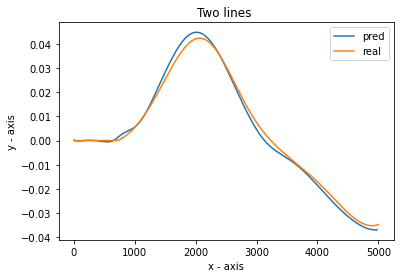

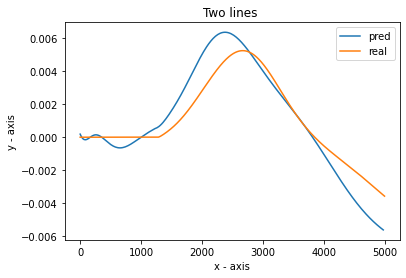

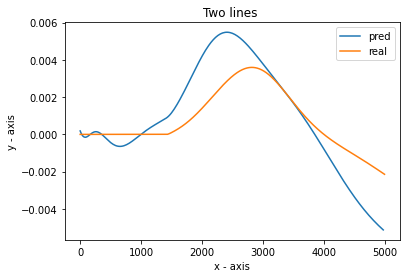

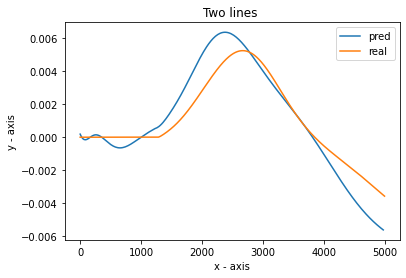

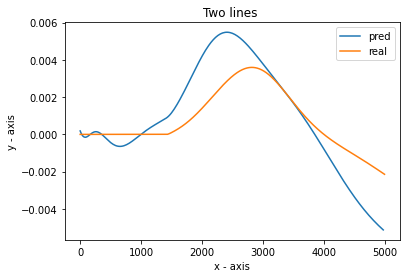

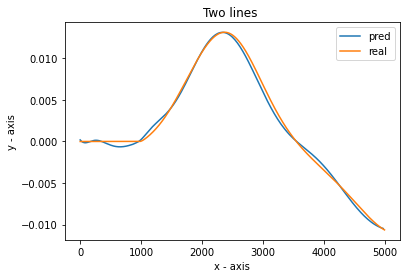

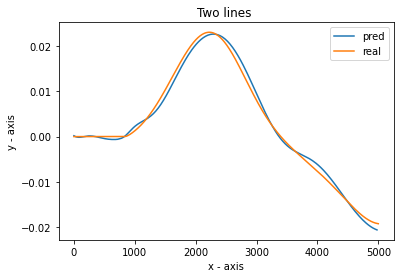

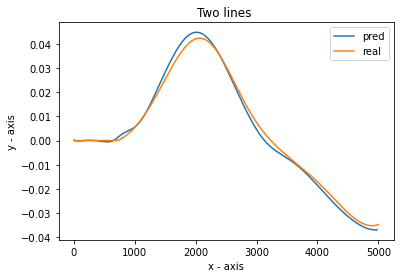

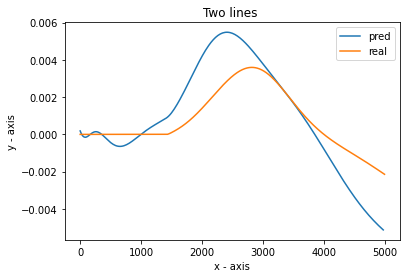

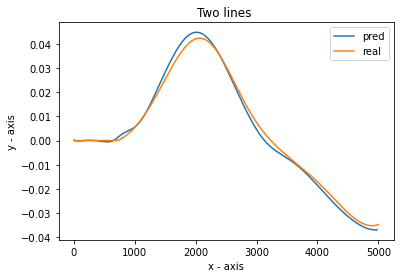

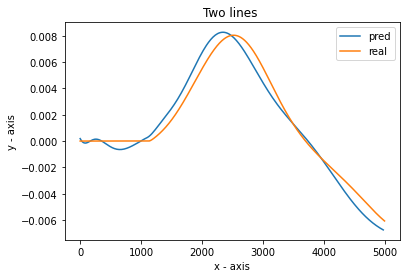

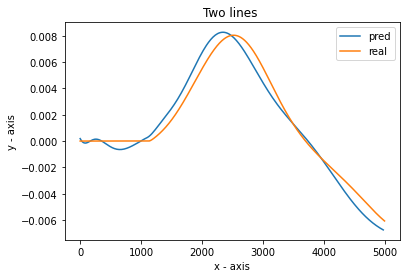

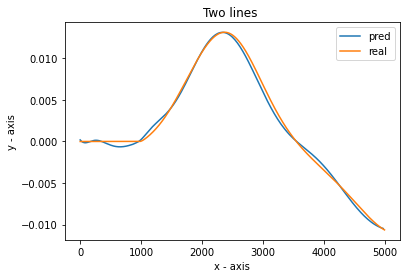

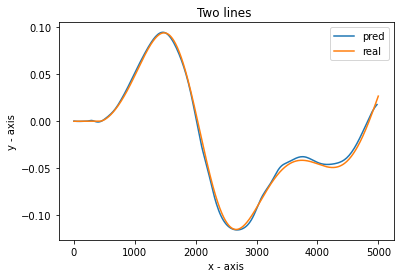

In [17]:
y_final_pred = y_final.reshape(-1,1)
y_final_pred = scaler_X.inverse_transform(y_final_pred)
y_final_pred = y_final_pred.reshape(-1,5).reshape(-1,y_final.shape[1],5)
y_pred1 = y_final_pred[:,:,0]
y_real1 = y_test_final[:,:,0]
for i in range(14):
    plt.plot(y_pred1[i], label = "pred")
    plt.plot(y_real1[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

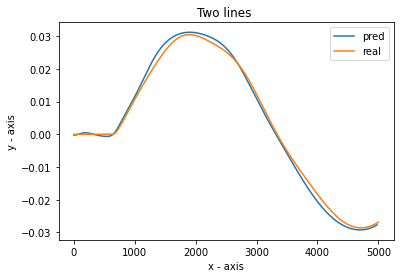

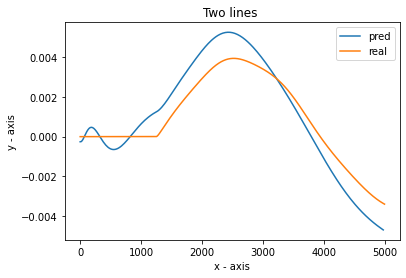

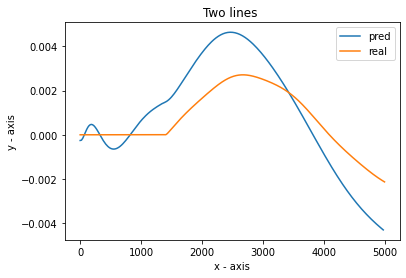

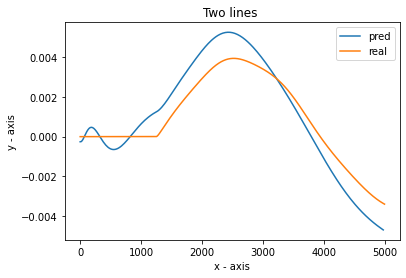

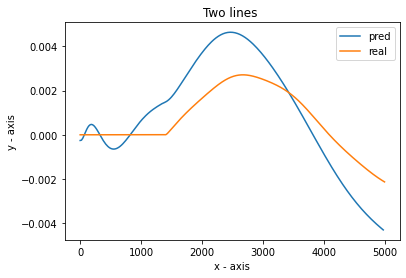

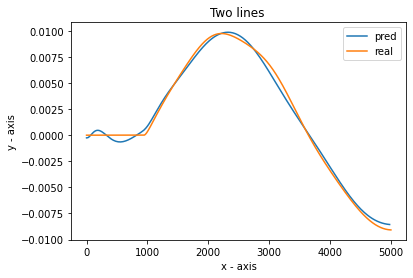

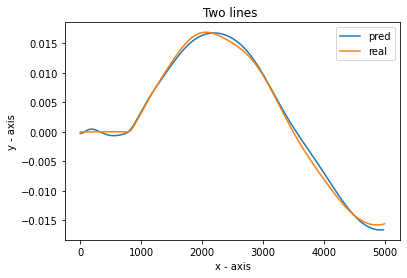

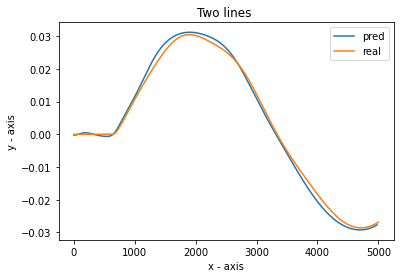

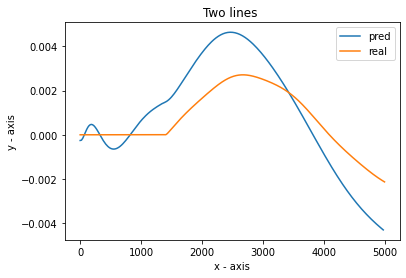

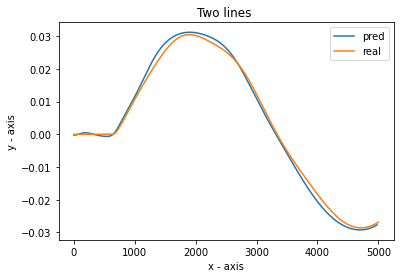

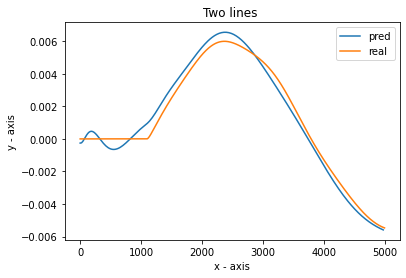

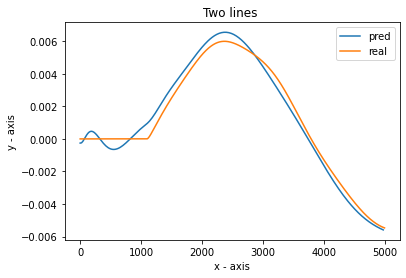

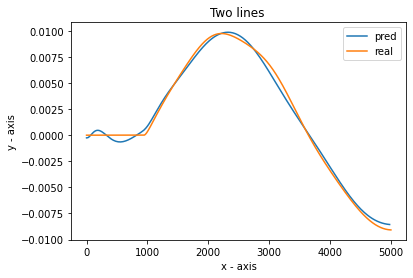

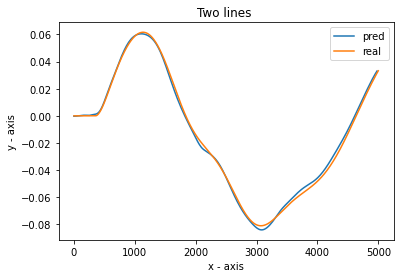

In [18]:
y_pred2 = y_final_pred[:,:,1]
y_real2 = y_test_final[:,:,1]
for i in range(14):
    plt.plot(y_pred2[i], label = "pred")
    plt.plot(y_real2[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

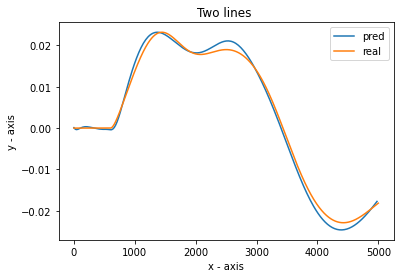

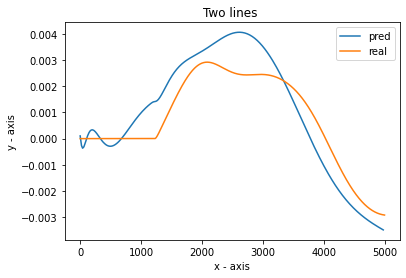

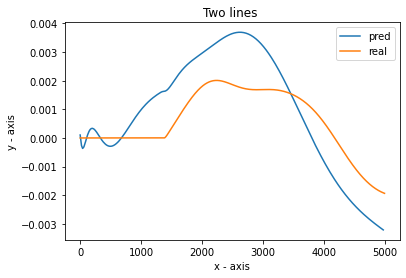

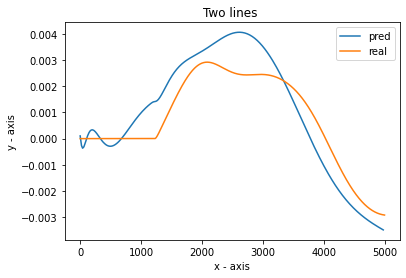

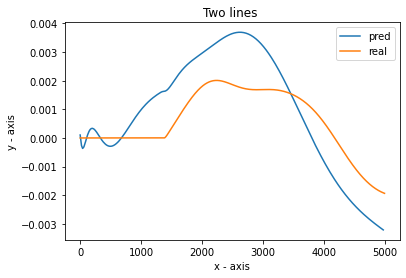

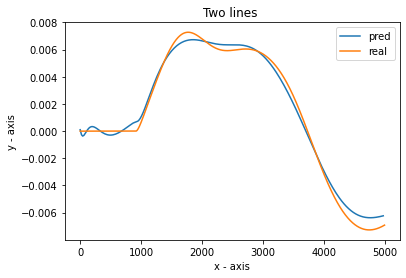

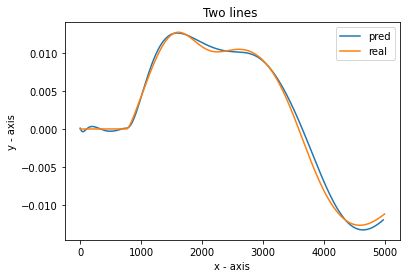

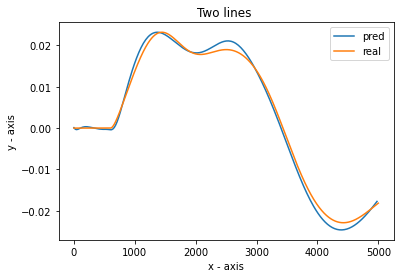

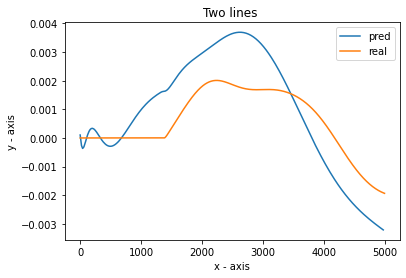

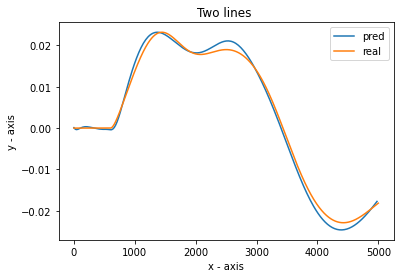

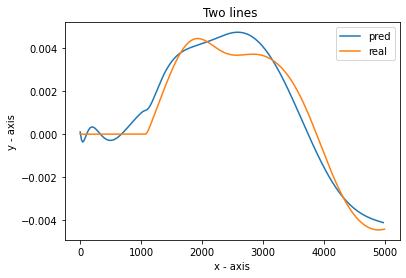

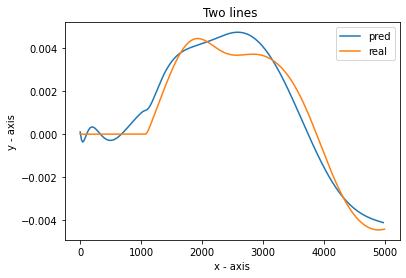

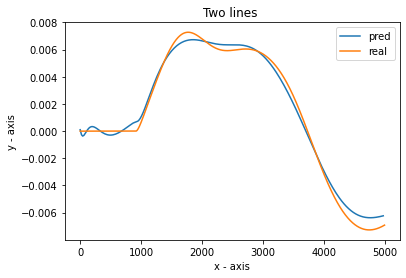

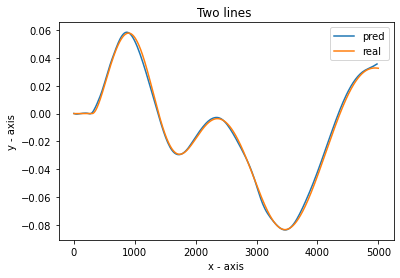

In [19]:
y_pred3 = y_final_pred[:,:,2]
y_real3 = y_test_final[:,:,2]
for i in range(14):
    plt.plot(y_pred3[i], label = "pred")
    plt.plot(y_real3[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

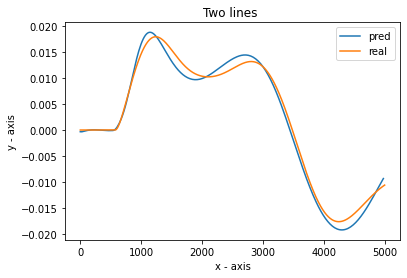

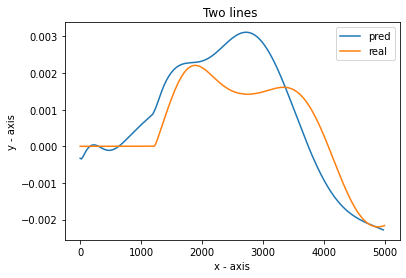

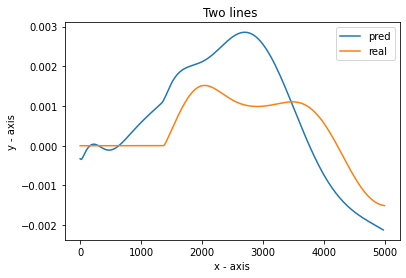

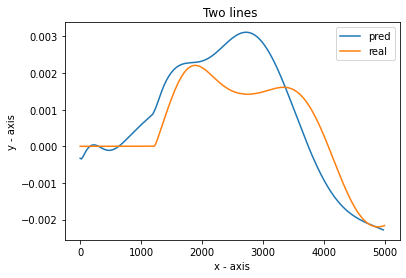

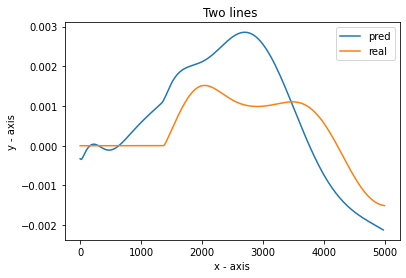

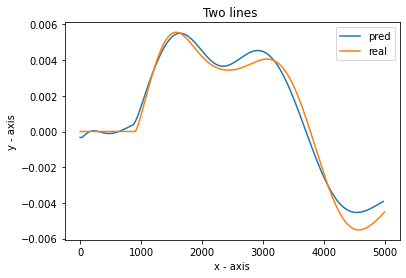

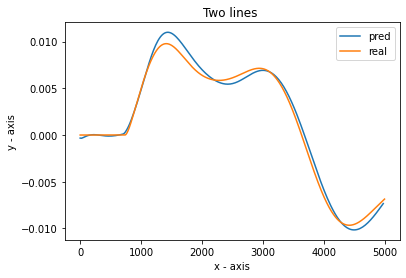

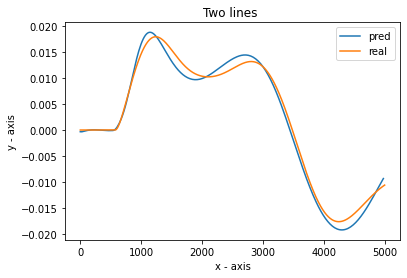

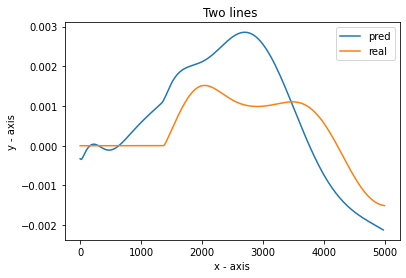

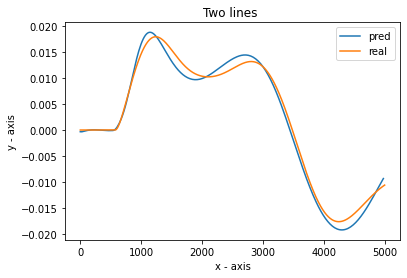

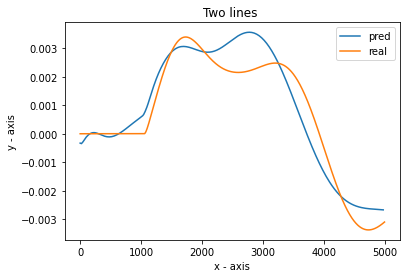

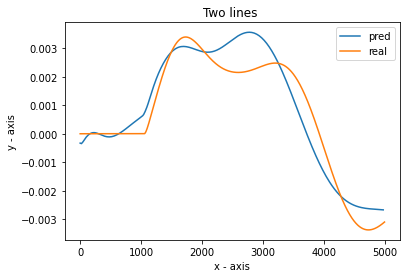

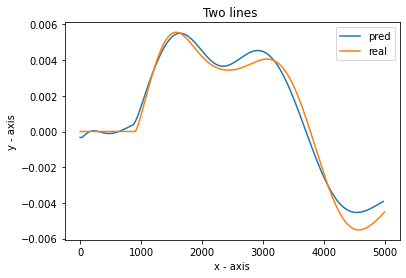

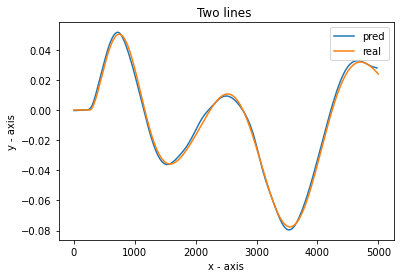

In [20]:
y_pred4 = y_final_pred[:,:,3]
y_real4 = y_test_final[:,:,3]
for i in range(14):
    plt.plot(y_pred4[i], label = "pred")
    plt.plot(y_real4[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

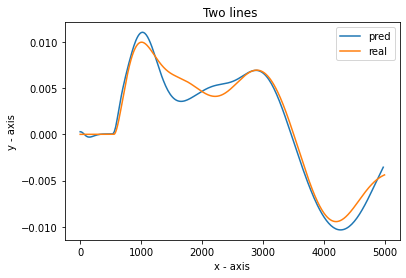

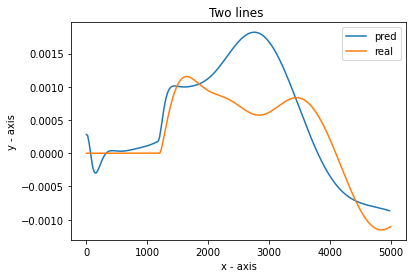

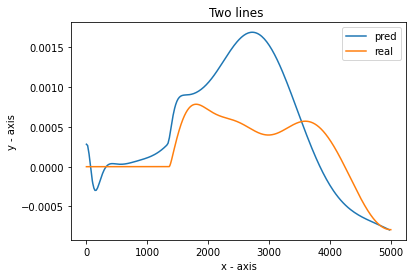

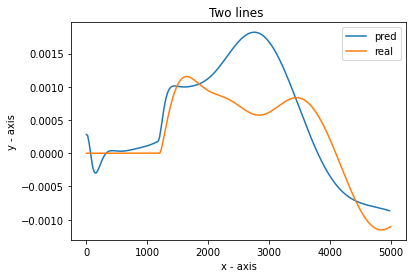

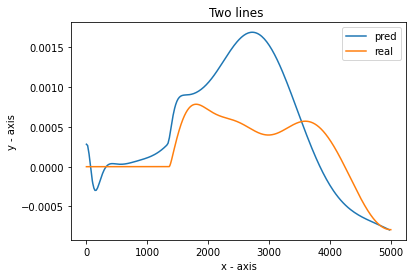

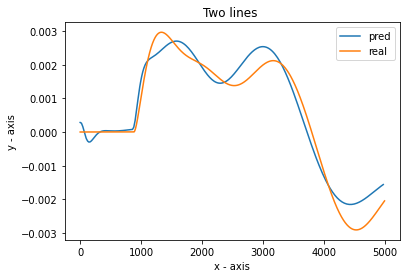

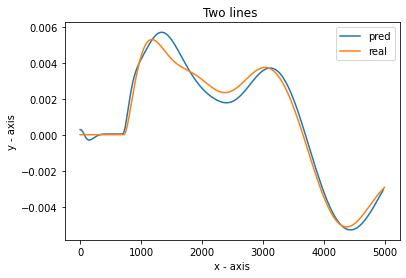

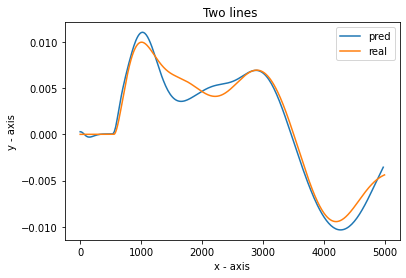

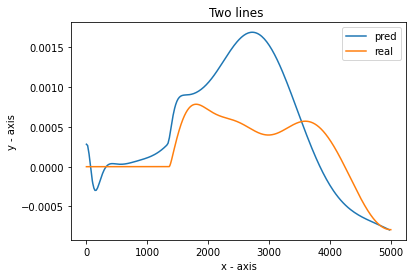

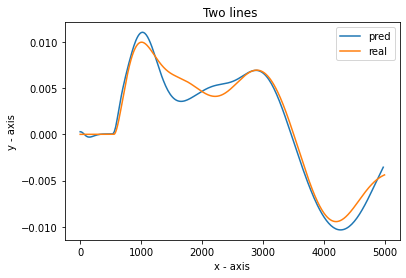

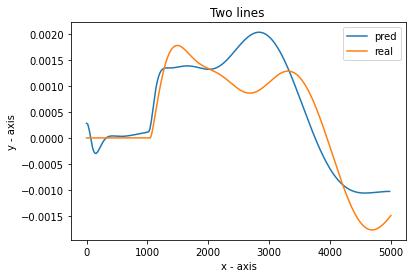

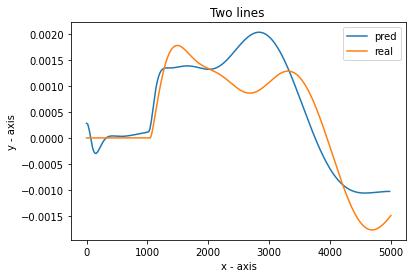

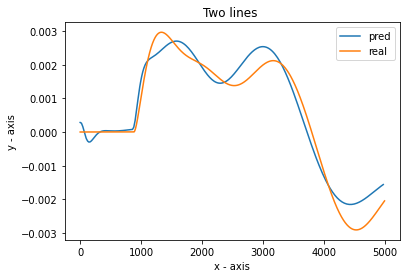

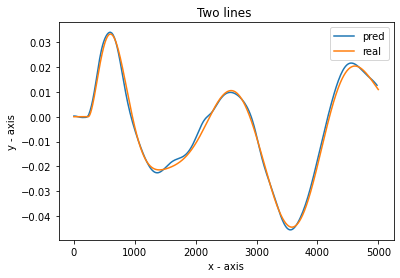

In [21]:
y_pred5 = y_final_pred[:,:,4]
y_real5 = y_test_final[:,:,4]
for i in range(14):
    plt.plot(y_pred5[i], label = "pred")
    plt.plot(y_real5[i], label = "real")
# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

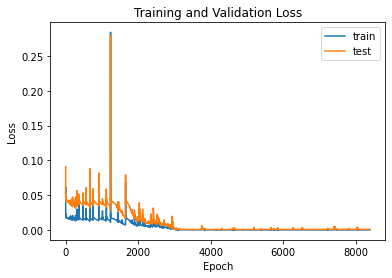

In [22]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()